Modeling Skripsi Akbar

# Open Data

In [2]:
import pandas as pd

data = pd.read_excel('DATA SKRIPSI.xlsx')
data.head()

Subject ID ICD Code                                       Diagnosis Gender  \
0    15914421    27800                            Obesity, unspecified      F   
1    12054856    E6601  Morbid (severe) obesity due to excess calories      M   
2    15690478    E6601  Morbid (severe) obesity due to excess calories      M   
3    14306557    27801                                  Morbid obesity      F   
4    17079601    27800                            Obesity, unspecified      M   

   Age  Weight (Lbs)   BMI  SGOT  SGPT  Alkaline_Phosatase  Albumin  Ferritin  \
0   39       895.088  44.5    93   126                 500      4.4     342.0   
1   62       824.980  52.2   153    22                 127      3.6      81.0   
2   32       744.200  79.7    37    15                 207      3.7      32.0   
3   62       727.900  45.9   339   248                 276      4.8    1904.0   
4   54       708.110  96.0   449   570                 292      4.9     507.0   

   Lymphocite  Neutrophils  Bilirubin  Lactate_Dehydrogenase  
0        69.0         92.3        2.8                    316  
1        18.7         91.0        0.2                    309  
2        19.2         85.0        1.8                    577  
3       100.0         97.0        7.0                   1191  
4        32.9         91.4        6.5                    965

# EDA

In [3]:
data.isnull().sum()

Subject ID               0
ICD Code                 0
Diagnosis                0
Gender                   0
Age                      0
Weight (Lbs)             0
BMI                      0
SGOT                     0
SGPT                     0
Alkaline_Phosatase       0
Albumin                  0
Ferritin                 0
Lymphocite               0
Neutrophils              0
Bilirubin                0
Lactate_Dehydrogenase    0
dtype: int64

In [4]:
data.describe()

Subject ID          Age  Weight (Lbs)          BMI          SGOT  \
count  4.111000e+03  4111.000000   4111.000000  4111.000000   4111.000000   
mean   1.501123e+07    53.918755    264.563872    43.520348    228.514960   
std    2.897461e+06    15.267755     70.737828    13.987835   1021.882785   
min    1.000098e+07    18.000000     40.000000     4.200000      8.000000   
25%    1.243548e+07    43.000000    221.400000    36.900000     30.000000   
50%    1.502582e+07    55.000000    256.000000    42.000000     52.000000   
75%    1.752146e+07    65.000000    297.400000    47.900000    118.000000   
max    1.999835e+07    91.000000    895.088000   564.100000  27290.000000   

               SGPT  Alkaline_Phosatase      Albumin       Ferritin  \
count   4111.000000         4111.000000  4111.000000    4111.000000   
mean     151.578448          172.084651     4.340890     629.315592   
std      449.849303          177.742608     0.687928    6073.994227   
min        3.000000           18.000000     1.800000       3.900000   
25%       28.000000           87.000000     4.100000      83.000000   
50%       48.000000          118.000000     4.400000     183.000000   
75%      103.000000          183.500000     4.600000     438.000000   
max    13150.000000         2957.000000    36.000000  365050.000000   

        Lymphocite  Neutrophils    Bilirubin  Lactate_Dehydrogenase  
count  4111.000000  4111.000000  4111.000000            4111.000000  
mean     35.380126    81.860375     1.853442             445.621503  
std      14.652802    10.978242     4.275968            1108.541261  
min       2.000000    30.600000     0.100000              75.000000  
25%      26.100000    75.500000     0.500000             200.000000  
50%      33.000000    84.500000     0.700000             254.000000  
75%      41.600000    90.300000     1.400000             384.000000  
max     100.000000   100.000000    58.800000           26260.000000

# Pre-processing

### IQR

Menghapus outlier menggunakanmetode IQR

In [5]:
def remove_outliers_iqr_inplace(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.52 * IQR
        upper_bound = Q3 + 3.52 * IQR
        df.drop(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index, inplace=True)

remove_outliers_iqr_inplace(data, ['Weight (Lbs)', 'BMI', 'SGOT', 'SGPT',
                                       'Alkaline_Phosatase', 'Albumin', 'Ferritin',
                                       'Bilirubin', 'Lactate_Dehydrogenase'])

data.head()


Subject ID ICD Code             Diagnosis Gender  Age  Weight (Lbs)   BMI  \
19    13047066    27801        Morbid obesity      M   40        554.00  77.3   
21    19647720    27800  Obesity, unspecified      M   69        542.77  73.6   
22    16572655    27801        Morbid obesity      M   40        541.60  60.5   
24    16544239    27801        Morbid obesity      M   47        532.60  70.3   
25    17810442    27801        Morbid obesity      M   35        529.90  79.9   

    SGOT  SGPT  Alkaline_Phosatase  Albumin  Ferritin  Lymphocite  \
19    45    30                 159      3.6     138.0        21.6   
21    52    65                  97      4.2    1131.0        23.0   
22    41    53                 119      4.3     389.0        29.0   
24    39    61                 160      4.2     473.0        33.0   
25    20    24                  50      4.2     241.0        32.3   

    Neutrophils  Bilirubin  Lactate_Dehydrogenase  
19         68.4        0.7                    207  
21         73.6        1.9                    206  
22         75.8        0.5                    257  
24         80.0        1.0                    297  
25         76.4        0.7                    218

In [6]:
data.describe()

Subject ID          Age  Weight (Lbs)          BMI         SGOT  \
count  3.002000e+03  3002.000000   3002.000000  3002.000000  3002.000000   
mean   1.502578e+07    53.139907    263.387978    43.472152    56.511659   
std    2.911465e+06    15.567347     64.509094     9.232729    49.428733   
min    1.000098e+07    18.000000     40.000000     7.100000     8.000000   
25%    1.242237e+07    42.000000    222.000000    37.300000    27.000000   
50%    1.505388e+07    54.000000    257.000000    42.400000    40.000000   
75%    1.753503e+07    65.000000    297.075000    48.200000    66.000000   
max    1.999835e+07    91.000000    554.000000    86.100000   409.000000   

              SGPT  Alkaline_Phosatase      Albumin     Ferritin   Lymphocite  \
count  3002.000000         3002.000000  3002.000000  3002.000000  3002.000000   
mean     53.543638          120.736176     4.351366   233.529847    34.456729   
std      44.315155           61.399525     0.439548   246.383720    12.023199   
min       3.000000           18.000000     2.400000     4.000000     2.000000   
25%      25.000000           81.000000     4.200000    74.000000    26.500000   
50%      39.000000          103.000000     4.400000   148.000000    33.000000   
75%      65.000000          141.000000     4.600000   293.750000    41.000000   
max     271.000000          429.000000     5.600000  1360.000000   100.000000   

       Neutrophils    Bilirubin  Lactate_Dehydrogenase  
count  3002.000000  3002.000000            3002.000000  
mean     79.872985     0.734744             260.948035  
std      11.236289     0.491259             107.519132  
min      30.600000     0.100000              75.000000  
25%      72.725000     0.400000             191.000000  
50%      82.400000     0.600000             229.000000  
75%      88.600000     0.900000             296.000000  
max     100.000000     3.100000             720.000000

### Standarisasi

- Z-Score Standardization untuk Distribusi Normal:

    Menggunakan z-score untuk fitur "Age", "Weight", "BMI", "Lymphocyte", dan "Neutrophils". Karena distribusi data yang mendekati normal. 
    
- Log Transform terlebih dahulu untuk data dengan distribusi yang Skewed:

    Untuk fitur yang skewed seperti "SGOT", "SGPT", "Alkaline_Phosatase", "Ferritin", "Bilirubin", dan "Lactate_Dehydrogenase", pertama digunakan log transform agar distribusinya lebih normal, contoh: 𝑥′=ln(𝑥+𝑐) (c = konstanta kecil seperti 1 agar tidak ada ln⁡(0)). Setelah transformasi log, setelah itu  dilanjut ke z-score scaling.

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

# List kolom yang memerlukan standarisasi
columns_normal = ['Age', 'Weight (Lbs)', 'BMI', 'Lymphocite', 'Neutrophils']  # Hampir normal
columns_skewed = ['SGOT', 'SGPT', 'Alkaline_Phosatase', 'Albumin', 
                  'Ferritin', 'Bilirubin', 'Lactate_Dehydrogenase']  # Skewed ke kanan

# ===== Log Transform untuk Data Skewed =====
df_transformed = data.copy()
for column in columns_skewed:
    df_transformed[column] = np.log1p(df_transformed[column])  # log(x+1) untuk handle 0

# ===== Z-Score Standardization untuk Data Normal =====
scaler_normal = StandardScaler()
df_transformed[columns_normal] = scaler_normal.fit_transform(df_transformed[columns_normal])

# ===== Robust Scaling untuk Data Skewed =====
scaler_skewed = RobustScaler()
df_transformed[columns_skewed] = scaler_skewed.fit_transform(df_transformed[columns_skewed])

df_transformed.head(10)

Subject ID ICD Code                                       Diagnosis  \
19    13047066    27801                                  Morbid obesity   
21    19647720    27800                            Obesity, unspecified   
22    16572655    27801                                  Morbid obesity   
24    16544239    27801                                  Morbid obesity   
25    17810442    27801                                  Morbid obesity   
26    19859524    27801                                  Morbid obesity   
27    17396684    E6601  Morbid (severe) obesity due to excess calories   
30    14807064    E6601  Morbid (severe) obesity due to excess calories   
33    16097384    27801                                  Morbid obesity   
34    11068569    E6601  Morbid (severe) obesity due to excess calories   

   Gender       Age  Weight (Lbs)       BMI      SGOT      SGPT  \
19      M -0.844209      4.505728  3.664516  0.131886 -0.273619   
21      M  1.018975      4.331615  3.263701  0.294239  0.537567   
22      M -0.844209      4.313475  1.844599  0.027619  0.322153   
24      M -0.394475      4.173937  2.906217 -0.028301  0.470454   
25      M -1.165448      4.132075  3.946170 -0.766830 -0.504535   
26      F -0.651466      4.091764  4.238657 -0.320445 -0.641760   
27      M -0.073236      4.009591  3.892006 -1.152476 -0.857174   
30      M -0.972705      3.812687  1.887931  0.455366  0.950914   
33      F -0.587218      3.679350  4.022000  0.131886 -0.504535   
34      F -1.615182      3.675319  4.314486  0.357345  1.344804   

    Alkaline_Phosatase   Albumin  Ferritin  Lymphocite  Neutrophils  \
19            0.784514 -2.163636 -0.050760   -1.069505    -1.021235   
21           -0.108218 -0.509261  1.481615   -0.953044    -0.558372   
22            0.260606 -0.252228  0.703035   -0.453926    -0.362545   
24            0.795861 -0.509261  0.845556   -0.121180     0.011306   
25           -1.297678 -0.509261  0.354361   -0.179411    -0.309138   
26            0.691102 -0.509261 -0.472906   -0.046312     0.687798   
27           -1.262315  0.000000  0.960825   -0.354102    -1.314976   
30            0.988868  1.421716  0.354361    5.369122     1.373192   
33            0.666981 -1.038499  0.065616    0.286433    -0.175620   
34            0.229998 -1.589344  0.154160    1.850338     0.242738   

    Bilirubin  Lactate_Dehydrogenase  
19   0.198521              -0.230474  
21   1.947423              -0.241521  
22  -0.211337               0.263344  
24   0.730704               0.593747  
25   0.198521              -0.112342  
26  -0.437261               1.274267  
27  -0.679934              -0.639616  
30   1.713424               1.052352  
33  -0.211337              -0.366692  
34   0.562739               1.039722

### Encoding

Melakukan label encoding pada kolom 'Gender' menggunakan metode one-hot dan menjadikannya dua kolom 'Gender_F' dan 'Gender_M' dengan tujuan agar tidak ada bobot atau pengaruh dari salah satu gender apabila menggunakan metode encoding lain yang menempatkan Gender pada satu kolom saja

In [8]:
gender_encoded = pd.get_dummies(df_transformed['Gender'], prefix='Gender', dtype=int)
df_final = pd.concat([df_transformed.drop('Gender', axis=1), gender_encoded], axis=1)
df_final.head(10)


Subject ID ICD Code                                       Diagnosis  \
19    13047066    27801                                  Morbid obesity   
21    19647720    27800                            Obesity, unspecified   
22    16572655    27801                                  Morbid obesity   
24    16544239    27801                                  Morbid obesity   
25    17810442    27801                                  Morbid obesity   
26    19859524    27801                                  Morbid obesity   
27    17396684    E6601  Morbid (severe) obesity due to excess calories   
30    14807064    E6601  Morbid (severe) obesity due to excess calories   
33    16097384    27801                                  Morbid obesity   
34    11068569    E6601  Morbid (severe) obesity due to excess calories   

         Age  Weight (Lbs)       BMI      SGOT      SGPT  Alkaline_Phosatase  \
19 -0.844209      4.505728  3.664516  0.131886 -0.273619            0.784514   
21  1.018975      4.331615  3.263701  0.294239  0.537567           -0.108218   
22 -0.844209      4.313475  1.844599  0.027619  0.322153            0.260606   
24 -0.394475      4.173937  2.906217 -0.028301  0.470454            0.795861   
25 -1.165448      4.132075  3.946170 -0.766830 -0.504535           -1.297678   
26 -0.651466      4.091764  4.238657 -0.320445 -0.641760            0.691102   
27 -0.073236      4.009591  3.892006 -1.152476 -0.857174           -1.262315   
30 -0.972705      3.812687  1.887931  0.455366  0.950914            0.988868   
33 -0.587218      3.679350  4.022000  0.131886 -0.504535            0.666981   
34 -1.615182      3.675319  4.314486  0.357345  1.344804            0.229998   

     Albumin  Ferritin  Lymphocite  Neutrophils  Bilirubin  \
19 -2.163636 -0.050760   -1.069505    -1.021235   0.198521   
21 -0.509261  1.481615   -0.953044    -0.558372   1.947423   
22 -0.252228  0.703035   -0.453926    -0.362545  -0.211337   
24 -0.509261  0.845556   -0.121180     0.011306   0.730704   
25 -0.509261  0.354361   -0.179411    -0.309138   0.198521   
26 -0.509261 -0.472906   -0.046312     0.687798  -0.437261   
27  0.000000  0.960825   -0.354102    -1.314976  -0.679934   
30  1.421716  0.354361    5.369122     1.373192   1.713424   
33 -1.038499  0.065616    0.286433    -0.175620  -0.211337   
34 -1.589344  0.154160    1.850338     0.242738   0.562739   

    Lactate_Dehydrogenase  Gender_F  Gender_M  
19              -0.230474         0         1  
21              -0.241521         0         1  
22               0.263344         0         1  
24               0.593747         0         1  
25              -0.112342         0         1  
26               1.274267         1         0  
27              -0.639616         0         1  
30               1.052352         0         1  
33              -0.366692         1         0  
34               1.039722         1         0

In [9]:
df_final.describe()

Subject ID           Age  Weight (Lbs)           BMI         SGOT  \
count  3.002000e+03  3.002000e+03  3.002000e+03  3.002000e+03  3002.000000   
mean   1.502578e+07 -6.047210e-16  1.945886e-15  2.659801e-16     0.110289   
std    2.911465e+06  1.000167e+00  1.000167e+00  1.000167e+00     0.750134   
min    1.000098e+07 -2.257659e+00 -3.463468e+00 -3.940136e+00    -1.737958   
25%    1.242237e+07 -7.157136e-01 -6.416905e-01 -6.686192e-01    -0.437103   
50%    1.505388e+07  5.525903e-02 -9.904095e-02 -1.161445e-01     0.000000   
75%    1.753503e+07  7.619840e-01  5.222928e-01  5.121601e-01     0.562897   
max    1.999835e+07  2.432425e+00  4.505728e+00  4.617806e+00     2.639102   

              SGPT  Alkaline_Phosatase      Albumin     Ferritin  \
count  3002.000000         3002.000000  3002.000000  3002.000000   
mean      0.070587            0.105514    -0.171216    -0.017420   
std       0.721776            0.781696     1.175847     0.743250   
min      -2.471757           -3.095844    -6.242561    -2.480208   
25%      -0.462433           -0.432832    -0.509261    -0.501563   
50%       0.000000            0.000000     0.000000     0.000000   
75%       0.537567            0.567168     0.490739     0.498437   
max       2.057759            2.584910     2.707815     1.616226   

         Lymphocite   Neutrophils    Bilirubin  Lactate_Dehydrogenase  \
count  3.002000e+03  3.002000e+03  3002.000000            3002.000000   
mean  -1.003898e-16 -4.413710e-16     0.159334               0.142182   
std    1.000167e+00  1.000167e+00     0.791939               0.812546   
min   -2.699958e+00 -4.385896e+00    -1.226968              -2.538406   
25%   -6.618916e-01 -6.362577e-01    -0.437261              -0.413959   
50%   -1.211800e-01  2.249351e-01     0.000000               0.000000   
75%    5.443112e-01  7.768106e-01     0.562739               0.586041   
max    5.452309e+00  1.791549e+00     3.081336               2.619128   

          Gender_F     Gender_M  
count  3002.000000  3002.000000  
mean      0.668887     0.331113  
std       0.470692     0.470692  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

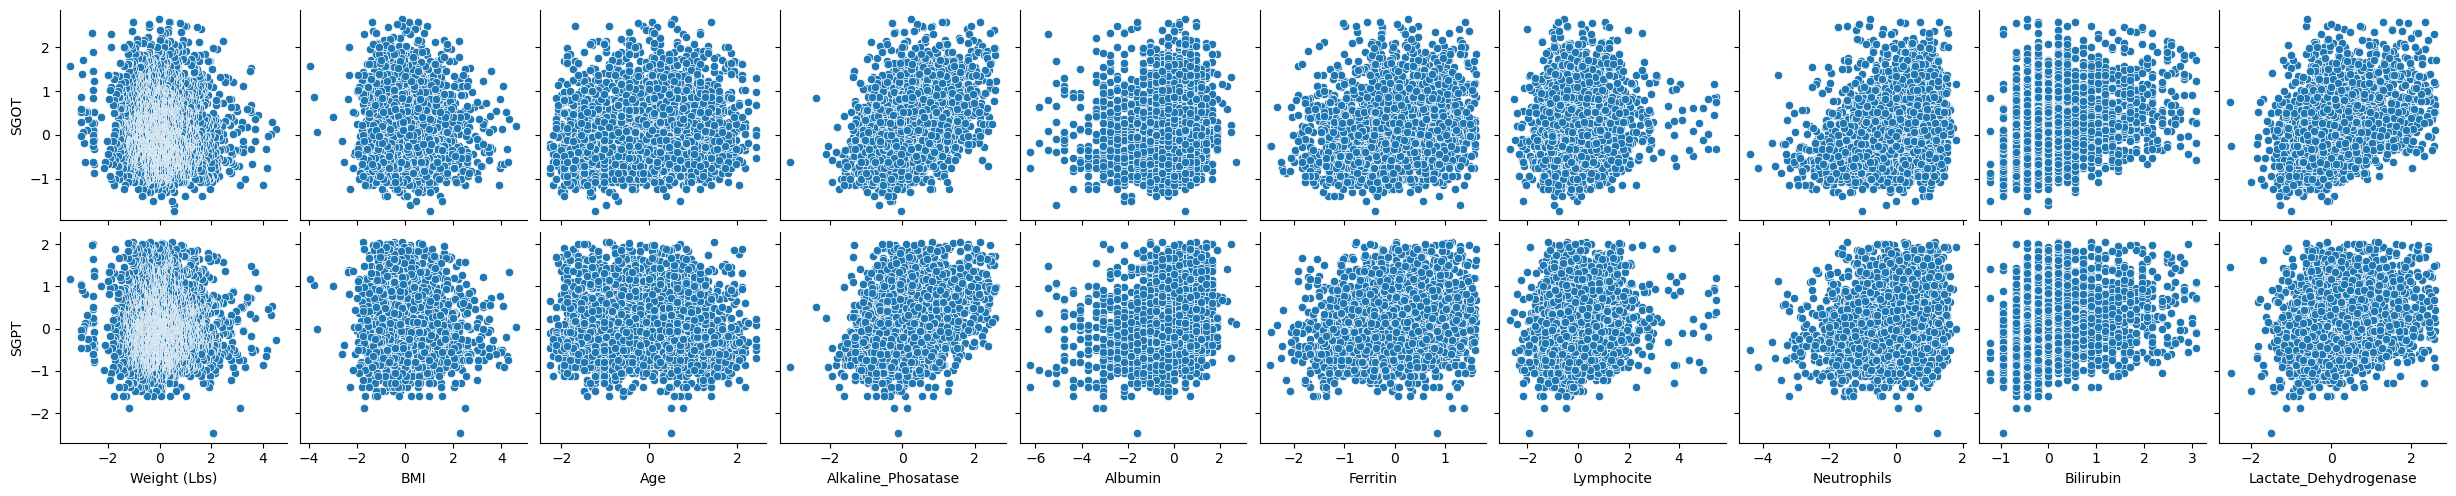

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# List nama kolom yang ingin divisualisasikan
columns_to_visualize_x = ['Weight (Lbs)', 'BMI', 'Age', 'Alkaline_Phosatase', 'Albumin',
                          'Ferritin', 'Lymphocite', 'Neutrophils', 'Bilirubin', 'Lactate_Dehydrogenase']
columns_to_visualize_y = ['SGOT', 'SGPT']

# Membuat scatter plot untuk setiap pasangan variabel
sns.pairplot(df_final, x_vars=columns_to_visualize_x, y_vars=columns_to_visualize_y)
plt.show()

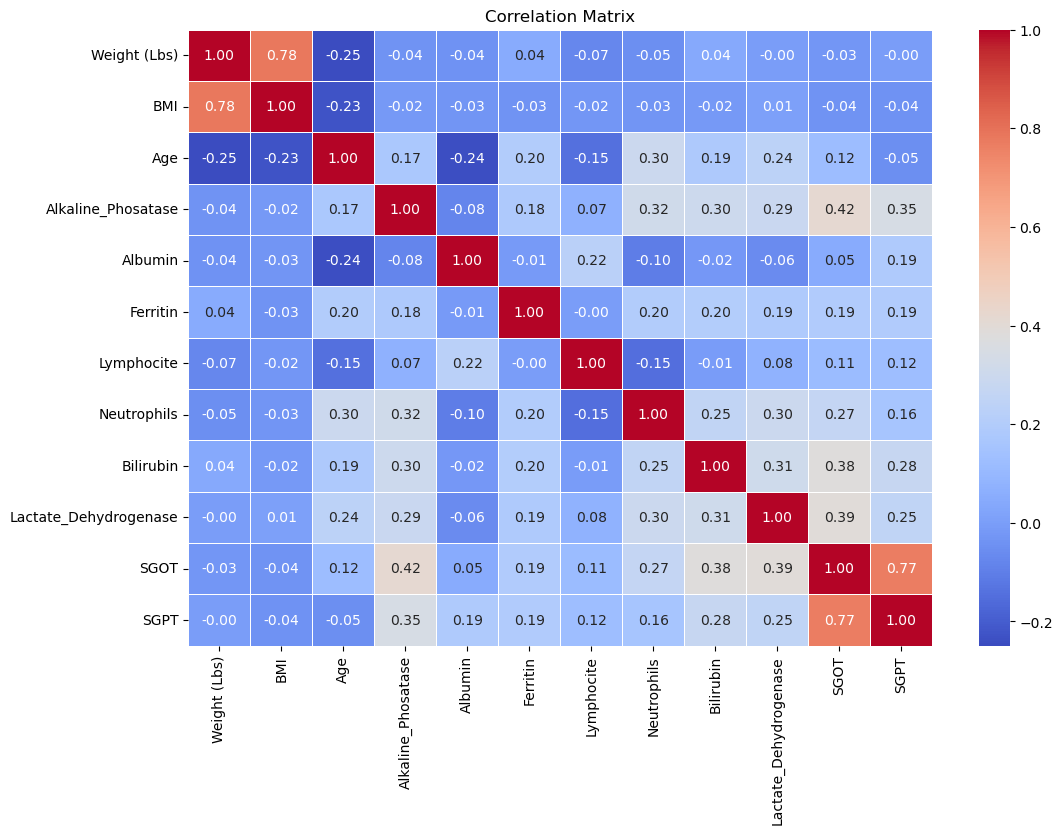

In [43]:
columns_to_visualize = ['Weight (Lbs)', 'BMI', 'Age', 'Alkaline_Phosatase', 'Albumin',
                          'Ferritin', 'Lymphocite', 'Neutrophils', 'Bilirubin', 'Lactate_Dehydrogenase', 'SGOT', 'SGPT']

subset_data = df_final[columns_to_visualize]
corr_matrix = subset_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Uji Asumsi Regresi

Melakukan Uji multikolinearitas pada variabel independen, Uji dependensi antar variabel target, dan Uji Normal Multivariat pada variabel target

In [10]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import bartlett, chi2
from numpy.linalg import inv

# 1. Uji Multikolinearitas (VIF)
def calculate_vif(df):
    numeric_df = df.select_dtypes(include=[np.number])
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

vif_result = calculate_vif(df_final.drop(columns=['Subject ID', 'SGOT', 'SGPT', 'Gender_F', 'Gender_M']))

# 2. Uji Bartlett's Sphericity (Korelasi SGOT dan SGPT)
sgot_sgpt = df_final[['SGOT', 'SGPT']]
bartlett_stat, bartlett_p = bartlett(sgot_sgpt['SGOT'], sgot_sgpt['SGPT'])

# Menentukan keputusan uji Bartlett
chi2_threshold_bartlett = chi2.ppf(0.95, df=1)  # df=1 karena hanya ada 2 variabel target
bartlett_decision = "H0 ditolak (Variabel target bersifat dependen)" if bartlett_stat > chi2_threshold_bartlett else "H0 Diterima (Variabel target bersifat independen)"

# 3. Uji Normal Multivariat (Mahalanobis Distance)
mean_vector = df_final[['SGOT', 'SGPT']].mean().values
cov_matrix = np.cov(df_final[['SGOT', 'SGPT']].T)
inv_cov_matrix = inv(cov_matrix)

# Menghitung jarak Mahalanobis untuk setiap observasi
mahalanobis_distances = []
for i in range(len(df_final)):
    row = df_final.iloc[i][['SGOT', 'SGPT']].values
    diff = row - mean_vector
    distance = np.dot(np.dot(diff.T, inv_cov_matrix), diff)
    mahalanobis_distances.append(distance)

df_final['Mahalanobis_Distance'] = mahalanobis_distances

# Nilai (Chi-square table)
n = len(df_final)
p = 2
chi2_threshold_normal = chi2.ppf(0.95, df=p)

# Menghitung proporsi outlier
is_outlier = df_final['Mahalanobis_Distance'] > chi2_threshold_normal
prop_outliers = is_outlier.sum() / n

# Menentukan keputusan uji Normalitas Multivariat
normality_decision = "H0 ditolak (Variabel target tidak memenuhi normal multivariat)" if prop_outliers > 0.05 else " H0 diterima ((Variabel target memenuhi normal multivariat)"

# Output dalam bentuk yang lebih interpretable
output = {
    "Uji Multikolinearitas (VIF)": vif_result,
    "Uji Bartlett's Sphericity": {
        "Bartlett Stat": bartlett_stat,
        "p-value": bartlett_p,
        "Chi-Square Threshold": chi2_threshold_bartlett,
        "Keputusan": bartlett_decision
    },
    "Uji Normal Multivariat": {
        "Chi-Square Threshold": chi2_threshold_normal,
        "Proporsi Outlier": prop_outliers,
        "Keputusan": normality_decision
    }
}

# Print output
for key, value in output.items():
    print(f"{key}:")
    if isinstance(value, dict):
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(value)
    print()


Uji Multikolinearitas (VIF):
                 Feature       VIF
0                    Age  1.328815
1           Weight (Lbs)  2.766777
2                    BMI  2.668741
3     Alkaline_Phosatase  1.255201
4                Albumin  1.123761
5               Ferritin  1.121157
6             Lymphocite  1.130265
7            Neutrophils  1.286834
8              Bilirubin  1.243367
9  Lactate_Dehydrogenase  1.271846

Uji Bartlett's Sphericity:
  Bartlett Stat: 4.455126724611575
  p-value: 0.034796634310119035
  Chi-Square Threshold: 3.841458820694124
  Keputusan: H0 ditolak (Variabel target bersifat dependen)

Uji Normal Multivariat:
  Chi-Square Threshold: 5.991464547107979
  Proporsi Outlier: 0.057961359093937376
  Keputusan: H0 ditolak (Variabel target tidak memenuhi normal multivariat)



# Split Data

In [11]:
from sklearn.model_selection import train_test_split

X = df_final[['Age', 'Weight (Lbs)', 'Gender_F', 'Gender_M', 'BMI', 'Albumin', 'Alkaline_Phosatase',
              'Ferritin', 'Lymphocite', 'Neutrophils', 'Bilirubin', 'Lactate_Dehydrogenase']]
Y = df_final[['SGOT', 'SGPT']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Jumlah data pelatihan:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data pelatihan: 2401
Jumlah data uji: 601


# Training model Default, Randomsearch, Bayes

In [12]:
!pip install scikit-optimize

In [13]:
!pip install geneticalgorithm

In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

# ===============================
# 1. Splitting Data
# ===============================
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ===============================
# 2. Parameter Space
# ===============================
param_distributions = {
    'linear': {
        'C': np.logspace(-3, 3, num=7),
    },
    'rbf': {
        'C': np.logspace(-3, 3, num=7),
        'gamma': np.logspace(-3, 1, num=5),
    },
    'poly': {
        'C': np.logspace(-3, 3, num=7),
        'degree': [2, 3, 4],
    }
}

# Parameter epsilon tetap untuk semua kernel
epsilon_values = np.arange(0.1, 1.55, 0.05)

# ===============================
# 3. Hitung Max Correlation Chain
# ===============================
correlations = Y_train.corr()
chain_order = correlations.mean().sort_values(ascending=False).index.tolist()
print("Urutan Max Correlation Chain:", chain_order)

# ===============================
# 4. Fungsi Training dan Evaluasi
# ===============================
def train_and_evaluate_with_tuning(kernel_type, tuning_method):
    param_space = param_distributions[kernel_type]
    results_per_epsilon = []

    for epsilon in epsilon_values:  # Eksplorasi tiap interval epsilon
        best_params = None

        if tuning_method == 'Default':
            # Default parameters tanpa metode tuning
            best_params = {'C': 1.0, 'epsilon': epsilon}
            model = RegressorChain(SVR(kernel=kernel_type, cache_size=1000, **best_params),
                                   order=[Y_train.columns.get_loc(c) for c in chain_order])

        elif tuning_method == 'RandomSearch':
            # Lakukan random search pada parameter lain, tetapi epsilon tetap
            param_space_with_epsilon = {**param_space, 'epsilon': [epsilon]}
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                random_search = RandomizedSearchCV(
                    estimator=SVR(kernel=kernel_type),
                    param_distributions=param_space_with_epsilon,
                    n_iter=10,
                    cv=5,
                    verbose=2,
                    random_state=42
                )
            random_search.fit(X_train, Y_train.iloc[:, 0])
            best_params = random_search.best_params_
            best_params['epsilon'] = epsilon
            model = RegressorChain(SVR(kernel=kernel_type, cache_size=1000, **best_params),
                                   order=[Y_train.columns.get_loc(c) for c in chain_order])

        elif tuning_method == 'Bayes':
            # Bayesian Optimization pada parameter lain, epsilon tetap
            search_spaces = {key: Real(min(values), max(values), prior='log-uniform') if len(values) > 3 else Categorical(values)
                             for key, values in param_space.items()}
            bayes_search = BayesSearchCV(
                estimator=SVR(kernel=kernel_type),
                search_spaces={**search_spaces, 'epsilon': [epsilon]},
                n_iter=10,
                cv=5,
                verbose=2,
                random_state=42
            )
            bayes_search.fit(X_train, Y_train.iloc[:, 0])
            best_params = bayes_search.best_params_
            best_params['epsilon'] = epsilon
            model = RegressorChain(SVR(kernel=kernel_type, cache_size=1000, **best_params),
                                   order=[Y_train.columns.get_loc(c) for c in chain_order])

        # Training dan evaluasi model
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)

        #MSE
        mse = mean_squared_error(Y_test, y_pred)

        #aRMSE
        mse_per_target = np.mean((Y_test - y_pred) ** 2, axis=0)
        rmse_per_target = np.sqrt(mse_per_target)
        aRMSE = np.mean(rmse_per_target)

        #aRRMSE
        mse_per_target = np.mean((Y_test - y_pred) ** 2, axis=0)
        rmse_per_target = np.sqrt(mse_per_target)
        variance_per_target = np.mean((Y_test - Y_test.mean(axis=0)) ** 2, axis=0)
        rrmse_per_target = rmse_per_target / np.sqrt(variance_per_target)
        aRRMSE = np.mean(rrmse_per_target)

        #aCC
        correlations = [
            np.corrcoef(Y_test.iloc[:, j], y_pred[:, j])[0, 1] for j in range(Y_test.shape[1])
        ]
        aCC = np.mean(correlations)

        results_per_epsilon.append({
            'Kernel': kernel,
            'Tuning': tuning,
            'MSE': mse,
            'aRMSE': aRMSE,
            'aRRMSE': aRRMSE,
            'aCC': aCC,
            'epsilon': epsilon,
            **best_params
        })

    return results_per_epsilon

# ===============================
# 5. Run Experiments
# ===============================
results = []
kernels = ['linear', 'rbf', 'poly']
tuning_methods = ['Default', 'RandomSearch', 'Bayes']

for kernel in kernels:
    for tuning in tuning_methods:
        print(f"Training {kernel} kernel with {tuning} tuning...")
        results.extend(train_and_evaluate_with_tuning(kernel, tuning))

results_df = pd.DataFrame(results)
print(results_df)


Urutan Max Correlation Chain: ['SGOT', 'SGPT']
Training linear kernel with Default tuning...
Training linear kernel with RandomSearch tuning...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...............................C=0.001, epsilon=0.1; total time=   0.1s
[CV] END ...............................C=0.001, epsilon=0.1; total time=   0.1s
[CV] END ...............................C=0.001, epsilon=0.1; total time=   0.1s
[CV] END ...............................C=0.001, epsilon=0.1; total time=   0.1s
[CV] END ...............................C=0.001, epsilon=0.1; total time=   0.1s
[CV] END ................................C=0.01, epsilon=0.1; total time=   0.1s
[CV] END ................................C=0.01, epsilon=0.1; total time=   0.1s
[CV] END ................................C=0.01, epsilon=0.1; total time=   0.1s
[CV] END ................................C=0.01, epsilon=0.1; total time=   0.1s
[CV] END ................................C=0.01, epsilon=0.1; total

[CV] END ...............C=100.0, epsilon=0.20000000000000004; total time=  16.5s
[CV] END ...............C=100.0, epsilon=0.20000000000000004; total time=  14.4s
[CV] END ..............C=1000.0, epsilon=0.20000000000000004; total time= 2.2min
[CV] END ..............C=1000.0, epsilon=0.20000000000000004; total time= 2.1min
[CV] END ..............C=1000.0, epsilon=0.20000000000000004; total time= 2.3min
[CV] END ..............C=1000.0, epsilon=0.20000000000000004; total time= 2.5min
[CV] END ..............C=1000.0, epsilon=0.20000000000000004; total time= 2.1min
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...............C=0.001, epsilon=0.25000000000000006; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.25000000000000006; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.25000000000000006; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.25000000000000006; total time=   0.1s
[CV] END ...............C=0.001, epsilon=0.250000

[CV] END .................C=10.0, epsilon=0.3500000000000001; total time=   1.6s
[CV] END .................C=10.0, epsilon=0.3500000000000001; total time=   1.6s
[CV] END .................C=10.0, epsilon=0.3500000000000001; total time=   1.6s
[CV] END ................C=100.0, epsilon=0.3500000000000001; total time=  12.6s
[CV] END ................C=100.0, epsilon=0.3500000000000001; total time=  11.1s
[CV] END ................C=100.0, epsilon=0.3500000000000001; total time=  11.8s
[CV] END ................C=100.0, epsilon=0.3500000000000001; total time=  12.3s
[CV] END ................C=100.0, epsilon=0.3500000000000001; total time=  12.5s
[CV] END ...............C=1000.0, epsilon=0.3500000000000001; total time= 1.8min
[CV] END ...............C=1000.0, epsilon=0.3500000000000001; total time= 1.6min
[CV] END ...............C=1000.0, epsilon=0.3500000000000001; total time= 1.5min
[CV] END ...............C=1000.0, epsilon=0.3500000000000001; total time= 1.7min
[CV] END ...............C=10

[CV] END ..................C=1.0, epsilon=0.5000000000000001; total time=   0.2s
[CV] END ..................C=1.0, epsilon=0.5000000000000001; total time=   0.2s
[CV] END ..................C=1.0, epsilon=0.5000000000000001; total time=   0.2s
[CV] END ..................C=1.0, epsilon=0.5000000000000001; total time=   0.2s
[CV] END .................C=10.0, epsilon=0.5000000000000001; total time=   1.2s
[CV] END .................C=10.0, epsilon=0.5000000000000001; total time=   1.1s
[CV] END .................C=10.0, epsilon=0.5000000000000001; total time=   1.1s
[CV] END .................C=10.0, epsilon=0.5000000000000001; total time=   1.1s
[CV] END .................C=10.0, epsilon=0.5000000000000001; total time=   1.2s
[CV] END ................C=100.0, epsilon=0.5000000000000001; total time=   8.8s
[CV] END ................C=100.0, epsilon=0.5000000000000001; total time=   7.9s
[CV] END ................C=100.0, epsilon=0.5000000000000001; total time=   9.1s
[CV] END ................C=1

[CV] END ..................C=0.1, epsilon=0.6500000000000001; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.6500000000000001; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.6500000000000001; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.6500000000000001; total time=   0.0s
[CV] END ..................C=1.0, epsilon=0.6500000000000001; total time=   0.1s
[CV] END ..................C=1.0, epsilon=0.6500000000000001; total time=   0.1s
[CV] END ..................C=1.0, epsilon=0.6500000000000001; total time=   0.1s
[CV] END ..................C=1.0, epsilon=0.6500000000000001; total time=   0.1s
[CV] END ..................C=1.0, epsilon=0.6500000000000001; total time=   0.1s
[CV] END .................C=10.0, epsilon=0.6500000000000001; total time=   0.7s
[CV] END .................C=10.0, epsilon=0.6500000000000001; total time=   0.8s
[CV] END .................C=10.0, epsilon=0.6500000000000001; total time=   0.7s
[CV] END .................C=

[CV] END .................C=0.01, epsilon=0.8000000000000002; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.8000000000000002; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=1.0, epsilon=0.8000000000000002; total time=   0.1s
[CV] END ..................C=1.0, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=1.0, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C=1.0, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.01, epsilon=0.9500000000000003; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.9500000000000003; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.9500000000000003; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.9500000000000003; total time=   0.0s
[CV] END .................C=0.01, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=1.0, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C=1.0, epsilon=0.9500000000000003; total time=   0.0s
[CV] END ..................C

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ................C=0.001, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.1000000000000005; total time=   0.0s
[CV] END .................C=0.01, epsilon=1.1000000000000005; total time=   0.0s
[CV] END .................C=0.01, epsilon=1.1000000000000005; total time=   0.0s
[CV] END .................C=0.01, epsilon=1.1000000000000005; total time=   0.0s
[CV] END .................C=0.01, epsilon=1.1000000000000005; total time=   0.0s
[CV] END .................C=0.01, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ..................C=0.1, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ..................C=0.1, epsilon=1.10000

[CV] END ................C=100.0, epsilon=1.2000000000000004; total time=   0.8s
[CV] END ...............C=1000.0, epsilon=1.2000000000000004; total time=   5.3s
[CV] END ...............C=1000.0, epsilon=1.2000000000000004; total time=   5.7s
[CV] END ...............C=1000.0, epsilon=1.2000000000000004; total time=   5.2s
[CV] END ...............C=1000.0, epsilon=1.2000000000000004; total time=   6.3s
[CV] END ...............C=1000.0, epsilon=1.2000000000000004; total time=   6.6s
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ................C=0.001, epsilon=1.2500000000000004; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.2500000000000004; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.2500000000000004; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.2500000000000004; total time=   0.0s
[CV] END ................C=0.001, epsilon=1.2500000000000004; total time=   0.0s
[CV] END .................C=0.01, epsilon=1.25000

[CV] END .................C=10.0, epsilon=1.3500000000000005; total time=   0.0s
[CV] END ................C=100.0, epsilon=1.3500000000000005; total time=   0.5s
[CV] END ................C=100.0, epsilon=1.3500000000000005; total time=   0.4s
[CV] END ................C=100.0, epsilon=1.3500000000000005; total time=   0.3s
[CV] END ................C=100.0, epsilon=1.3500000000000005; total time=   0.4s
[CV] END ................C=100.0, epsilon=1.3500000000000005; total time=   0.3s
[CV] END ...............C=1000.0, epsilon=1.3500000000000005; total time=   2.9s
[CV] END ...............C=1000.0, epsilon=1.3500000000000005; total time=   5.7s
[CV] END ...............C=1000.0, epsilon=1.3500000000000005; total time=   1.9s
[CV] END ...............C=1000.0, epsilon=1.3500000000000005; total time=   5.6s
[CV] END ...............C=1000.0, epsilon=1.3500000000000005; total time=   4.4s
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ................C=0.001, epsilon=1.40000

[CV] END ..................C=1.0, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .................C=10.0, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .................C=10.0, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .................C=10.0, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .................C=10.0, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .................C=10.0, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ................C=100.0, epsilon=1.5000000000000004; total time=   0.2s
[CV] END ................C=100.0, epsilon=1.5000000000000004; total time=   0.1s
[CV] END ................C=100.0, epsilon=1.5000000000000004; total time=   0.2s
[CV] END ................C=100.0, epsilon=1.5000000000000004; total time=   0.1s
[CV] END ................C=100.0, epsilon=1.5000000000000004; total time=   0.1s
[CV] END ...............C=1000.0, epsilon=1.5000000000000004; total time=   2.8s
[CV] END ...............C=10

[CV] END ....C=62.7076678988192, epsilon=0.15000000000000002; total time=  11.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=25.361101250718455, epsilon=0.15000000000000002; total time=   4.9s
[CV] END ..C=25.361101250718455, epsilon=0.15000000000000002; total time=   4.8s
[CV] END ..C=25.361101250718455, epsilon=0.15000000000000002; total time=   4.8s
[CV] END ..C=25.361101250718455, epsilon=0.15000000000000002; total time=   5.1s
[CV] END ..C=25.361101250718455, epsilon=0.15000000000000002; total time=   4.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=5.0405293861834055, epsilon=0.15000000000000002; total time=   1.3s
[CV] END ..C=5.0405293861834055, epsilon=0.15000000000000002; total time=   1.2s
[CV] END ..C=5.0405293861834055, epsilon=0.15000000000000002; total time=   1.2s
[CV] END ..C=5.0405293861834055, epsilon=0.15000000000000002; total time=   1.2s
[CV] END ..C=5.0405293861834055, epsilon=0.15000000000000002; total time

[CV] END .C=0.46665408703686484, epsilon=0.25000000000000006; total time=   0.2s
[CV] END .C=0.46665408703686484, epsilon=0.25000000000000006; total time=   0.2s
[CV] END .C=0.46665408703686484, epsilon=0.25000000000000006; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=74.88174047459994, epsilon=0.25000000000000006; total time=  11.0s
[CV] END ...C=74.88174047459994, epsilon=0.25000000000000006; total time=  10.4s
[CV] END ...C=74.88174047459994, epsilon=0.25000000000000006; total time=  10.6s
[CV] END ...C=74.88174047459994, epsilon=0.25000000000000006; total time=  10.2s
[CV] END ...C=74.88174047459994, epsilon=0.25000000000000006; total time=  10.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=62.7076678988192, epsilon=0.25000000000000006; total time=   9.5s
[CV] END ....C=62.7076678988192, epsilon=0.25000000000000006; total time=   9.2s
[CV] END ....C=62.7076678988192, epsilon=0.25000000000000006; total time

[CV] END ..C=0.28881766539144715, epsilon=0.3500000000000001; total time=   0.1s
[CV] END ..C=0.28881766539144715, epsilon=0.3500000000000001; total time=   0.1s
[CV] END ..C=0.28881766539144715, epsilon=0.3500000000000001; total time=   0.1s
[CV] END ..C=0.28881766539144715, epsilon=0.3500000000000001; total time=   0.1s
[CV] END ..C=0.28881766539144715, epsilon=0.3500000000000001; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=105.76211650904162, epsilon=0.3500000000000001; total time=  12.6s
[CV] END ...C=105.76211650904162, epsilon=0.3500000000000001; total time=  12.0s
[CV] END ...C=105.76211650904162, epsilon=0.3500000000000001; total time=  12.3s
[CV] END ...C=105.76211650904162, epsilon=0.3500000000000001; total time=  13.0s
[CV] END ...C=105.76211650904162, epsilon=0.3500000000000001; total time=  12.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=0.46665408703686484, epsilon=0.3500000000000001; total time

[CV] END ..C=1.8214548318355843, epsilon=0.40000000000000013; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=540.5898881406362, epsilon=0.40000000000000013; total time=  52.2s
[CV] END ...C=540.5898881406362, epsilon=0.40000000000000013; total time=  49.9s
[CV] END ...C=540.5898881406362, epsilon=0.40000000000000013; total time=  50.4s
[CV] END ...C=540.5898881406362, epsilon=0.40000000000000013; total time=  47.3s
[CV] END ...C=540.5898881406362, epsilon=0.40000000000000013; total time=  50.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=0.40000000000000013; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.40000000000000013; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.40000000000000013; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.40000000000000013; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.40000000000000013; total

[CV] END ...C=25.361101250718455, epsilon=0.5000000000000001; total time=   2.5s
[CV] END ...C=25.361101250718455, epsilon=0.5000000000000001; total time=   2.5s
[CV] END ...C=25.361101250718455, epsilon=0.5000000000000001; total time=   2.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=5.0405293861834055, epsilon=0.5000000000000001; total time=   0.7s
[CV] END ...C=5.0405293861834055, epsilon=0.5000000000000001; total time=   0.6s
[CV] END ...C=5.0405293861834055, epsilon=0.5000000000000001; total time=   0.6s
[CV] END ...C=5.0405293861834055, epsilon=0.5000000000000001; total time=   0.6s
[CV] END ...C=5.0405293861834055, epsilon=0.5000000000000001; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=1.8214548318355843, epsilon=0.5000000000000001; total time=   0.3s
[CV] END ...C=1.8214548318355843, epsilon=0.5000000000000001; total time=   0.3s
[CV] END ...C=1.8214548318355843, epsilon=0.5000000000000001; total time

[CV] END ....C=74.88174047459994, epsilon=0.6000000000000002; total time=   5.3s
[CV] END ....C=74.88174047459994, epsilon=0.6000000000000002; total time=   5.3s
[CV] END ....C=74.88174047459994, epsilon=0.6000000000000002; total time=   4.9s
[CV] END ....C=74.88174047459994, epsilon=0.6000000000000002; total time=   5.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....C=62.7076678988192, epsilon=0.6000000000000002; total time=   4.4s
[CV] END .....C=62.7076678988192, epsilon=0.6000000000000002; total time=   4.7s
[CV] END .....C=62.7076678988192, epsilon=0.6000000000000002; total time=   4.4s
[CV] END .....C=62.7076678988192, epsilon=0.6000000000000002; total time=   4.5s
[CV] END .....C=62.7076678988192, epsilon=0.6000000000000002; total time=   3.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=25.361101250718455, epsilon=0.6000000000000002; total time=   1.9s
[CV] END ...C=25.361101250718455, epsilon=0.6000000000000002; total time

[CV] END ...C=105.76211650904162, epsilon=0.7000000000000002; total time=   5.2s
[CV] END ...C=105.76211650904162, epsilon=0.7000000000000002; total time=   5.4s
[CV] END ...C=105.76211650904162, epsilon=0.7000000000000002; total time=   4.6s
[CV] END ...C=105.76211650904162, epsilon=0.7000000000000002; total time=   4.6s
[CV] END ...C=105.76211650904162, epsilon=0.7000000000000002; total time=   4.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=0.46665408703686484, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=0.7000000000000002; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=74.88174047459994, epsilon=0.7000000000000002; total time

[CV] END ....C=540.5898881406362, epsilon=0.7500000000000002; total time=  19.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=0.7500000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.7500000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.7500000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.7500000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=0.7500000000000002; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=0.28881766539144715, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=0.8000000000000002; total time

[CV] END ...C=5.0405293861834055, epsilon=0.8500000000000002; total time=   0.2s
[CV] END ...C=5.0405293861834055, epsilon=0.8500000000000002; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=1.8214548318355843, epsilon=0.8500000000000002; total time=   0.1s
[CV] END ...C=1.8214548318355843, epsilon=0.8500000000000002; total time=   0.1s
[CV] END ...C=1.8214548318355843, epsilon=0.8500000000000002; total time=   0.1s
[CV] END ...C=1.8214548318355843, epsilon=0.8500000000000002; total time=   0.1s
[CV] END ...C=1.8214548318355843, epsilon=0.8500000000000002; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=540.5898881406362, epsilon=0.8500000000000002; total time=  11.5s
[CV] END ....C=540.5898881406362, epsilon=0.8500000000000002; total time=   9.7s
[CV] END ....C=540.5898881406362, epsilon=0.8500000000000002; total time=  11.1s
[CV] END ....C=540.5898881406362, epsilon=0.8500000000000002; total time

[CV] END .....C=62.7076678988192, epsilon=0.9500000000000003; total time=   1.0s
[CV] END .....C=62.7076678988192, epsilon=0.9500000000000003; total time=   1.5s
[CV] END .....C=62.7076678988192, epsilon=0.9500000000000003; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=25.361101250718455, epsilon=0.9500000000000003; total time=   0.5s
[CV] END ...C=25.361101250718455, epsilon=0.9500000000000003; total time=   0.6s
[CV] END ...C=25.361101250718455, epsilon=0.9500000000000003; total time=   0.4s
[CV] END ...C=25.361101250718455, epsilon=0.9500000000000003; total time=   0.8s
[CV] END ...C=25.361101250718455, epsilon=0.9500000000000003; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=5.0405293861834055, epsilon=0.9500000000000003; total time=   0.1s
[CV] END ...C=5.0405293861834055, epsilon=0.9500000000000003; total time=   0.1s
[CV] END ...C=5.0405293861834055, epsilon=0.9500000000000003; total time

[CV] END ..C=0.46665408703686484, epsilon=1.0500000000000003; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=1.0500000000000003; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=1.0500000000000003; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=74.88174047459994, epsilon=1.0500000000000003; total time=   0.9s
[CV] END ....C=74.88174047459994, epsilon=1.0500000000000003; total time=   1.0s
[CV] END ....C=74.88174047459994, epsilon=1.0500000000000003; total time=   1.2s
[CV] END ....C=74.88174047459994, epsilon=1.0500000000000003; total time=   1.0s
[CV] END ....C=74.88174047459994, epsilon=1.0500000000000003; total time=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....C=62.7076678988192, epsilon=1.0500000000000003; total time=   0.7s
[CV] END .....C=62.7076678988192, epsilon=1.0500000000000003; total time=   1.0s
[CV] END .....C=62.7076678988192, epsilon=1.0500000000000003; total time

[CV] END ..C=0.28881766539144715, epsilon=1.1500000000000004; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=1.1500000000000004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=105.76211650904162, epsilon=1.1500000000000004; total time=   0.7s
[CV] END ...C=105.76211650904162, epsilon=1.1500000000000004; total time=   1.0s
[CV] END ...C=105.76211650904162, epsilon=1.1500000000000004; total time=   1.0s
[CV] END ...C=105.76211650904162, epsilon=1.1500000000000004; total time=   1.3s
[CV] END ...C=105.76211650904162, epsilon=1.1500000000000004; total time=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=0.46665408703686484, epsilon=1.1500000000000004; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=1.1500000000000004; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=1.1500000000000004; total time=   0.0s
[CV] END ..C=0.46665408703686484, epsilon=1.1500000000000004; total time

[CV] END ....C=540.5898881406362, epsilon=1.2000000000000004; total time=   2.7s
[CV] END ....C=540.5898881406362, epsilon=1.2000000000000004; total time=   5.3s
[CV] END ....C=540.5898881406362, epsilon=1.2000000000000004; total time=   3.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.2000000000000004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..C=0.28881766539144715, epsilon=1.2500000000000004; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=1.2500000000000004; total time=   0.0s
[CV] END ..C=0.28881766539144715, epsilon=1.2500000000000004; total time

[CV] END ...C=5.0405293861834055, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ...C=5.0405293861834055, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ...C=5.0405293861834055, epsilon=1.3000000000000005; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=1.8214548318355843, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ...C=1.8214548318355843, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ...C=1.8214548318355843, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ...C=1.8214548318355843, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ...C=1.8214548318355843, epsilon=1.3000000000000005; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=540.5898881406362, epsilon=1.3000000000000005; total time=   4.5s
[CV] END ....C=540.5898881406362, epsilon=1.3000000000000005; total time=   1.6s
[CV] END ....C=540.5898881406362, epsilon=1.3000000000000005; total time

[CV] END .....C=62.7076678988192, epsilon=1.4000000000000006; total time=   0.1s
[CV] END .....C=62.7076678988192, epsilon=1.4000000000000006; total time=   0.2s
[CV] END .....C=62.7076678988192, epsilon=1.4000000000000006; total time=   0.2s
[CV] END .....C=62.7076678988192, epsilon=1.4000000000000006; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=25.361101250718455, epsilon=1.4000000000000006; total time=   0.2s
[CV] END ...C=25.361101250718455, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ...C=25.361101250718455, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ...C=25.361101250718455, epsilon=1.4000000000000006; total time=   0.1s
[CV] END ...C=25.361101250718455, epsilon=1.4000000000000006; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...C=5.0405293861834055, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ...C=5.0405293861834055, epsilon=1.4000000000000006; total time

[CV] END ..C=0.46665408703686484, epsilon=1.5000000000000004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....C=74.88174047459994, epsilon=1.5000000000000004; total time=   0.2s
[CV] END ....C=74.88174047459994, epsilon=1.5000000000000004; total time=   0.1s
[CV] END ....C=74.88174047459994, epsilon=1.5000000000000004; total time=   0.1s
[CV] END ....C=74.88174047459994, epsilon=1.5000000000000004; total time=   0.1s
[CV] END ....C=74.88174047459994, epsilon=1.5000000000000004; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .....C=62.7076678988192, epsilon=1.5000000000000004; total time=   0.1s
[CV] END .....C=62.7076678988192, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .....C=62.7076678988192, epsilon=1.5000000000000004; total time=   0.2s
[CV] END .....C=62.7076678988192, epsilon=1.5000000000000004; total time=   0.0s
[CV] END .....C=62.7076678988192, epsilon=1.5000000000000004; total time

[CV] END ......C=0.1, epsilon=0.15000000000000002, gamma=1.0; total time=   0.2s
[CV] END ......C=0.1, epsilon=0.15000000000000002, gamma=1.0; total time=   0.2s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=10.0; total time=   0.6s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=10.0; total time=   0.6s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=10.0; total time=   0.6s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=10.0; total time=   0.6s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=10.0; total time=   0.6s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=0.01; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=0.01; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=0.01; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=0.01; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.15000000000000002, gamma=0.01; total time=   0.3s
[CV] END ....C=1.0, epsilon=

[CV] END ......C=0.1, epsilon=0.25000000000000006, gamma=1.0; total time=   0.2s
[CV] END ......C=0.1, epsilon=0.25000000000000006, gamma=1.0; total time=   0.2s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=10.0; total time=   0.5s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=10.0; total time=   0.5s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=10.0; total time=   0.5s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=10.0; total time=   0.5s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=10.0; total time=   0.6s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=0.01; total time=   0.2s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=0.01; total time=   0.2s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=0.01; total time=   0.2s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=0.01; total time=   0.2s
[CV] END ....C=10.0, epsilon=0.25000000000000006, gamma=0.01; total time=   0.2s
[CV] END ....C=1.0, epsilon=

[CV] END .......C=0.1, epsilon=0.3500000000000001, gamma=1.0; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.3500000000000001, gamma=1.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=10.0; total time=   0.4s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=10.0; total time=   0.4s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=10.0; total time=   0.4s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=10.0; total time=   0.4s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=10.0; total time=   0.4s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=0.01; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=0.01; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=0.01; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=0.01; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.3500000000000001, gamma=0.01; total time=   0.2s
[CV] END .....C=1.0, epsilon

[CV] END ......C=0.1, epsilon=0.45000000000000007, gamma=1.0; total time=   0.1s
[CV] END ......C=0.1, epsilon=0.45000000000000007, gamma=1.0; total time=   0.1s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=10.0; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=10.0; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=10.0; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=10.0; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=10.0; total time=   0.3s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=0.01; total time=   0.1s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=0.01; total time=   0.1s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=0.01; total time=   0.1s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=0.01; total time=   0.1s
[CV] END ....C=10.0, epsilon=0.45000000000000007, gamma=0.01; total time=   0.1s
[CV] END ....C=1.0, epsilon=

[CV] END .......C=0.1, epsilon=0.5500000000000002, gamma=1.0; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.5500000000000002, gamma=1.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.5500000000000002, gamma=0.01; total time=   0.1s
[CV] END .....C=1.0, epsilon

[CV] END .......C=0.1, epsilon=0.6500000000000001, gamma=1.0; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.6500000000000001, gamma=1.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=10.0; total time=   0.3s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=0.01; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.6500000000000001, gamma=0.01; total time=   0.1s
[CV] END .....C=1.0, epsilon

[CV] END .......C=0.1, epsilon=0.7500000000000002, gamma=1.0; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.7500000000000002, gamma=1.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=10.0; total time=   0.2s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.7500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon

[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.8500000000000002, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon=0.8500000000000002, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=0.8500000000000002, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon

[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=0.9500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon=0.9500000000000003, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=0.9500000000000003, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon

[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=10.0; total time=   0.1s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.0500000000000003, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.0500000000000003, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.0500000000000003, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon

[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.1500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.1500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.1500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.1500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon

[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=10.0; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.2500000000000004, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.2500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.2500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.2500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.2500000000000004, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.2500000000000004, gamma=0.001; total time=   0.0s
[CV] END ....C=100.0, epsilo

[CV] END .....C=10.0, epsilon=1.3500000000000005, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.3500000000000005, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.3500000000000005, gamma=0.01; total time=   0.0s
[CV] END .....C=10.0, epsilon=1.3500000000000005, gamma=0.01; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.3500000000000005, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.3500000000000005, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.3500000000000005, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.3500000000000005, gamma=0.001; total time=   0.0s
[CV] END .....C=1.0, epsilon=1.3500000000000005, gamma=0.001; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.3500000000000005, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.3500000000000005, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.3500000000000005, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilo

[CV] END .....C=1.0, epsilon=1.4500000000000006, gamma=0.001; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ....C=100.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ......C=1.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ......C=1.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ......C=1.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ......C=1.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END ......C=1.0, epsilon=1.4500000000000006, gamma=10.0; total time=   0.0s
[CV] END .......C=0.1, epsilon=1.4500000000000006, gamma=0.1; total time=   0.0s
[CV] END .......C=0.1, epsil

[CV] END C=74.88174047459994, epsilon=0.1, gamma=0.24671088435225733; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, epsilon=0.1, gamma=0.12778531518898434; total time=   2.7s
[CV] END C=62.7076678988192, epsilon=0.1, gamma=0.12778531518898434; total time=   2.9s
[CV] END C=62.7076678988192, epsilon=0.1, gamma=0.12778531518898434; total time=   2.6s
[CV] END C=62.7076678988192, epsilon=0.1, gamma=0.12778531518898434; total time=   2.7s
[CV] END C=62.7076678988192, epsilon=0.1, gamma=0.12778531518898434; total time=   2.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=25.361101250718455, epsilon=0.1, gamma=0.004512619487621619; total time=   0.3s
[CV] END C=25.361101250718455, epsilon=0.1, gamma=0.004512619487621619; total time=   0.3s
[CV] END C=25.361101250718455, epsilon=0.1, gamma=0.004512619487621619; total time=   0.3s
[CV] END C=25.361101250718455, epsilon=0.1, gamma=0.004512619487621619; total ti

[CV] END C=540.5898881406362, epsilon=0.15000000000000002, gamma=3.0662510776734475; total time=   0.6s
[CV] END C=540.5898881406362, epsilon=0.15000000000000002, gamma=3.0662510776734475; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=0.15000000000000002, gamma=0.9228497044562662; total time=   0.2s
[CV] END C=0.0010514335809941064, epsilon=0.15000000000000002, gamma=0.9228497044562662; total time=   0.2s
[CV] END C=0.0010514335809941064, epsilon=0.15000000000000002, gamma=0.9228497044562662; total time=   0.2s
[CV] END C=0.0010514335809941064, epsilon=0.15000000000000002, gamma=0.9228497044562662; total time=   0.2s
[CV] END C=0.0010514335809941064, epsilon=0.15000000000000002, gamma=0.9228497044562662; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, epsilon=0.20000000000000004, gamma=5.388550972627239; total time=   0.5s
[CV] END C=0.2888176653914471

[CV] END C=0.46665408703686484, epsilon=0.25000000000000006, gamma=0.002626858226437905; total time=   0.2s
[CV] END C=0.46665408703686484, epsilon=0.25000000000000006, gamma=0.002626858226437905; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, epsilon=0.25000000000000006, gamma=0.24671088435225733; total time=   0.7s
[CV] END C=74.88174047459994, epsilon=0.25000000000000006, gamma=0.24671088435225733; total time=   0.8s
[CV] END C=74.88174047459994, epsilon=0.25000000000000006, gamma=0.24671088435225733; total time=   0.8s
[CV] END C=74.88174047459994, epsilon=0.25000000000000006, gamma=0.24671088435225733; total time=   0.8s
[CV] END C=74.88174047459994, epsilon=0.25000000000000006, gamma=0.24671088435225733; total time=   0.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, epsilon=0.25000000000000006, gamma=0.12778531518898434; total time=   1.9s
[CV] END C=62.7076678988192, epsilon=

[CV] END C=5.0405293861834055, epsilon=0.30000000000000004, gamma=0.027295542332669995; total time=   0.2s
[CV] END C=5.0405293861834055, epsilon=0.30000000000000004, gamma=0.027295542332669995; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.8214548318355843, epsilon=0.30000000000000004, gamma=0.09679809588492402; total time=   0.2s
[CV] END C=1.8214548318355843, epsilon=0.30000000000000004, gamma=0.09679809588492402; total time=   0.2s
[CV] END C=1.8214548318355843, epsilon=0.30000000000000004, gamma=0.09679809588492402; total time=   0.2s
[CV] END C=1.8214548318355843, epsilon=0.30000000000000004, gamma=0.09679809588492402; total time=   0.2s
[CV] END C=1.8214548318355843, epsilon=0.30000000000000004, gamma=0.09679809588492402; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, epsilon=0.30000000000000004, gamma=3.0662510776734475; total time=   0.5s
[CV] END C=540.5898881406362, epsi

[CV] END C=0.28881766539144715, epsilon=0.40000000000000013, gamma=5.388550972627239; total time=   0.4s
[CV] END C=0.28881766539144715, epsilon=0.40000000000000013, gamma=5.388550972627239; total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, epsilon=0.40000000000000013, gamma=0.01635461931468242; total time=   0.6s
[CV] END C=105.76211650904162, epsilon=0.40000000000000013, gamma=0.01635461931468242; total time=   0.7s
[CV] END C=105.76211650904162, epsilon=0.40000000000000013, gamma=0.01635461931468242; total time=   0.7s
[CV] END C=105.76211650904162, epsilon=0.40000000000000013, gamma=0.01635461931468242; total time=   0.7s
[CV] END C=105.76211650904162, epsilon=0.40000000000000013, gamma=0.01635461931468242; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.46665408703686484, epsilon=0.40000000000000013, gamma=0.002626858226437905; total time=   0.1s
[CV] END C=0.46665408703686484, ep

[CV] END C=62.7076678988192, epsilon=0.45000000000000007, gamma=0.12778531518898434; total time=   0.8s
[CV] END C=62.7076678988192, epsilon=0.45000000000000007, gamma=0.12778531518898434; total time=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=25.361101250718455, epsilon=0.45000000000000007, gamma=0.004512619487621619; total time=   0.1s
[CV] END C=25.361101250718455, epsilon=0.45000000000000007, gamma=0.004512619487621619; total time=   0.1s
[CV] END C=25.361101250718455, epsilon=0.45000000000000007, gamma=0.004512619487621619; total time=   0.1s
[CV] END C=25.361101250718455, epsilon=0.45000000000000007, gamma=0.004512619487621619; total time=   0.1s
[CV] END C=25.361101250718455, epsilon=0.45000000000000007, gamma=0.004512619487621619; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=5.0405293861834055, epsilon=0.45000000000000007, gamma=0.027295542332669995; total time=   0.1s
[CV] END C=5.0405293861834055, e

[CV] END C=540.5898881406362, epsilon=0.5000000000000001, gamma=3.0662510776734475; total time=   0.3s
[CV] END C=540.5898881406362, epsilon=0.5000000000000001, gamma=3.0662510776734475; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=0.5000000000000001, gamma=0.9228497044562662; total time=   0.1s
[CV] END C=0.0010514335809941064, epsilon=0.5000000000000001, gamma=0.9228497044562662; total time=   0.1s
[CV] END C=0.0010514335809941064, epsilon=0.5000000000000001, gamma=0.9228497044562662; total time=   0.1s
[CV] END C=0.0010514335809941064, epsilon=0.5000000000000001, gamma=0.9228497044562662; total time=   0.1s
[CV] END C=0.0010514335809941064, epsilon=0.5000000000000001, gamma=0.9228497044562662; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, epsilon=0.5500000000000002, gamma=5.388550972627239; total time=   0.3s
[CV] END C=0.28881766539144715, epsil

[CV] END C=74.88174047459994, epsilon=0.6000000000000002, gamma=0.24671088435225733; total time=   0.2s
[CV] END C=74.88174047459994, epsilon=0.6000000000000002, gamma=0.24671088435225733; total time=   0.2s
[CV] END C=74.88174047459994, epsilon=0.6000000000000002, gamma=0.24671088435225733; total time=   0.2s
[CV] END C=74.88174047459994, epsilon=0.6000000000000002, gamma=0.24671088435225733; total time=   0.2s
[CV] END C=74.88174047459994, epsilon=0.6000000000000002, gamma=0.24671088435225733; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, epsilon=0.6000000000000002, gamma=0.12778531518898434; total time=   0.4s
[CV] END C=62.7076678988192, epsilon=0.6000000000000002, gamma=0.12778531518898434; total time=   0.4s
[CV] END C=62.7076678988192, epsilon=0.6000000000000002, gamma=0.12778531518898434; total time=   0.4s
[CV] END C=62.7076678988192, epsilon=0.6000000000000002, gamma=0.12778531518898434; total time=   0.4s
[CV] END 

[CV] END C=1.8214548318355843, epsilon=0.6500000000000001, gamma=0.09679809588492402; total time=   0.1s
[CV] END C=1.8214548318355843, epsilon=0.6500000000000001, gamma=0.09679809588492402; total time=   0.1s
[CV] END C=1.8214548318355843, epsilon=0.6500000000000001, gamma=0.09679809588492402; total time=   0.1s
[CV] END C=1.8214548318355843, epsilon=0.6500000000000001, gamma=0.09679809588492402; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, epsilon=0.6500000000000001, gamma=3.0662510776734475; total time=   0.2s
[CV] END C=540.5898881406362, epsilon=0.6500000000000001, gamma=3.0662510776734475; total time=   0.2s
[CV] END C=540.5898881406362, epsilon=0.6500000000000001, gamma=3.0662510776734475; total time=   0.2s
[CV] END C=540.5898881406362, epsilon=0.6500000000000001, gamma=3.0662510776734475; total time=   0.2s
[CV] END C=540.5898881406362, epsilon=0.6500000000000001, gamma=3.0662510776734475; total time=   0.2s
Fittin

[CV] END C=105.76211650904162, epsilon=0.7500000000000002, gamma=0.01635461931468242; total time=   0.2s
[CV] END C=105.76211650904162, epsilon=0.7500000000000002, gamma=0.01635461931468242; total time=   0.2s
[CV] END C=105.76211650904162, epsilon=0.7500000000000002, gamma=0.01635461931468242; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.46665408703686484, epsilon=0.7500000000000002, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=0.7500000000000002, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=0.7500000000000002, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=0.7500000000000002, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=0.7500000000000002, gamma=0.002626858226437905; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, ep

[CV] END C=25.361101250718455, epsilon=0.8000000000000002, gamma=0.004512619487621619; total time=   0.0s
[CV] END C=25.361101250718455, epsilon=0.8000000000000002, gamma=0.004512619487621619; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=5.0405293861834055, epsilon=0.8000000000000002, gamma=0.027295542332669995; total time=   0.0s
[CV] END C=5.0405293861834055, epsilon=0.8000000000000002, gamma=0.027295542332669995; total time=   0.0s
[CV] END C=5.0405293861834055, epsilon=0.8000000000000002, gamma=0.027295542332669995; total time=   0.0s
[CV] END C=5.0405293861834055, epsilon=0.8000000000000002, gamma=0.027295542332669995; total time=   0.0s
[CV] END C=5.0405293861834055, epsilon=0.8000000000000002, gamma=0.027295542332669995; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.8214548318355843, epsilon=0.8000000000000002, gamma=0.09679809588492402; total time=   0.0s
[CV] END C=1.8214548318355843, epsi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, epsilon=0.9000000000000002, gamma=5.388550972627239; total time=   0.1s
[CV] END C=0.28881766539144715, epsilon=0.9000000000000002, gamma=5.388550972627239; total time=   0.1s
[CV] END C=0.28881766539144715, epsilon=0.9000000000000002, gamma=5.388550972627239; total time=   0.1s
[CV] END C=0.28881766539144715, epsilon=0.9000000000000002, gamma=5.388550972627239; total time=   0.1s
[CV] END C=0.28881766539144715, epsilon=0.9000000000000002, gamma=5.388550972627239; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, epsilon=0.9000000000000002, gamma=0.01635461931468242; total time=   0.1s
[CV] END C=105.76211650904162, epsilon=0.9000000000000002, gamma=0.01635461931468242; total time=   0.1s
[CV] END C=105.76211650904162, epsilon=0.9000000000000002, gamma=0.01635461931468242; total time=   0.1s
[CV] END C=105.76211650904162, epsilon=0.900000

[CV] END C=62.7076678988192, epsilon=0.9500000000000003, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=0.9500000000000003, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=0.9500000000000003, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=0.9500000000000003, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=0.9500000000000003, gamma=0.12778531518898434; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=25.361101250718455, epsilon=0.9500000000000003, gamma=0.004512619487621619; total time=   0.0s
[CV] END C=25.361101250718455, epsilon=0.9500000000000003, gamma=0.004512619487621619; total time=   0.0s
[CV] END C=25.361101250718455, epsilon=0.9500000000000003, gamma=0.004512619487621619; total time=   0.0s
[CV] END C=25.361101250718455, epsilon=0.9500000000000003, gamma=0.004512619487621619; total time=   0.0s
[C

[CV] END C=540.5898881406362, epsilon=1.0000000000000004, gamma=3.0662510776734475; total time=   0.1s
[CV] END C=540.5898881406362, epsilon=1.0000000000000004, gamma=3.0662510776734475; total time=   0.1s
[CV] END C=540.5898881406362, epsilon=1.0000000000000004, gamma=3.0662510776734475; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=1.0000000000000004, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.0000000000000004, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.0000000000000004, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.0000000000000004, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.0000000000000004, gamma=0.9228497044562662; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, epsilo

[CV] END C=0.46665408703686484, epsilon=1.1000000000000005, gamma=0.002626858226437905; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, epsilon=1.1000000000000005, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.1000000000000005, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.1000000000000005, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.1000000000000005, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.1000000000000005, gamma=0.24671088435225733; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, epsilon=1.1000000000000005, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=1.1000000000000005, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=1.1000000000

[CV] END C=1.8214548318355843, epsilon=1.1500000000000004, gamma=0.09679809588492402; total time=   0.0s
[CV] END C=1.8214548318355843, epsilon=1.1500000000000004, gamma=0.09679809588492402; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, epsilon=1.1500000000000004, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.1500000000000004, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.1500000000000004, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.1500000000000004, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.1500000000000004, gamma=3.0662510776734475; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=1.1500000000000004, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.150000

[CV] END C=0.46665408703686484, epsilon=1.2500000000000004, gamma=0.002626858226437905; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, epsilon=1.2500000000000004, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.2500000000000004, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.2500000000000004, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.2500000000000004, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.2500000000000004, gamma=0.24671088435225733; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, epsilon=1.2500000000000004, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=1.2500000000000004, gamma=0.12778531518898434; total time=   0.0s
[CV] END C=62.7076678988192, epsilon=1.2500000000

[CV] END C=540.5898881406362, epsilon=1.3000000000000005, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.3000000000000005, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.3000000000000005, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.3000000000000005, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.3000000000000005, gamma=3.0662510776734475; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=1.3000000000000005, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.3000000000000005, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.3000000000000005, gamma=0.9228497044562662; total time=   0.0s
[CV] END C=0.0010514335809941064, epsilon=1.3000000000000005, gamma=0.9228497044562662; total time=   0.0

[CV] END C=0.46665408703686484, epsilon=1.4000000000000006, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=1.4000000000000006, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=1.4000000000000006, gamma=0.002626858226437905; total time=   0.0s
[CV] END C=0.46665408703686484, epsilon=1.4000000000000006, gamma=0.002626858226437905; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, epsilon=1.4000000000000006, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.4000000000000006, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.4000000000000006, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.4000000000000006, gamma=0.24671088435225733; total time=   0.0s
[CV] END C=74.88174047459994, epsilon=1.4000000000000006, gamma=0.24671088435225733; total time= 

[CV] END C=1.8214548318355843, epsilon=1.4500000000000006, gamma=0.09679809588492402; total time=   0.0s
[CV] END C=1.8214548318355843, epsilon=1.4500000000000006, gamma=0.09679809588492402; total time=   0.0s
[CV] END C=1.8214548318355843, epsilon=1.4500000000000006, gamma=0.09679809588492402; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, epsilon=1.4500000000000006, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.4500000000000006, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.4500000000000006, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.4500000000000006, gamma=3.0662510776734475; total time=   0.0s
[CV] END C=540.5898881406362, epsilon=1.4500000000000006, gamma=3.0662510776734475; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, epsilon=1.45000000

[CV] END .....................C=100.0, degree=4, epsilon=0.1; total time= 1.1min
[CV] END .....................C=100.0, degree=2, epsilon=0.1; total time=   5.6s
[CV] END .....................C=100.0, degree=2, epsilon=0.1; total time=   6.5s
[CV] END .....................C=100.0, degree=2, epsilon=0.1; total time=   6.1s
[CV] END .....................C=100.0, degree=2, epsilon=0.1; total time=   6.1s
[CV] END .....................C=100.0, degree=2, epsilon=0.1; total time=   5.3s
[CV] END .....................C=0.001, degree=3, epsilon=0.1; total time=   0.1s
[CV] END .....................C=0.001, degree=3, epsilon=0.1; total time=   0.1s
[CV] END .....................C=0.001, degree=3, epsilon=0.1; total time=   0.1s
[CV] END .....................C=0.001, degree=3, epsilon=0.1; total time=   0.1s
[CV] END .....................C=0.001, degree=3, epsilon=0.1; total time=   0.1s
[CV] END .......................C=0.1, degree=4, epsilon=0.1; total time=   0.2s
[CV] END ...................

[CV] END .....C=100.0, degree=4, epsilon=0.20000000000000004; total time=  50.6s
[CV] END .....C=100.0, degree=2, epsilon=0.20000000000000004; total time=   5.0s
[CV] END .....C=100.0, degree=2, epsilon=0.20000000000000004; total time=   5.1s
[CV] END .....C=100.0, degree=2, epsilon=0.20000000000000004; total time=   5.5s
[CV] END .....C=100.0, degree=2, epsilon=0.20000000000000004; total time=   4.8s
[CV] END .....C=100.0, degree=2, epsilon=0.20000000000000004; total time=   5.1s
[CV] END .....C=0.001, degree=3, epsilon=0.20000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.20000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.20000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.20000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.20000000000000004; total time=   0.1s
[CV] END .......C=0.1, degree=4, epsilon=0.20000000000000004; total time=   0.1s
[CV] END .......C=0.1, degre

[CV] END .....C=100.0, degree=4, epsilon=0.30000000000000004; total time=  33.4s
[CV] END .....C=100.0, degree=2, epsilon=0.30000000000000004; total time=   4.5s
[CV] END .....C=100.0, degree=2, epsilon=0.30000000000000004; total time=   4.2s
[CV] END .....C=100.0, degree=2, epsilon=0.30000000000000004; total time=   5.6s
[CV] END .....C=100.0, degree=2, epsilon=0.30000000000000004; total time=   4.3s
[CV] END .....C=100.0, degree=2, epsilon=0.30000000000000004; total time=   4.8s
[CV] END .....C=0.001, degree=3, epsilon=0.30000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.30000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.30000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.30000000000000004; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.30000000000000004; total time=   0.1s
[CV] END .......C=0.1, degree=4, epsilon=0.30000000000000004; total time=   0.1s
[CV] END .......C=0.1, degre

[CV] END .....C=100.0, degree=4, epsilon=0.40000000000000013; total time=  23.9s
[CV] END .....C=100.0, degree=2, epsilon=0.40000000000000013; total time=   3.4s
[CV] END .....C=100.0, degree=2, epsilon=0.40000000000000013; total time=   4.1s
[CV] END .....C=100.0, degree=2, epsilon=0.40000000000000013; total time=   5.0s
[CV] END .....C=100.0, degree=2, epsilon=0.40000000000000013; total time=   4.2s
[CV] END .....C=100.0, degree=2, epsilon=0.40000000000000013; total time=   4.3s
[CV] END .....C=0.001, degree=3, epsilon=0.40000000000000013; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=0.40000000000000013; total time=   0.1s
[CV] END .....C=0.001, degree=3, epsilon=0.40000000000000013; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=0.40000000000000013; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=0.40000000000000013; total time=   0.1s
[CV] END .......C=0.1, degree=4, epsilon=0.40000000000000013; total time=   0.1s
[CV] END .......C=0.1, degre

[CV] END ......C=100.0, degree=4, epsilon=0.5000000000000001; total time=  17.1s
[CV] END ......C=100.0, degree=2, epsilon=0.5000000000000001; total time=   3.4s
[CV] END ......C=100.0, degree=2, epsilon=0.5000000000000001; total time=   3.7s
[CV] END ......C=100.0, degree=2, epsilon=0.5000000000000001; total time=   3.0s
[CV] END ......C=100.0, degree=2, epsilon=0.5000000000000001; total time=   3.6s
[CV] END ......C=100.0, degree=2, epsilon=0.5000000000000001; total time=   3.4s
[CV] END ......C=0.001, degree=3, epsilon=0.5000000000000001; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.5000000000000001; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.5000000000000001; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.5000000000000001; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.5000000000000001; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=0.5000000000000001; total time=   0.1s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=4, epsilon=0.6000000000000002; total time=   5.7s
[CV] END ......C=100.0, degree=2, epsilon=0.6000000000000002; total time=   2.1s
[CV] END ......C=100.0, degree=2, epsilon=0.6000000000000002; total time=   2.4s
[CV] END ......C=100.0, degree=2, epsilon=0.6000000000000002; total time=   2.3s
[CV] END ......C=100.0, degree=2, epsilon=0.6000000000000002; total time=   2.5s
[CV] END ......C=100.0, degree=2, epsilon=0.6000000000000002; total time=   2.5s
[CV] END ......C=0.001, degree=3, epsilon=0.6000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.6000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.6000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.6000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.6000000000000002; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=0.6000000000000002; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=4, epsilon=0.7000000000000002; total time=   2.3s
[CV] END ......C=100.0, degree=2, epsilon=0.7000000000000002; total time=   2.3s
[CV] END ......C=100.0, degree=2, epsilon=0.7000000000000002; total time=   2.1s
[CV] END ......C=100.0, degree=2, epsilon=0.7000000000000002; total time=   1.8s
[CV] END ......C=100.0, degree=2, epsilon=0.7000000000000002; total time=   2.8s
[CV] END ......C=100.0, degree=2, epsilon=0.7000000000000002; total time=   2.3s
[CV] END ......C=0.001, degree=3, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=0.7000000000000002; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=4, epsilon=0.8000000000000002; total time=   0.8s
[CV] END ......C=100.0, degree=2, epsilon=0.8000000000000002; total time=   1.5s
[CV] END ......C=100.0, degree=2, epsilon=0.8000000000000002; total time=   2.1s
[CV] END ......C=100.0, degree=2, epsilon=0.8000000000000002; total time=   1.2s
[CV] END ......C=100.0, degree=2, epsilon=0.8000000000000002; total time=   1.8s
[CV] END ......C=100.0, degree=2, epsilon=0.8000000000000002; total time=   1.7s
[CV] END ......C=0.001, degree=3, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=0.8000000000000002; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=4, epsilon=0.9000000000000002; total time=   0.3s
[CV] END ......C=100.0, degree=2, epsilon=0.9000000000000002; total time=   2.0s
[CV] END ......C=100.0, degree=2, epsilon=0.9000000000000002; total time=   2.0s
[CV] END ......C=100.0, degree=2, epsilon=0.9000000000000002; total time=   1.5s
[CV] END ......C=100.0, degree=2, epsilon=0.9000000000000002; total time=   2.2s
[CV] END ......C=100.0, degree=2, epsilon=0.9000000000000002; total time=   1.3s
[CV] END ......C=0.001, degree=3, epsilon=0.9000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.9000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.9000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.9000000000000002; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=0.9000000000000002; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=0.9000000000000002; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=2, epsilon=1.0000000000000004; total time=   1.2s
[CV] END ......C=100.0, degree=2, epsilon=1.0000000000000004; total time=   1.0s
[CV] END ......C=100.0, degree=2, epsilon=1.0000000000000004; total time=   1.0s
[CV] END ......C=100.0, degree=2, epsilon=1.0000000000000004; total time=   0.8s
[CV] END ......C=100.0, degree=2, epsilon=1.0000000000000004; total time=   1.1s
[CV] END ......C=0.001, degree=3, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.0000000000000004; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=2, epsilon=1.1000000000000005; total time=   0.7s
[CV] END ......C=100.0, degree=2, epsilon=1.1000000000000005; total time=   0.9s
[CV] END ......C=100.0, degree=2, epsilon=1.1000000000000005; total time=   0.6s
[CV] END ......C=100.0, degree=2, epsilon=1.1000000000000005; total time=   1.2s
[CV] END ......C=100.0, degree=2, epsilon=1.1000000000000005; total time=   0.9s
[CV] END ......C=0.001, degree=3, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.1000000000000005; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=2, epsilon=1.2000000000000004; total time=   0.7s
[CV] END ......C=100.0, degree=2, epsilon=1.2000000000000004; total time=   0.6s
[CV] END ......C=100.0, degree=2, epsilon=1.2000000000000004; total time=   0.5s
[CV] END ......C=100.0, degree=2, epsilon=1.2000000000000004; total time=   0.3s
[CV] END ......C=100.0, degree=2, epsilon=1.2000000000000004; total time=   0.4s
[CV] END ......C=0.001, degree=3, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=2, epsilon=1.3000000000000005; total time=   1.1s
[CV] END ......C=100.0, degree=2, epsilon=1.3000000000000005; total time=   0.4s
[CV] END ......C=100.0, degree=2, epsilon=1.3000000000000005; total time=   0.3s
[CV] END ......C=100.0, degree=2, epsilon=1.3000000000000005; total time=   0.5s
[CV] END ......C=100.0, degree=2, epsilon=1.3000000000000005; total time=   0.5s
[CV] END ......C=0.001, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.3000000000000005; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=2, epsilon=1.4000000000000006; total time=   0.3s
[CV] END ......C=100.0, degree=2, epsilon=1.4000000000000006; total time=   0.1s
[CV] END ......C=100.0, degree=2, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ......C=100.0, degree=2, epsilon=1.4000000000000006; total time=   0.1s
[CV] END ......C=100.0, degree=2, epsilon=1.4000000000000006; total time=   0.2s
[CV] END ......C=0.001, degree=3, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END ......C=100.0, degree=2, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=100.0, degree=2, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=100.0, degree=2, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ......C=0.001, degree=3, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ........C=0.1, degree=4, epsilon=1.5000000000000004; total time=   0.0s
[CV] END ........C=0.1, degr

[CV] END C=105.76211650904162, degree=4, epsilon=0.15000000000000002; total time=  58.5s
[CV] END C=105.76211650904162, degree=4, epsilon=0.15000000000000002; total time=  53.0s
[CV] END C=105.76211650904162, degree=4, epsilon=0.15000000000000002; total time=  54.1s
[CV] END C=105.76211650904162, degree=4, epsilon=0.15000000000000002; total time=  53.6s
[CV] END C=105.76211650904162, degree=4, epsilon=0.15000000000000002; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.46665408703686484, degree=4, epsilon=0.15000000000000002; total time=   0.2s
[CV] END C=0.46665408703686484, degree=4, epsilon=0.15000000000000002; total time=   0.2s
[CV] END C=0.46665408703686484, degree=4, epsilon=0.15000000000000002; total time=   0.2s
[CV] END C=0.46665408703686484, degree=4, epsilon=0.15000000000000002; total time=   0.2s
[CV] END C=0.46665408703686484, degree=4, epsilon=0.15000000000000002; total time=   0.2s
Fitting 5 folds for each of 1 candidates, tota

[CV] END C=1.8214548318355843, degree=4, epsilon=0.20000000000000004; total time=   0.5s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.20000000000000004; total time=   0.6s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.20000000000000004; total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, degree=4, epsilon=0.20000000000000004; total time= 5.6min
[CV] END C=540.5898881406362, degree=4, epsilon=0.20000000000000004; total time= 6.7min
[CV] END C=540.5898881406362, degree=4, epsilon=0.20000000000000004; total time= 5.6min
[CV] END C=540.5898881406362, degree=4, epsilon=0.20000000000000004; total time= 5.6min
[CV] END C=540.5898881406362, degree=4, epsilon=0.20000000000000004; total time= 7.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, degree=4, epsilon=0.20000000000000004; total time=   0.1s
[CV] END C=0.0010514335809941064, degree=4, epsilon=0.20000000000000004; total time

[CV] END C=74.88174047459994, degree=2, epsilon=0.30000000000000004; total time=   3.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, degree=3, epsilon=0.30000000000000004; total time=  24.3s
[CV] END C=62.7076678988192, degree=3, epsilon=0.30000000000000004; total time=  18.3s
[CV] END C=62.7076678988192, degree=3, epsilon=0.30000000000000004; total time=  30.7s
[CV] END C=62.7076678988192, degree=3, epsilon=0.30000000000000004; total time=  20.0s
[CV] END C=62.7076678988192, degree=3, epsilon=0.30000000000000004; total time=  26.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=25.361101250718455, degree=4, epsilon=0.30000000000000004; total time=   6.2s
[CV] END C=25.361101250718455, degree=4, epsilon=0.30000000000000004; total time=   9.1s
[CV] END C=25.361101250718455, degree=4, epsilon=0.30000000000000004; total time=   7.0s
[CV] END C=25.361101250718455, degree=4, epsilon=0.30000000000000004; total time=   6.7s
[CV

[CV] END C=0.28881766539144715, degree=4, epsilon=0.40000000000000013; total time=   0.1s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.40000000000000013; total time=   0.1s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.40000000000000013; total time=   0.1s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.40000000000000013; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, degree=4, epsilon=0.40000000000000013; total time=  22.9s
[CV] END C=105.76211650904162, degree=4, epsilon=0.40000000000000013; total time=  31.9s
[CV] END C=105.76211650904162, degree=4, epsilon=0.40000000000000013; total time=  29.5s
[CV] END C=105.76211650904162, degree=4, epsilon=0.40000000000000013; total time=  28.8s
[CV] END C=105.76211650904162, degree=4, epsilon=0.40000000000000013; total time=  27.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.46665408703686484, degree=4, epsilon=0.40000000000000013; total 

[CV] END C=5.0405293861834055, degree=4, epsilon=0.45000000000000007; total time=   0.7s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.45000000000000007; total time=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.8214548318355843, degree=4, epsilon=0.45000000000000007; total time=   0.3s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.45000000000000007; total time=   0.2s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.45000000000000007; total time=   0.3s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.45000000000000007; total time=   0.3s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.45000000000000007; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, degree=4, epsilon=0.45000000000000007; total time= 2.7min
[CV] END C=540.5898881406362, degree=4, epsilon=0.45000000000000007; total time= 2.5min
[CV] END C=540.5898881406362, degree=4, epsilon=0.45000000000000007; total time= 1.

[CV] END C=74.88174047459994, degree=2, epsilon=0.5500000000000002; total time=   2.3s
[CV] END C=74.88174047459994, degree=2, epsilon=0.5500000000000002; total time=   2.2s
[CV] END C=74.88174047459994, degree=2, epsilon=0.5500000000000002; total time=   2.3s
[CV] END C=74.88174047459994, degree=2, epsilon=0.5500000000000002; total time=   2.5s
[CV] END C=74.88174047459994, degree=2, epsilon=0.5500000000000002; total time=   2.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, degree=3, epsilon=0.5500000000000002; total time=  18.6s
[CV] END C=62.7076678988192, degree=3, epsilon=0.5500000000000002; total time=  14.6s
[CV] END C=62.7076678988192, degree=3, epsilon=0.5500000000000002; total time=  13.0s
[CV] END C=62.7076678988192, degree=3, epsilon=0.5500000000000002; total time=  11.1s
[CV] END C=62.7076678988192, degree=3, epsilon=0.5500000000000002; total time=  17.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=25.361

[CV] END C=0.0010514335809941064, degree=4, epsilon=0.6000000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, degree=4, epsilon=0.6000000000000002; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, degree=4, epsilon=0.6500000000000001; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.6500000000000001; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.6500000000000001; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.6500000000000001; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.6500000000000001; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, degree=4, epsilon=0.6500000000000001; total time=   4.4s
[CV] END C=105.76211650904162, degree=4, epsilon=0.6500000000000001; total time=   4.6s
[CV] END C=105.76211650904162, degree=4, epsilon=0.6500000000000001; total time

[CV] END C=5.0405293861834055, degree=4, epsilon=0.7000000000000002; total time=   0.2s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.7000000000000002; total time=   0.2s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.7000000000000002; total time=   0.2s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.7000000000000002; total time=   0.2s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.7000000000000002; total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.8214548318355843, degree=4, epsilon=0.7000000000000002; total time=   0.1s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.7000000000000002; total time=   0.1s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.7000000000000002; total time=   0.1s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.7000000000000002; total time=   0.1s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.7000000000000002; total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[C

[CV] END C=0.46665408703686484, degree=4, epsilon=0.8000000000000002; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, degree=2, epsilon=0.8000000000000002; total time=   1.3s
[CV] END C=74.88174047459994, degree=2, epsilon=0.8000000000000002; total time=   1.6s
[CV] END C=74.88174047459994, degree=2, epsilon=0.8000000000000002; total time=   0.9s
[CV] END C=74.88174047459994, degree=2, epsilon=0.8000000000000002; total time=   1.2s
[CV] END C=74.88174047459994, degree=2, epsilon=0.8000000000000002; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, degree=3, epsilon=0.8000000000000002; total time=   6.7s
[CV] END C=62.7076678988192, degree=3, epsilon=0.8000000000000002; total time=   6.4s
[CV] END C=62.7076678988192, degree=3, epsilon=0.8000000000000002; total time=   5.3s
[CV] END C=62.7076678988192, degree=3, epsilon=0.8000000000000002; total time=   6.2s
[CV] END C=62.

[CV] END C=0.0010514335809941064, degree=4, epsilon=0.8500000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, degree=4, epsilon=0.8500000000000002; total time=   0.0s
[CV] END C=0.0010514335809941064, degree=4, epsilon=0.8500000000000002; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, degree=4, epsilon=0.9000000000000002; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.9000000000000002; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.9000000000000002; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.9000000000000002; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=0.9000000000000002; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, degree=4, epsilon=0.9000000000000002; total time=   0.3s
[CV] END C=105.76211650904162, degree=4, epsilon=0.9000000000000002; total t

[CV] END C=5.0405293861834055, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=0.9500000000000003; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.8214548318355843, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.9500000000000003; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=0.9500000000000003; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[C

[CV] END C=0.46665408703686484, degree=4, epsilon=1.0500000000000003; total time=   0.0s
[CV] END C=0.46665408703686484, degree=4, epsilon=1.0500000000000003; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, degree=2, epsilon=1.0500000000000003; total time=   0.6s
[CV] END C=74.88174047459994, degree=2, epsilon=1.0500000000000003; total time=   0.6s
[CV] END C=74.88174047459994, degree=2, epsilon=1.0500000000000003; total time=   0.7s
[CV] END C=74.88174047459994, degree=2, epsilon=1.0500000000000003; total time=   0.5s
[CV] END C=74.88174047459994, degree=2, epsilon=1.0500000000000003; total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, degree=3, epsilon=1.0500000000000003; total time=   1.1s
[CV] END C=62.7076678988192, degree=3, epsilon=1.0500000000000003; total time=   1.2s
[CV] END C=62.7076678988192, degree=3, epsilon=1.0500000000000003; total time=   0.4s
[CV] END C=

[CV] END C=0.0010514335809941064, degree=4, epsilon=1.1000000000000005; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.1500000000000004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.1500000000000004; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.1500000000000004; total time=  

[CV] END C=5.0405293861834055, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=5.0405293861834055, degree=4, epsilon=1.2000000000000004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=1.8214548318355843, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=1.2000000000000004; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, degree=4, epsilon=1.2000000000000004; total time=   0.0s
[CV

[CV] END C=0.46665408703686484, degree=4, epsilon=1.3000000000000005; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=74.88174047459994, degree=2, epsilon=1.3000000000000005; total time=   0.7s
[CV] END C=74.88174047459994, degree=2, epsilon=1.3000000000000005; total time=   0.2s
[CV] END C=74.88174047459994, degree=2, epsilon=1.3000000000000005; total time=   0.2s
[CV] END C=74.88174047459994, degree=2, epsilon=1.3000000000000005; total time=   0.3s
[CV] END C=74.88174047459994, degree=2, epsilon=1.3000000000000005; total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=62.7076678988192, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END C=62.7076678988192, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END C=62.7076678988192, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END C=62.7076678988192, degree=3, epsilon=1.3000000000000005; total time=   0.0s
[CV] END C=62.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.28881766539144715, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=0.28881766539144715, degree=4, epsilon=1.4000000000000006; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=105.76211650904162, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.4000000000000006; total time=   0.0s
[CV] END C=105.76211650904162, degree=4, epsilon=1.4000000000000006; total time=   0.

[CV] END C=1.8214548318355843, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=1.8214548318355843, degree=4, epsilon=1.4500000000000006; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=540.5898881406362, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=540.5898881406362, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=540.5898881406362, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=540.5898881406362, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=540.5898881406362, degree=4, epsilon=1.4500000000000006; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.0010514335809941064, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[CV] END C=0.0010514335809941064, degree=4, epsilon=1.4500000000000006; total time=   0.0s
[

In [16]:
results_df

Kernel   Tuning       MSE     aRMSE    aRRMSE       aCC  epsilon  \
0    linear  Default  0.440380  0.663589  0.900402  0.484523     0.10   
1    linear  Default  0.438273  0.661997  0.898244  0.485083     0.15   
2    linear  Default  0.435688  0.660044  0.895592  0.486118     0.20   
3    linear  Default  0.433312  0.658234  0.893143  0.485862     0.25   
4    linear  Default  0.431586  0.656914  0.891358  0.486524     0.30   
..      ...      ...       ...       ...       ...       ...      ...   
256    poly    Bayes  0.481459  0.693871  0.941435  0.416775     1.30   
257    poly    Bayes  0.491406  0.700962  0.951003  0.413523     1.35   
258    poly    Bayes  0.500449  0.707346  0.959642  0.401689     1.40   
259    poly    Bayes  0.521082  0.721588  0.978890  0.372925     1.45   
260    poly    Bayes  0.532569  0.729414  0.989483  0.349809     1.50   

            C  gamma  degree  
0     1.00000    NaN     NaN  
1     1.00000    NaN     NaN  
2     1.00000    NaN     NaN  
3     1.00000    NaN     NaN  
4     1.00000    NaN     NaN  
..        ...    ...     ...  
256  74.88174    NaN     2.0  
257  74.88174    NaN     2.0  
258  74.88174    NaN     2.0  
259  74.88174    NaN     2.0  
260  74.88174    NaN     2.0  

[261 rows x 10 columns]

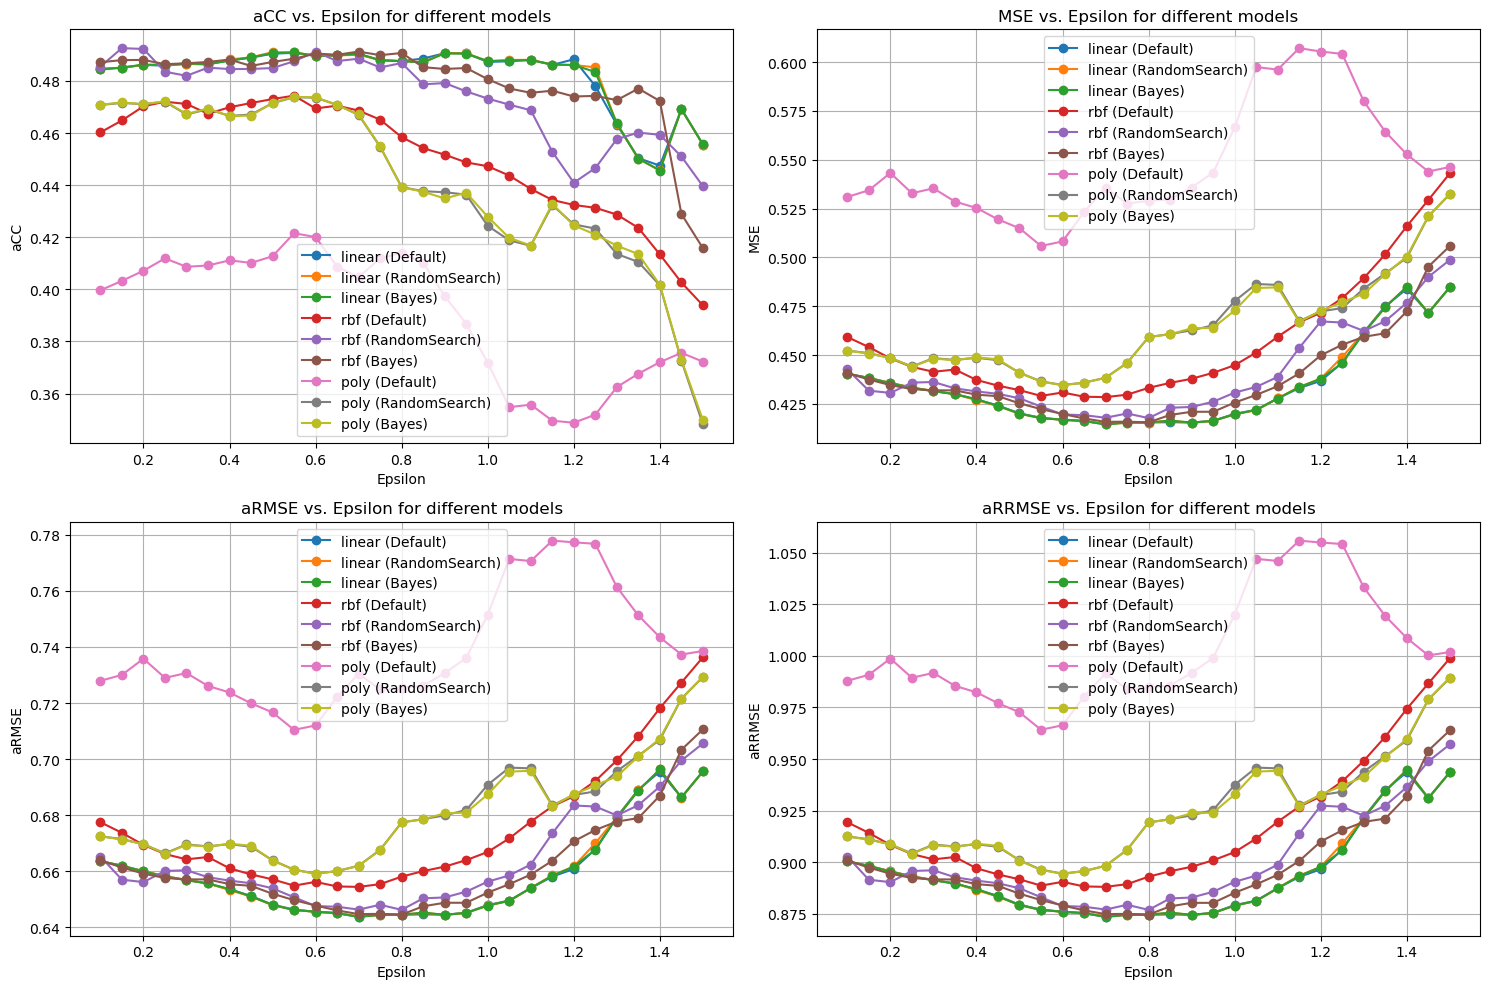

In [17]:
import matplotlib.pyplot as plt

# Create the line plots
plt.figure(figsize=(15, 10))

# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']

# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes']

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)  # Adjust number of rows and columns as needed

    for kernel in results_df['Kernel'].unique():
        for tuning in tuning_methods:
          # Filter data for the current metric, tuning, and kernel
          subset = results_df[(results_df['Kernel'] == kernel) & (results_df['Tuning'] == tuning)]

          if not subset.empty:
              plt.plot(subset['epsilon'], subset[metric], label=f"{kernel} ({tuning})", marker='o')

    plt.xlabel("Epsilon")
    plt.ylabel(metric)
    plt.title(f"{metric} vs. Epsilon for different models")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

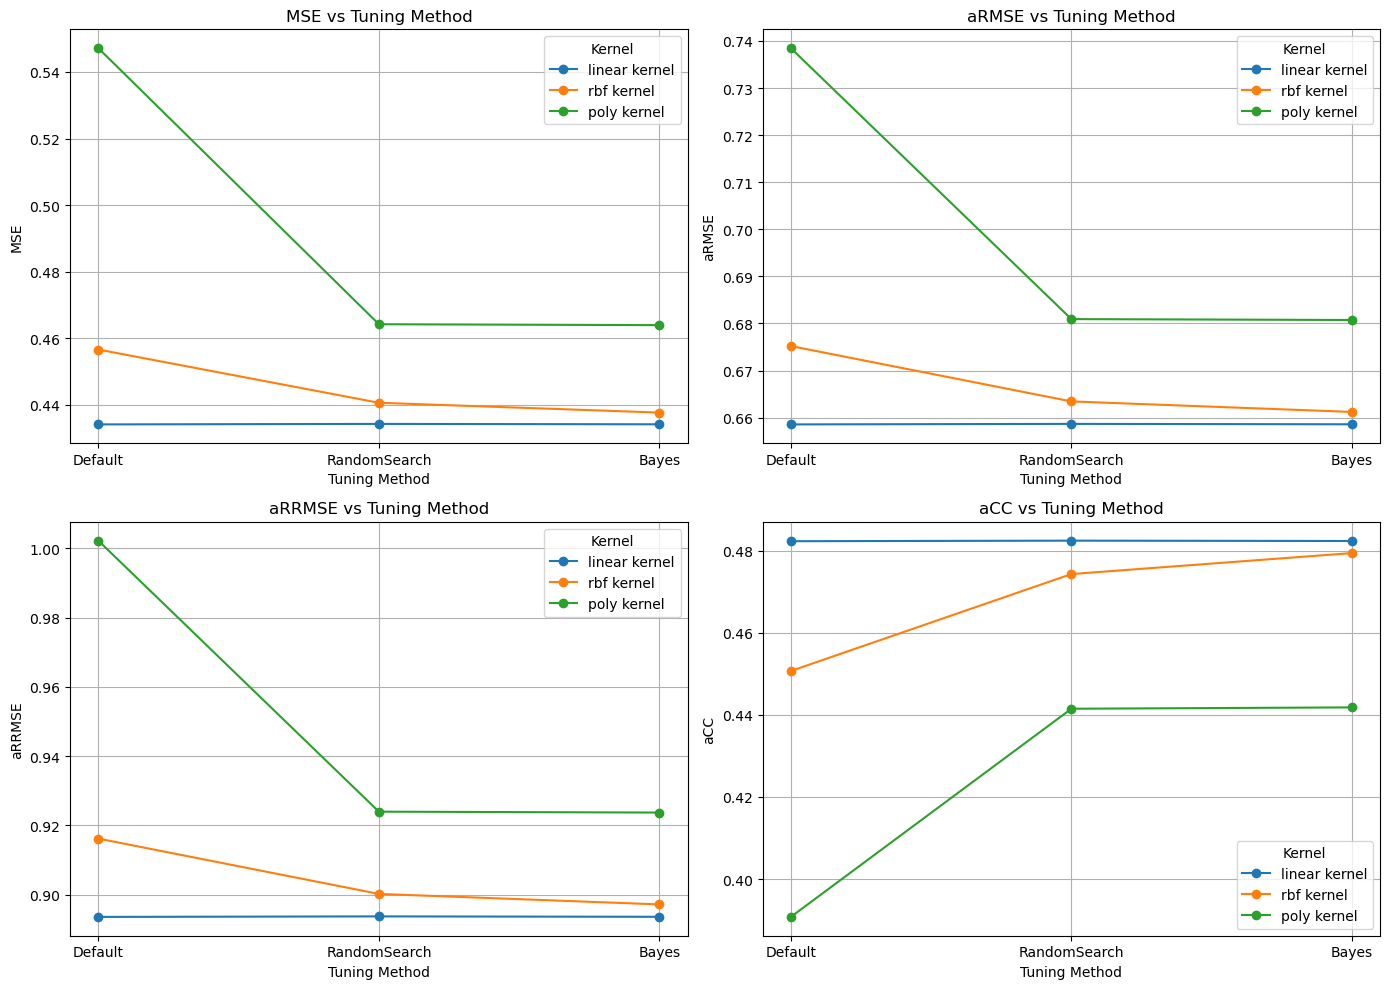

In [18]:
import matplotlib.pyplot as plt

# Metrics to plot
metrics = ['MSE', 'aRMSE', 'aRRMSE', 'aCC']

# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']

# Create the figure and subplots
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)  # Create 2x2 grid for subplots

    # Loop through each kernel
    for kernel in results_df['Kernel'].unique():
        subset = results_df[results_df['Kernel'] == kernel]

        # Calculate mean value for the current metric and tuning method
        metric_means = [
            subset[subset['Tuning'] == method][metric].mean() if method in subset['Tuning'].values else None
            for method in tuning_methods
        ]

        # Plot the line for the current kernel
        plt.plot(
            tuning_methods, metric_means, label=f"{kernel} kernel", marker='o'
        )

    # Subplot customization
    plt.title(f"{metric} vs Tuning Method")
    plt.xlabel("Tuning Method")
    plt.ylabel(metric)
    plt.legend(title="Kernel")
    plt.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


# Training model Genetic Algorithm

In [19]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# ===============================
# 3. Fungsi Evaluasi
# ===============================
def evaluate_individual(individual, kernel, epsilon, X_train, Y_train, X_test, Y_test, chain_order, verbose=False):
    model_params = {
        'C': individual[0],
        'gamma': individual[1] if kernel == 'rbf' else 'scale',  # Gamma hanya untuk rbf
        'degree': int(individual[2]) if kernel == 'poly' else 3,  # Degree hanya untuk poly
        'epsilon': epsilon
    }
    if verbose:
        print(f"Evaluating individual with params: {model_params}")
        
    model = RegressorChain(SVR(kernel=kernel, cache_size=1000, **model_params),
                           order=[Y_train.columns.get_loc(c) for c in chain_order])
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    #MSE
    mse = mean_squared_error(Y_test, y_pred)

    #aRMSE
    mse_per_target = np.mean((Y_test - y_pred) ** 2, axis=0)
    rmse_per_target = np.sqrt(mse_per_target)
    aRMSE = np.mean(rmse_per_target)

    #aRRMSE
    mse_per_target = np.mean((Y_test - y_pred) ** 2, axis=0)
    rmse_per_target = np.sqrt(mse_per_target)
    variance_per_target = np.mean((Y_test - Y_test.mean(axis=0)) ** 2, axis=0)
    rrmse_per_target = rmse_per_target / np.sqrt(variance_per_target)
    aRRMSE = np.mean(rrmse_per_target)

    #aCC
    correlations = [
        np.corrcoef(Y_test.iloc[:, j], y_pred[:, j])[0, 1] for j in range(Y_test.shape[1])
    ]
    aCC = np.mean(correlations)


    return mse, aRMSE, aRRMSE, aCC

# ===============================
# 4. Genetic Algorithm
# ===============================
def genetic_algorithm(kernel, epsilon, X_train, Y_train, X_test, Y_test, chain_order, generations=10, population_size=20, verbose=False):
    # Inisialisasi Populasi Awal
    if kernel == 'linear':
        param_space = [
            np.random.uniform(0.001, 100, population_size)
        ]
    elif kernel == 'rbf':
        param_space = [
            np.random.uniform(0.001, 100, population_size),
            np.random.uniform(0.001, 10, population_size)
        ]
    elif kernel == 'poly':
        param_space = [
            np.random.uniform(0.001, 100, population_size),
            np.random.uniform(0.001, 10, population_size),
            np.random.uniform(2, 5, population_size)
        ]

    # Bentuk Populasi Awal
    population = np.column_stack(param_space)

    for gen in range(generations):
        print(f"Generation {gen+1}/{generations}")

        # Evaluasi Populasi
        fitness_scores = []
        for idx, individual in enumerate(population):
            mse, aRMSE, aRRMSE, aCC = evaluate_individual(individual, kernel, epsilon, X_train, Y_train, X_test, Y_test, chain_order, verbose)
            fitness_scores.append((1 / mse))
            if verbose:
                print(f"Individual {idx+1}: MSE={mse}, aRMSE={aRMSE}, aRRMSE={aRRMSE}, aCC={aCC}")

        # Seleksi: Ambil individu terbaik
        sorted_indices = np.argsort(fitness_scores)[::-1]
        population = population[sorted_indices]
        fitness_scores = np.array(fitness_scores)[sorted_indices]

        # Reproduksi: Crossover dan Mutasi
        next_gen = []
        for _ in range(population_size // 2):
            parent1, parent2 = population[np.random.choice(range(10), 2, replace=False)]  # Seleksi terbaik 10
            child1 = np.mean([parent1, parent2], axis=0)  # Crossover
            child2 = np.random.uniform(-0.1, 0.1, size=child1.shape) + child1  # Mutasi

            # Pastikan parameter tetap valid
            if kernel == 'linear':
                child1 = np.clip(child1, 0.001, 100)
                child2 = np.clip(child2, 0.001, 100)
            elif kernel == 'rbf':
                child1 = np.clip(child1, [0.001, 0.001], [100, 10])
                child2 = np.clip(child2, [0.001, 0.001], [100, 10])
            elif kernel == 'poly':
                child1 = np.clip(child1, [0.001, 0.001, 2], [100, 10, 5])
                child2 = np.clip(child2, [0.001, 0.001, 2], [100, 10, 5])

            next_gen.append(child1)
            next_gen.append(child2)

        next_gen = np.array(next_gen)
        if population.shape[1] != next_gen.shape[1]:
            population = population[:, :next_gen.shape[1]]

        # Tambahkan elitisme
        population = np.vstack([next_gen, population[:2]])  # Tambahkan individu terbaik dari generasi sebelumnya

    # Evaluasi individu terbaik di generasi terakhir
    best_individual = population[0]
    best_mse, best_aRMSE, best_aRRMSE, best_aCC = evaluate_individual(
        best_individual, kernel, epsilon, X_train, Y_train, X_test, Y_test, chain_order, verbose
    )
    if verbose:
        print("Best Individual:", best_individual)
        print("Best MSE:", best_mse, "Best aRMSE:", best_aRMSE, "Best aRRMSE:", best_aRRMSE, "Best aCC:", best_aCC)
        
    return best_individual, best_mse, best_aRMSE, best_aRRMSE, best_aCC


# ===============================
# 5. Run Experiments for Genetic Algorithm
# ===============================
ga_results = []
kernels = ['linear', 'rbf', 'poly']
epsilon_values = np.arange(0.1, 1.55, 0.05)

for kernel in kernels:
    for epsilon in epsilon_values:
        print(f"Running GA for Kernel: {kernel}, Epsilon: {epsilon}")
        best_params, mse, aRMSE, aRRMSE, aCC = genetic_algorithm(
            kernel, epsilon, X_train, Y_train, X_test, Y_test, chain_order,
            generations=5, population_size=10, verbose=True
        )
        # Simpan hasil ke ga_results dengan format sama seperti Default, Random, Bayes
        ga_results.append({
            'Kernel': kernel,
            'Tuning': 'Genetic',
            'MSE': mse,
            'aRMSE': aRMSE,
            'aRRMSE': aRRMSE,
            'aCC': aCC,
            'epsilon': epsilon,
            'C': best_params[0],
            'gamma': best_params[1] if kernel == 'rbf' else '',
            'degree': best_params[2] if kernel == 'poly' else ''
        })

ga_results_df = pd.DataFrame(ga_results)
print(ga_results_df)

Running GA for Kernel: linear, Epsilon: 0.1
Generation 1/5
Evaluating individual with params: {'C': 44.61082666730269, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 1: MSE=0.44035664408497405, aRMSE=0.6635708100387265, aRRMSE=0.900377643995823, aCC=0.4845702108548355
Evaluating individual with params: {'C': 79.53483778000282, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 2: MSE=0.4403283125673284, aRMSE=0.6635497605458844, aRRMSE=0.9003487924590722, aCC=0.4844432972036969
Evaluating individual with params: {'C': 9.805073632917486, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 3: MSE=0.4403706398182541, aRMSE=0.6635817520661695, aRRMSE=0.9003921027136568, aCC=0.4844673386958612
Evaluating individual with params: {'C': 37.33278940055674, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 4: MSE=0.44024977001618426, aRMSE=0.6634902731292256, aRRMSE=0.9002683739409572, aCC=0.484477400106855
Evaluating individual with params: {'C': 86.4230970715843

Individual 4: MSE=0.4404214824492554, aRMSE=0.6636199768797637, aRRMSE=0.9004440478865501, aCC=0.48456880039579686
Evaluating individual with params: {'C': 74.00531895511229, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 5: MSE=0.4402493339022991, aRMSE=0.6634900404756281, aRRMSE=0.9002679647645973, aCC=0.48450593262772773
Evaluating individual with params: {'C': 74.10324126484093, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 6: MSE=0.44021546980238424, aRMSE=0.6634640555998483, aRRMSE=0.9002331593314745, aCC=0.4845095765248654
Evaluating individual with params: {'C': 56.4993780161941, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 7: MSE=0.4402384660072667, aRMSE=0.6634810931297116, aRRMSE=0.900256557482537, aCC=0.48451030984635085
Evaluating individual with params: {'C': 56.44617634215586, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 8: MSE=0.44029544410712707, aRMSE=0.663524634702249, aRRMSE=0.9003150512598886, aCC=0.48461882665434997

Individual 5: MSE=0.4383446344492551, aRMSE=0.6620498438255377, aRRMSE=0.8983169872518939, aCC=0.4850594262308915
Evaluating individual with params: {'C': 51.5871548526861, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 6: MSE=0.438339775277857, aRMSE=0.6620465049243501, aRRMSE=0.8983121549407587, aCC=0.48509301215180245
Evaluating individual with params: {'C': 59.07318130857898, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 7: MSE=0.43831853114783914, aRMSE=0.6620306433004054, aRRMSE=0.8982904661226756, aCC=0.4850581131836359
Evaluating individual with params: {'C': 58.98827882072339, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 8: MSE=0.4383487928439669, aRMSE=0.6620527438194608, aRRMSE=0.8983211403678337, aCC=0.48493245796646134
Evaluating individual with params: {'C': 30.388562621811246, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 9: MSE=0.4383846998952927, aRMSE=0.6620

Individual 4: MSE=0.43834731900270246, aRMSE=0.6620518033474331, aRRMSE=0.8983197077111293, aCC=0.4849873602788468
Evaluating individual with params: {'C': 48.497095155474206, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 5: MSE=0.4382812649021555, aRMSE=0.6620024728431367, aRRMSE=0.8982522669057342, aCC=0.48516566870141953
Evaluating individual with params: {'C': 48.48663161760261, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 6: MSE=0.43834730771909086, aRMSE=0.6620517143640361, aRRMSE=0.8983196600508243, aCC=0.48500493690327284
Evaluating individual with params: {'C': 64.52504444887242, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 7: MSE=0.4384063285314953, aRMSE=0.6620967423368839, aRRMSE=0.8983803390101137, aCC=0.4850811542845812
Evaluating individual with params: {'C': 64.42834173281365, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 8: MSE=0.438398791829792, aRMSE=0.66

Individual 3: MSE=0.43558853036002754, aRMSE=0.6599689159063358, aRRMSE=0.8954899552533354, aCC=0.4862297606876943
Evaluating individual with params: {'C': 48.2326732030917, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 4: MSE=0.4356063426621435, aRMSE=0.6599821952911302, aRRMSE=0.8955081836330723, aCC=0.4862719217362962
Evaluating individual with params: {'C': 63.678734213143755, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 5: MSE=0.4357257157677732, aRMSE=0.6600720454897184, aRRMSE=0.8956306559595406, aCC=0.486117927641095
Evaluating individual with params: {'C': 63.59261898780362, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 6: MSE=0.4356496919390883, aRMSE=0.6600151000268111, aRRMSE=0.8955527658890581, aCC=0.4861892441318435
Evaluating individual with params: {'C': 60.62696954092686, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 7: MSE=0.4357117357601974, aRMSE=0.660061

Individual 1: MSE=0.4332604880137514, aRMSE=0.658195736944757, aRRMSE=0.8930905519458963, aCC=0.4859978050369252
Evaluating individual with params: {'C': 90.19443730273007, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 2: MSE=0.4331970472141846, aRMSE=0.6581474034967836, aRRMSE=0.8930250914627701, aCC=0.48597060713878615
Evaluating individual with params: {'C': 55.60251679767273, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 3: MSE=0.43315028378468723, aRMSE=0.6581119381990881, aRRMSE=0.8929769190918273, aCC=0.48595663697093017
Evaluating individual with params: {'C': 97.7844770940565, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 4: MSE=0.43322369805985317, aRMSE=0.6581675666832665, aRRMSE=0.8930525198717314, aCC=0.4859939260049255
Evaluating individual with params: {'C': 68.20681573522867, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 5: MSE=0.4332634161683489, aRMSE=0.6581

Individual 2: MSE=0.4332892557515894, aRMSE=0.6582172853423107, aRRMSE=0.8931200484465371, aCC=0.4859823932021434
Evaluating individual with params: {'C': 83.11732560851064, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 3: MSE=0.4332277361396326, aRMSE=0.658170705440732, aRRMSE=0.8930567180023491, aCC=0.4859456731099594
Evaluating individual with params: {'C': 83.16312859742128, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 4: MSE=0.43321258902970106, aRMSE=0.6581592440085702, aRRMSE=0.893041128225686, aCC=0.4859674463378608
Evaluating individual with params: {'C': 74.31644774288466, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 5: MSE=0.43320685884350507, aRMSE=0.658154924678852, aRRMSE=0.8930352388667462, aCC=0.4859404227662693
Evaluating individual with params: {'C': 74.33864386373085, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 6: MSE=0.4332115293693998, aRMSE=0.6581584

Individual 1: MSE=0.43143888636549815, aRMSE=0.6568028553419185, aRRMSE=0.8912068283213325, aCC=0.48664279134294575
Evaluating individual with params: {'C': 49.121592469689766, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 2: MSE=0.4314281884200579, aRMSE=0.6567948274947716, aRRMSE=0.8911958478016138, aCC=0.4866474225369892
Evaluating individual with params: {'C': 34.16692407629325, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 3: MSE=0.43146704024363064, aRMSE=0.6568242841312346, aRRMSE=0.8912359054751353, aCC=0.4866389228143925
Evaluating individual with params: {'C': 34.1454482773201, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 4: MSE=0.4314873392674169, aRMSE=0.6568396987639697, aRRMSE=0.8912568486064498, aCC=0.48662714072485114
Evaluating individual with params: {'C': 61.8397350232364, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 5: MSE=0.4314708608171127, aRMSE=0.656

Individual 12: MSE=0.43140905440849686, aRMSE=0.6567802600158292, aRRMSE=0.8911760834922655, aCC=0.4866454217565999
Generation 5/5
Evaluating individual with params: {'C': 38.62601541497939, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 1: MSE=0.43149613423112737, aRMSE=0.6568465347982176, aRRMSE=0.8912660164239374, aCC=0.4866016739916338
Evaluating individual with params: {'C': 38.68903205086955, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 2: MSE=0.4314363541940344, aRMSE=0.6568009649389748, aRRMSE=0.891204235109818, aCC=0.486661007680253
Evaluating individual with params: {'C': 38.67928105514491, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 3: MSE=0.4314693885478028, aRMSE=0.6568263274281692, aRRMSE=0.8912384832003066, aCC=0.4866410901325434
Evaluating individual with params: {'C': 38.64173958098573, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 4: MSE=0.4314267318388569

Individual 11: MSE=0.4298753687686981, aRMSE=0.6556058385583815, aRRMSE=0.8895868767057353, aCC=0.48651740321938086
Evaluating individual with params: {'C': 48.565337429239605, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 12: MSE=0.42992854695491745, aRMSE=0.6556466634750173, aRRMSE=0.8896420771345779, aCC=0.4864684183134045
Generation 3/5
Evaluating individual with params: {'C': 44.263016153987515, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 1: MSE=0.4300090089082852, aRMSE=0.6557072545647735, aRRMSE=0.8897248282800982, aCC=0.4864565211920292
Evaluating individual with params: {'C': 44.25400969464054, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 2: MSE=0.4299598385671072, aRMSE=0.6556702207137148, aRRMSE=0.8896742557589393, aCC=0.4864508955859645
Evaluating individual with params: {'C': 16.314598283029188, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 3: MSE=0.42997181905690

Individual 10: MSE=0.42992182551838787, aRMSE=0.6556417489710545, aRRMSE=0.8896352591632058, aCC=0.48643426742099904
Evaluating individual with params: {'C': 12.260036857779374, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 11: MSE=0.4298753687686981, aRMSE=0.6556058385583815, aRRMSE=0.8895868767057353, aCC=0.48651740321938086
Evaluating individual with params: {'C': 16.302204884150697, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 12: MSE=0.4299136312927514, aRMSE=0.6556356445207173, aRRMSE=0.8896268738166622, aCC=0.4864233365256611
Evaluating individual with params: {'C': 23.281305505785554, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Best Individual: [23.28130551]
Best MSE: 0.43002204407859657 Best aRMSE: 0.6557173364352618 Best aRRMSE: 0.8897384073958837 Best aCC: 0.48640379777976506
Running GA for Kernel: linear, Epsilon: 0.40000000000000013
Generation 1/5
Evaluating individual with params: {'C': 67.8689303748

Individual 9: MSE=0.4272260998058989, aRMSE=0.653572025967147, aRRMSE=0.8868342125352849, aCC=0.48787417046041737
Evaluating individual with params: {'C': 36.23370973569066, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 10: MSE=0.4272657398292635, aRMSE=0.6536018317388439, aRRMSE=0.8868749810364114, aCC=0.48788056455050555
Evaluating individual with params: {'C': 40.82092627482175, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 11: MSE=0.42725862327845676, aRMSE=0.6535965335036447, aRRMSE=0.8868677003791825, aCC=0.48786787596508446
Evaluating individual with params: {'C': 38.48230374020547, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 12: MSE=0.4272759033317723, aRMSE=0.6536098690058577, aRRMSE=0.8868857204692626, aCC=0.4878230555676367
Generation 4/5
Evaluating individual with params: {'C': 41.92833012501964, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 1: MSE=0.42728654968

Individual 6: MSE=0.4241188099666546, aRMSE=0.6511840044488083, aRRMSE=0.883598142130837, aCC=0.48901550738238875
Evaluating individual with params: {'C': 79.3294307637344, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 7: MSE=0.4243068062215687, aRMSE=0.6513269687660154, aRRMSE=0.8837929274200251, aCC=0.488940534327714
Evaluating individual with params: {'C': 80.53699918087315, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 8: MSE=0.42420138623668535, aRMSE=0.6512469079236647, aRRMSE=0.8836837857545901, aCC=0.48898055940831336
Evaluating individual with params: {'C': 45.891585517716535, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 9: MSE=0.42432154132458466, aRMSE=0.651337122074261, aRRMSE=0.8838073826291839, aCC=0.4888520501596789
Evaluating individual with params: {'C': 99.82442883689016, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 10: MSE=0.42415390483232784, aRMSE=0.651

Individual 7: MSE=0.4241369808824361, aRMSE=0.651197588454087, aRRMSE=0.8836167918418587, aCC=0.48905943945118346
Evaluating individual with params: {'C': 45.10212368424526, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 8: MSE=0.4241312043244341, aRMSE=0.6511932946518746, aRRMSE=0.883610881894193, aCC=0.48904371175476297
Evaluating individual with params: {'C': 44.51639828983216, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 9: MSE=0.424140647535606, aRMSE=0.6512005631522464, aRRMSE=0.8836207331864347, aCC=0.4890287178497038
Evaluating individual with params: {'C': 44.46842683755674, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 10: MSE=0.42416242143605254, aRMSE=0.6512169396995255, aRRMSE=0.8836431557068063, aCC=0.4889811209167698
Evaluating individual with params: {'C': 45.20088633543832, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 11: MSE=0.42410144051036247, aRMSE=0.651

Individual 6: MSE=0.42000038064097817, aRMSE=0.6480116595435348, aRRMSE=0.8792952934503, aCC=0.4905405669358904
Evaluating individual with params: {'C': 75.10013428531533, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 7: MSE=0.42000998854959226, aRMSE=0.648018871810048, aRRMSE=0.8793051958883074, aCC=0.490735994764536
Evaluating individual with params: {'C': 75.09147258677397, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 8: MSE=0.4200751172933773, aRMSE=0.6480687198730207, aRRMSE=0.879373062906019, aCC=0.4904861985368354
Evaluating individual with params: {'C': 85.60489900983555, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 9: MSE=0.4200394461069227, aRMSE=0.6480416242117902, aRRMSE=0.8793360524938472, aCC=0.4905415558720445
Evaluating individual with params: {'C': 85.56169435933634, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 10: MSE=0.42002903352193255, aRMSE=0.648033131218

Individual 5: MSE=0.42006068703259924, aRMSE=0.6480576769437971, aRRMSE=0.8793580274893766, aCC=0.49051028921551887
Evaluating individual with params: {'C': 70.32219297905418, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 6: MSE=0.42003063487940684, aRMSE=0.6480348107787575, aRRMSE=0.8793268167642817, aCC=0.4905651650503289
Evaluating individual with params: {'C': 84.47702232827396, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 7: MSE=0.4200320857386012, aRMSE=0.6480359969784242, aRRMSE=0.8793283874191695, aCC=0.4905353281014561
Evaluating individual with params: {'C': 84.39947329590501, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 8: MSE=0.42004918172487105, aRMSE=0.6480489858721099, aRRMSE=0.8793461277763175, aCC=0.49052495469580304
Evaluating individual with params: {'C': 71.63697542267654, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 9: MSE=0.42003900059400384, aRMSE=0.6480

Individual 4: MSE=0.41786004446965697, aRMSE=0.6463596888043788, aRRMSE=0.87705296321931, aCC=0.4907466215597771
Evaluating individual with params: {'C': 70.0171473248214, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 5: MSE=0.41780942139393373, aRMSE=0.6463205404610366, aRRMSE=0.8769998391081504, aCC=0.4907834309010627
Evaluating individual with params: {'C': 69.93148198662479, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 6: MSE=0.4178571682379152, aRMSE=0.6463577100482689, aRRMSE=0.8770501336380027, aCC=0.4907529433999888
Evaluating individual with params: {'C': 69.9694893278139, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 7: MSE=0.4178470178006293, aRMSE=0.6463495264545661, aRRMSE=0.8770392250556353, aCC=0.4907783973938262
Evaluating individual with params: {'C': 69.97308636364198, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 8: MSE=0.41784806928198337, aRMSE=0.64635043250

Individual 2: MSE=0.41694373023068626, aRMSE=0.6456347787233097, aRRMSE=0.8760780922919363, aCC=0.48958288742032274
Evaluating individual with params: {'C': 23.29855509764124, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 3: MSE=0.4169676178315914, aRMSE=0.645652809648142, aRRMSE=0.8761028014599251, aCC=0.48951809246562283
Evaluating individual with params: {'C': 40.97089566730629, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 4: MSE=0.4169443685414175, aRMSE=0.6456346498436312, aRRMSE=0.8760782431617227, aCC=0.48955272041887965
Evaluating individual with params: {'C': 95.82959436034317, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 5: MSE=0.4169249495750338, aRMSE=0.6456196111514012, aRRMSE=0.8760578385836555, aCC=0.48957785892289574
Evaluating individual with params: {'C': 20.62220750670349, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 6: MSE=0.4168759672230127, aRMSE=0.645582

Individual 3: MSE=0.4169626654696045, aRMSE=0.6456495653933603, aRRMSE=0.8760980905142466, aCC=0.4895320879906197
Evaluating individual with params: {'C': 21.95407718865266, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 4: MSE=0.4169665553007472, aRMSE=0.6456520033146453, aRRMSE=0.8761016988095902, aCC=0.48950283927446614
Evaluating individual with params: {'C': 21.30662970636759, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 5: MSE=0.4169450053188427, aRMSE=0.6456350292130171, aRRMSE=0.8760788172140149, aCC=0.489560009496765
Evaluating individual with params: {'C': 21.385768493622745, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 6: MSE=0.4169860966096489, aRMSE=0.6456675267817031, aRRMSE=0.876122556792966, aCC=0.4894835101239639
Evaluating individual with params: {'C': 17.891915480569534, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 7: MSE=0.41696008362274756, aRMSE=0.64564704

Individual 2: MSE=0.41631409520143975, aRMSE=0.645168122770823, aRRMSE=0.8754329867520657, aCC=0.48971186520741006
Evaluating individual with params: {'C': 52.298672562702116, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 3: MSE=0.41628624221680866, aRMSE=0.6451458658916243, aRRMSE=0.8754031993798901, aCC=0.489812234381816
Evaluating individual with params: {'C': 52.3066346264192, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 4: MSE=0.41625185794593467, aRMSE=0.6451188447867778, aRRMSE=0.8753667639809646, aCC=0.48975919715420635
Evaluating individual with params: {'C': 97.647899303476, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 5: MSE=0.41633853484144, aRMSE=0.6451868089791489, aRRMSE=0.8754584960871525, aCC=0.489702684304726
Evaluating individual with params: {'C': 97.72010554626215, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 6: MSE=0.41636408730042807, aRMSE=0.64520633928

Individual 1: MSE=0.4162753744898328, aRMSE=0.6451369676278613, aRRMSE=0.8753914159734907, aCC=0.489809988557591
Evaluating individual with params: {'C': 57.94456453806403, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 2: MSE=0.4162808751434035, aRMSE=0.6451415231443448, aRRMSE=0.8753974188886237, aCC=0.48972260280099467
Evaluating individual with params: {'C': 44.32673461612569, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 3: MSE=0.4163390364220305, aRMSE=0.6451871989254432, aRRMSE=0.8754590244082663, aCC=0.4896951314435457
Evaluating individual with params: {'C': 44.41487199435879, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 4: MSE=0.4163069888038545, aRMSE=0.6451624103649061, aRRMSE=0.8754253619651463, aCC=0.48969599645901163
Evaluating individual with params: {'C': 57.887390709742604, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 5: MSE=0.4162761205736503, aRMSE=0.64513807

Individual 1: MSE=0.4144505101545558, aRMSE=0.6437284220065753, aRRMSE=0.8734757002891025, aCC=0.4904060724190541
Evaluating individual with params: {'C': 58.31516539123117, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 2: MSE=0.4144697607696711, aRMSE=0.6437433206970158, aRRMSE=0.8734959496381386, aCC=0.4903892428135709
Evaluating individual with params: {'C': 79.38664046516189, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 3: MSE=0.4144580172000284, aRMSE=0.6437342498739105, aRRMSE=0.8734836095010134, aCC=0.4903954534343341
Evaluating individual with params: {'C': 79.4270928251398, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 4: MSE=0.4144727236966165, aRMSE=0.6437456883654391, aRRMSE=0.8734991189863974, aCC=0.4903899890398541
Evaluating individual with params: {'C': 48.112730575550174, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 5: MSE=0.4144835787280266, aRMSE=0.6437540711

Individual 12: MSE=0.4144505101545558, aRMSE=0.6437284220065753, aRRMSE=0.8734757002891025, aCC=0.4904060724190541
Evaluating individual with params: {'C': 62.25492913316721, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Best Individual: [62.25492913]
Best MSE: 0.41446052218553453 Best aRMSE: 0.6437361773653477 Best aRRMSE: 0.873486236529557 Best aCC: 0.4903881985366617
Running GA for Kernel: linear, Epsilon: 0.7500000000000002
Generation 1/5
Evaluating individual with params: {'C': 52.20386404849489, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 1: MSE=0.4153518021305406, aRMSE=0.6444201452420164, aRRMSE=0.8744192123884693, aCC=0.4879375055424433
Evaluating individual with params: {'C': 11.302053639927314, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 2: MSE=0.4153462139208677, aRMSE=0.644417099053862, aRRMSE=0.8744142958499255, aCC=0.48803822215147097
Evaluating individual with params: {'C': 39.71570067014272, 'gam

Individual 12: MSE=0.41534658232533284, aRMSE=0.6444168792711236, aRRMSE=0.8744143058698193, aCC=0.4879910974096391
Generation 4/5
Evaluating individual with params: {'C': 31.463286084463824, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 1: MSE=0.41536472712210154, aRMSE=0.6444304229123407, aRRMSE=0.8744330063326688, aCC=0.4879338890321773
Evaluating individual with params: {'C': 31.400587999540683, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 2: MSE=0.4153550441044533, aRMSE=0.6444238600242801, aRRMSE=0.8744235242758087, aCC=0.48801851835851645
Evaluating individual with params: {'C': 31.511957997370125, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 3: MSE=0.4153743550442254, aRMSE=0.6444381996453807, aRRMSE=0.874443371892301, aCC=0.4880249716039476
Evaluating individual with params: {'C': 31.51607803555377, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 4: MSE=0.415357488076989

Individual 9: MSE=0.4154690874430722, aRMSE=0.6445292040415627, aRRMSE=0.8745552490436901, aCC=0.4875426406263639
Evaluating individual with params: {'C': 92.01470637611082, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 10: MSE=0.41541045512240626, aRMSE=0.6444834977867013, aRRMSE=0.8744933949107991, aCC=0.4876376732642255
Generation 2/5
Evaluating individual with params: {'C': 38.50980291950473, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 1: MSE=0.415438843576346, aRMSE=0.6445055520982645, aRRMSE=0.8745232960376199, aCC=0.48757401934120725
Evaluating individual with params: {'C': 38.56511891083091, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 2: MSE=0.4154478344829913, aRMSE=0.6445126007237891, aRRMSE=0.8745328060658746, aCC=0.4875501730236067
Evaluating individual with params: {'C': 71.79764757722539, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 3: MSE=0.41538711245396176, 

Individual 10: MSE=0.41547088621948464, aRMSE=0.644531328119963, aRRMSE=0.8745575975104114, aCC=0.48756798638169563
Evaluating individual with params: {'C': 51.77859849324061, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 11: MSE=0.4153540710756838, aRMSE=0.6444394828569984, aRRMSE=0.8744338712041511, aCC=0.4876738857925573
Evaluating individual with params: {'C': 76.19547389087211, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 12: MSE=0.41535924345230313, aRMSE=0.6444437985139184, aRRMSE=0.8744395071355373, aCC=0.48771759122029956
Generation 5/5
Evaluating individual with params: {'C': 50.48329905028997, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 1: MSE=0.4154518745297582, aRMSE=0.64451594230241, aRRMSE=0.8745371888016092, aCC=0.48756278177640533
Evaluating individual with params: {'C': 50.49734271831962, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 2: MSE=0.4154468292161081

Individual 10: MSE=0.4163618644066951, aRMSE=0.6452281608646987, aRRMSE=0.8754984416119219, aCC=0.48719018996898056
Evaluating individual with params: {'C': 11.52575006505908, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 11: MSE=0.41612158211321115, aRMSE=0.6450438593322452, aRRMSE=0.8752468170223121, aCC=0.4876736125474193
Evaluating individual with params: {'C': 7.908964717335434, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 12: MSE=0.4161264593356947, aRMSE=0.6450476539666585, aRRMSE=0.8752519539398076, aCC=0.4876460950809733
Generation 3/5
Evaluating individual with params: {'C': 57.169272969881916, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 1: MSE=0.4163938470496338, aRMSE=0.6452527339937895, aRRMSE=0.8755319506530861, aCC=0.4871498568992092
Evaluating individual with params: {'C': 57.25311279093512, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 2: MSE=0.416407028889234

Individual 9: MSE=0.4164070156092802, aRMSE=0.6452629036572044, aRRMSE=0.8755457763448262, aCC=0.4871438406616425
Evaluating individual with params: {'C': 34.66572814717183, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 10: MSE=0.41639381317116, aRMSE=0.6452525745181077, aRRMSE=0.8755318405252003, aCC=0.4871577850351183
Evaluating individual with params: {'C': 11.52575006505908, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 11: MSE=0.41612158211321115, aRMSE=0.6450438593322452, aRRMSE=0.8752468170223121, aCC=0.4876736125474193
Evaluating individual with params: {'C': 7.908964717335434, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 12: MSE=0.4161264593356947, aRMSE=0.6450476539666585, aRRMSE=0.8752519539398076, aCC=0.4876460950809733
Evaluating individual with params: {'C': 16.157724242127387, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Best Individual: [16.15772424]
Best MSE: 0.4162336404

Individual 8: MSE=0.41542856359078395, aRMSE=0.6445259564267461, aRRMSE=0.8745241402283821, aCC=0.4906234206864406
Evaluating individual with params: {'C': 44.22583668094991, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 9: MSE=0.41541593198488624, aRMSE=0.644515817459303, aRRMSE=0.8745108399606303, aCC=0.4906250245519961
Evaluating individual with params: {'C': 44.22437018871523, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 10: MSE=0.4154044969324089, aRMSE=0.6445070119280192, aRRMSE=0.8744988050668119, aCC=0.4906504820468917
Evaluating individual with params: {'C': 41.6256830586245, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 11: MSE=0.4153871623029439, aRMSE=0.6444935274379252, aRRMSE=0.8744805579014258, aCC=0.49067016837937527
Evaluating individual with params: {'C': 18.72506663114064, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 12: MSE=0.415390152500943, aRMSE=0.6444957

Individual 5: MSE=0.41624258533301034, aRMSE=0.6451547299266629, aRRMSE=0.8753803641419352, aCC=0.49061338726915094
Evaluating individual with params: {'C': 12.220803241020967, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 6: MSE=0.4162437292196622, aRMSE=0.645155826220648, aRRMSE=0.875381592260055, aCC=0.4906588805722853
Evaluating individual with params: {'C': 51.07013497609247, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 7: MSE=0.41623995544624526, aRMSE=0.6451527140449426, aRRMSE=0.8753776015125282, aCC=0.4906534561734725
Evaluating individual with params: {'C': 84.51462907535692, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 8: MSE=0.4162522113752031, aRMSE=0.6451622688638918, aRRMSE=0.87539049588289, aCC=0.49059838461160127
Evaluating individual with params: {'C': 42.30386461135309, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 9: MSE=0.4162221409805399, aRMSE=0.645138922

Individual 6: MSE=0.4162216135692263, aRMSE=0.645138642703701, aRRMSE=0.8753583316170106, aCC=0.490650898016882
Evaluating individual with params: {'C': 64.34957431918838, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 7: MSE=0.4162375481700961, aRMSE=0.6451507837156838, aRRMSE=0.8753750620495583, aCC=0.4906370144461235
Evaluating individual with params: {'C': 64.32930838580728, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 8: MSE=0.4162379319921946, aRMSE=0.6451511862405965, aRRMSE=0.8753754787613811, aCC=0.4906119780269248
Evaluating individual with params: {'C': 64.36862076857574, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 9: MSE=0.41623914584967514, aRMSE=0.6451520403671638, aRRMSE=0.8753767444026064, aCC=0.4906260840406018
Evaluating individual with params: {'C': 64.36683145326519, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 10: MSE=0.4162546467929884, aRMSE=0.6451639420

Individual 6: MSE=0.4196754877574571, aRMSE=0.647801371826161, aRRMSE=0.8789805124031804, aCC=0.4874817704691987
Evaluating individual with params: {'C': 41.714614305598985, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 7: MSE=0.4196241036055852, aRMSE=0.6477624551071006, aRRMSE=0.8789269774976427, aCC=0.4876084900330383
Evaluating individual with params: {'C': 41.614827528206916, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 8: MSE=0.4196200226499016, aRMSE=0.6477593056895444, aRRMSE=0.8789227037418297, aCC=0.48760870643926096
Evaluating individual with params: {'C': 75.05652348430698, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 9: MSE=0.4196437311437523, aRMSE=0.6477775393688876, aRRMSE=0.878947509074139, aCC=0.48757943442905516
Evaluating individual with params: {'C': 74.96541533173941, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 10: MSE=0.41966571487003856, aRMSE=0.647793

Individual 5: MSE=0.4196380862651713, aRMSE=0.6477731720734317, aRRMSE=0.8789415935979759, aCC=0.4875828879352895
Evaluating individual with params: {'C': 63.04771958415197, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 6: MSE=0.419643922960163, aRMSE=0.6477772766536087, aRRMSE=0.8789475575895705, aCC=0.48755708452125457
Evaluating individual with params: {'C': 63.01440334394043, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 7: MSE=0.419632782865377, aRMSE=0.6477690980920756, aRRMSE=0.8789360466111358, aCC=0.487583960069671
Evaluating individual with params: {'C': 63.035289485559694, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 8: MSE=0.4196331543829084, aRMSE=0.6477694159109952, aRRMSE=0.8789364470524839, aCC=0.4875869825105825
Evaluating individual with params: {'C': 61.07517014935829, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 9: MSE=0.4196271826665051, aRMSE=0.64776478483

Individual 4: MSE=0.42177332221393316, aRMSE=0.6494332505021554, aRRMSE=0.8811764710308486, aCC=0.4877840976318758
Evaluating individual with params: {'C': 68.20095753158895, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 5: MSE=0.4218085616532363, aRMSE=0.6494600684670302, aRRMSE=0.8812133772740095, aCC=0.48774999183172596
Evaluating individual with params: {'C': 68.22800210783366, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 6: MSE=0.4218206549789925, aRMSE=0.6494693876082291, aRRMSE=0.8812260068009462, aCC=0.4877347183905929
Evaluating individual with params: {'C': 47.69264006685725, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 7: MSE=0.42183029918489934, aRMSE=0.6494767631317335, aRRMSE=0.8812360947100435, aCC=0.48771803211952963
Evaluating individual with params: {'C': 47.69804173347803, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 8: MSE=0.4217875819929794, aRMSE=0.649444

Individual 1: MSE=0.4279016559422165, aRMSE=0.6541416521046017, aRRMSE=0.8875443571519707, aCC=0.48810985522551703
Evaluating individual with params: {'C': 25.960673987315328, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 2: MSE=0.42778791873021377, aRMSE=0.6540547063165607, aRRMSE=0.8874264225890425, aCC=0.488244037391677
Evaluating individual with params: {'C': 95.0376604514593, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 3: MSE=0.42787255561332116, aRMSE=0.6541194117562954, aRRMSE=0.8875141532017419, aCC=0.4880979179738536
Evaluating individual with params: {'C': 83.2241536918743, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 4: MSE=0.42782364402731254, aRMSE=0.6540820306810928, aRRMSE=0.8874633684645824, aCC=0.48822257563285143
Evaluating individual with params: {'C': 19.059818746261286, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 5: MSE=0.4278895295676868, aRMSE=0.654132

Individual 2: MSE=0.4278490327546976, aRMSE=0.6541014129157546, aRRMSE=0.8874898909250385, aCC=0.4881935043155185
Evaluating individual with params: {'C': 54.157424123681196, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 3: MSE=0.4279150932843634, aRMSE=0.6541519617868367, aRRMSE=0.8875579874726856, aCC=0.4881379266423729
Evaluating individual with params: {'C': 54.097748770877345, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 4: MSE=0.4278706414636373, aRMSE=0.6541179671039699, aRRMSE=0.8875120248535461, aCC=0.48819090959305467
Evaluating individual with params: {'C': 54.12759794918001, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 5: MSE=0.42781463696976635, aRMSE=0.6540751200236927, aRRMSE=0.8874542164552023, aCC=0.4882256532946022
Evaluating individual with params: {'C': 54.06008708607535, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 6: MSE=0.42788604485345627, aRMSE=0.65412

Individual 1: MSE=0.4335946013878692, aRMSE=0.6584767678475556, aRRMSE=0.8934075341038454, aCC=0.4862040199708233
Evaluating individual with params: {'C': 54.42947263992697, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 2: MSE=0.4336174930031734, aRMSE=0.6584941827835888, aRRMSE=0.8934312652051022, aCC=0.4861775663303799
Evaluating individual with params: {'C': 27.89348744203424, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 3: MSE=0.43375150829559694, aRMSE=0.6585957846963624, aRRMSE=0.8935686600839936, aCC=0.4865388812327762
Evaluating individual with params: {'C': 27.80320166883435, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 4: MSE=0.433601661454212, aRMSE=0.658482130905205, aRRMSE=0.8934148174419555, aCC=0.4862026761032169
Evaluating individual with params: {'C': 50.65075357503745, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 5: MSE=0.43373292391448026, aRMSE=0.6585816768

Individual 12: MSE=0.4335946013878692, aRMSE=0.6584767678475556, aRRMSE=0.8934075341038454, aCC=0.4862040199708233
Generation 5/5
Evaluating individual with params: {'C': 13.607833927251617, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 1: MSE=0.43371617052996553, aRMSE=0.6585689313850641, aRRMSE=0.8935321511142326, aCC=0.4865598066916963
Evaluating individual with params: {'C': 13.678408435907906, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 2: MSE=0.43372225150517296, aRMSE=0.6585735671713053, aRRMSE=0.893538498231456, aCC=0.48654601504199724
Evaluating individual with params: {'C': 13.64555595606594, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 3: MSE=0.4337867251489673, aRMSE=0.6586225039441831, aRRMSE=0.8936048628402654, aCC=0.48634743331328034
Evaluating individual with params: {'C': 13.63334748854793, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 4: MSE=0.433748120067253

Individual 12: MSE=0.4376697372790127, aRMSE=0.6615370440331119, aRRMSE=0.8975234249175005, aCC=0.4861086013330883
Generation 3/5
Evaluating individual with params: {'C': 51.505797810004324, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 1: MSE=0.437710978576971, aRMSE=0.6615680940113327, aRRMSE=0.8975654500134069, aCC=0.48609415419874713
Evaluating individual with params: {'C': 51.552320185442504, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 2: MSE=0.4379255774911881, aRMSE=0.6617291998421349, aRRMSE=0.8977831303569022, aCC=0.48604965728680566
Evaluating individual with params: {'C': 57.14174962330148, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 3: MSE=0.4377500031121192, aRMSE=0.6615978092633229, aRRMSE=0.8976059591511113, aCC=0.48599438317485744
Evaluating individual with params: {'C': 57.06577823750277, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 4: MSE=0.4377458611219329

Individual 12: MSE=0.43765120214882897, aRMSE=0.6615230163756727, aRRMSE=0.8975043763430147, aCC=0.48611279273838803
Evaluating individual with params: {'C': 15.047175123626756, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Best Individual: [15.04717512]
Best MSE: 0.43768500643284464 Best aRMSE: 0.6615484853149016 Best aRRMSE: 0.8975388628634087 Best aCC: 0.4861010697891871
Running GA for Kernel: linear, Epsilon: 1.2500000000000004
Generation 1/5
Evaluating individual with params: {'C': 53.128792915773424, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 1: MSE=0.4449374365839569, aRMSE=0.6669923110745036, aRRMSE=0.904913335452582, aCC=0.47824208024795434
Evaluating individual with params: {'C': 79.02992847656598, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 2: MSE=0.44496112876615157, aRMSE=0.6670100831380071, aRRMSE=0.9049374569313617, aCC=0.47822064083731775
Evaluating individual with params: {'C': 26.82627369641959

Individual 11: MSE=0.44488162863992387, aRMSE=0.6669501443907667, aRRMSE=0.9048558918135348, aCC=0.47829157067489625
Evaluating individual with params: {'C': 14.603873202211567, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 12: MSE=0.4448891879547955, aRMSE=0.6669557628658287, aRRMSE=0.9048634808861412, aCC=0.47832915270402504
Generation 4/5
Evaluating individual with params: {'C': 43.54062583669874, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 1: MSE=0.44517530096686786, aRMSE=0.6671676582294224, aRRMSE=0.9051492085985755, aCC=0.47849723412775425
Evaluating individual with params: {'C': 43.529977544371725, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 2: MSE=0.44493987074942015, aRMSE=0.6669941077691766, aRRMSE=0.9049157534651497, aCC=0.4782369527854019
Evaluating individual with params: {'C': 26.107325054067218, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 3: MSE=0.4451786889

Individual 8: MSE=0.46154088239140734, aRMSE=0.6792895334775404, aRRMSE=0.9215766565812009, aCC=0.4636405802352477
Evaluating individual with params: {'C': 92.24291715931996, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 9: MSE=0.46152251551885115, aRMSE=0.6792765083069701, aRRMSE=0.9215592474352102, aCC=0.46356894294003625
Evaluating individual with params: {'C': 57.970557157740885, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 10: MSE=0.4615898388297238, aRMSE=0.6793256097230955, aRRMSE=0.9216256272878709, aCC=0.4635050616031875
Generation 2/5
Evaluating individual with params: {'C': 76.03684461802294, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 1: MSE=0.4615660493213256, aRMSE=0.6793084244603389, aRRMSE=0.9216024833196754, aCC=0.4634844285709003
Evaluating individual with params: {'C': 76.12275668761023, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 2: MSE=0.4615155969910776

Individual 9: MSE=0.4613414780861873, aRMSE=0.6791450273668697, aRRMSE=0.921381814940132, aCC=0.4636513677564748
Evaluating individual with params: {'C': 40.46166035722846, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 10: MSE=0.46132841806914615, aRMSE=0.6791356631892962, aRRMSE=0.921369245244159, aCC=0.4635882253524244
Evaluating individual with params: {'C': 50.75605062318361, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 11: MSE=0.46127929397740247, aRMSE=0.6790995898317873, aRRMSE=0.9213203518896036, aCC=0.4636842515707876
Evaluating individual with params: {'C': 20.980668176668885, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 12: MSE=0.4612851175349548, aRMSE=0.6791036981463513, aRRMSE=0.9213258290252238, aCC=0.46369411972876196
Generation 5/5
Evaluating individual with params: {'C': 22.723530879488514, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 1: MSE=0.461525109959075

Individual 8: MSE=0.4742027319765129, aRMSE=0.6885576263664008, aRRMSE=0.9341579112679024, aCC=0.44981449551041225
Evaluating individual with params: {'C': 68.44590491746067, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 9: MSE=0.4742181160339872, aRMSE=0.6885681315425736, aRRMSE=0.9341717770542922, aCC=0.4499047026560393
Evaluating individual with params: {'C': 68.51792066592641, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 10: MSE=0.47432050970230133, aRMSE=0.6886437287792064, aRRMSE=0.9342750758974281, aCC=0.44967400336306645
Evaluating individual with params: {'C': 15.781619450669893, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 11: MSE=0.474187683840449, aRMSE=0.6885464037968322, aRRMSE=0.9341425124219976, aCC=0.44988165640124367
Evaluating individual with params: {'C': 84.74986971733661, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 12: MSE=0.4742107655564362, aRMSE=0.688

Individual 7: MSE=0.4742971222902357, aRMSE=0.6886267615551186, aRRMSE=0.9342520628320068, aCC=0.4497032624840321
Evaluating individual with params: {'C': 47.419316237436036, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 8: MSE=0.4742040370833782, aRMSE=0.688558444776795, aRRMSE=0.9341589462734093, aCC=0.4498101902396332
Evaluating individual with params: {'C': 36.16230195920714, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 9: MSE=0.4742891027149461, aRMSE=0.6886208924932493, aRRMSE=0.9342440726304666, aCC=0.44971952370488155
Evaluating individual with params: {'C': 36.205086435491495, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 10: MSE=0.47424284963975516, aRMSE=0.6885867970151374, aRRMSE=0.9341975131215642, aCC=0.44982160181142117
Evaluating individual with params: {'C': 33.605827967628294, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 11: MSE=0.4741807576484375, aRMSE=0.688

Individual 6: MSE=0.4848820263865001, aRMSE=0.6962896772549421, aRRMSE=0.9446619218985199, aCC=0.4458213381333454
Evaluating individual with params: {'C': 44.09774950367094, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 7: MSE=0.4848450737240146, aRMSE=0.696263420182835, aRRMSE=0.9446264949437098, aCC=0.4458471974385227
Evaluating individual with params: {'C': 44.11187085607107, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 8: MSE=0.4848289801913782, aRMSE=0.6962523793816828, aRRMSE=0.9446118842751391, aCC=0.4456978915225638
Evaluating individual with params: {'C': 56.697684664152106, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 9: MSE=0.48476866660261886, aRMSE=0.696209028335453, aRRMSE=0.9445530392518928, aCC=0.4457593147603741
Evaluating individual with params: {'C': 56.69875944560899, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 10: MSE=0.4848908761846358, aRMSE=0.696296175

Individual 3: MSE=0.47163747783279775, aRMSE=0.6863577450899552, aRRMSE=0.9310605217073746, aCC=0.4692105908226928
Evaluating individual with params: {'C': 74.82502336431492, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 4: MSE=0.4716525634488359, aRMSE=0.6863684369482786, aRRMSE=0.9310749579907058, aCC=0.46914432740087963
Evaluating individual with params: {'C': 6.843217889777051, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 5: MSE=0.47168167868656685, aRMSE=0.6863891924161816, aRRMSE=0.9311030116787615, aCC=0.4691887839286635
Evaluating individual with params: {'C': 89.9724821974449, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 6: MSE=0.47161291578267583, aRMSE=0.6863406779696726, aRRMSE=0.9310375606414956, aCC=0.46915756982846557
Evaluating individual with params: {'C': 43.326541354833026, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 7: MSE=0.47163614560989886, aRMSE=0.6863

Individual 4: MSE=0.47165277605322253, aRMSE=0.6863686999648049, aRRMSE=0.9310753404359171, aCC=0.4691977855966393
Evaluating individual with params: {'C': 52.514950103658165, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 5: MSE=0.4716152388480435, aRMSE=0.6863423026080214, aRRMSE=0.9310397489106235, aCC=0.4691952587690227
Evaluating individual with params: {'C': 52.52911956940229, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 6: MSE=0.4716322357882377, aRMSE=0.6863541841265342, aRRMSE=0.9310557512071325, aCC=0.4691925102440682
Evaluating individual with params: {'C': 54.22880011406602, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 7: MSE=0.4715952068372906, aRMSE=0.6863285101296195, aRRMSE=0.9310212250947218, aCC=0.46921258496074986
Evaluating individual with params: {'C': 54.31687888386103, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 8: MSE=0.4716147089275349, aRMSE=0.6863418

Individual 3: MSE=0.48475630811984927, aRMSE=0.6956470843333634, aRRMSE=0.9436208437495203, aCC=0.45566095951481034
Evaluating individual with params: {'C': 50.0799405807152, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 4: MSE=0.48469712889656413, aRMSE=0.69560623616093, aRRMSE=0.9435657507059955, aCC=0.4555846956388784
Evaluating individual with params: {'C': 45.8705529659985, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 5: MSE=0.48468845989303877, aRMSE=0.695599949584728, aRRMSE=0.9435572102724541, aCC=0.45563327208595206
Evaluating individual with params: {'C': 45.94285357646833, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 6: MSE=0.48473380390631093, aRMSE=0.695631511000253, aRRMSE=0.9435998313453415, aCC=0.4555955125479669
Evaluating individual with params: {'C': 17.29172562852297, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 7: MSE=0.484708240837917, aRMSE=0.69561400595

Individual 2: MSE=0.48468487832107454, aRMSE=0.6955977222714188, aRRMSE=0.9435542561037051, aCC=0.4556081126982173
Evaluating individual with params: {'C': 48.33954095527706, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 3: MSE=0.4847331626304082, aRMSE=0.6956306832099541, aRRMSE=0.9435986365744504, aCC=0.455708510542436
Evaluating individual with params: {'C': 48.38175791286093, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 4: MSE=0.48468728775335135, aRMSE=0.6955991679702662, aRRMSE=0.943556161684463, aCC=0.45567960699133414
Evaluating individual with params: {'C': 43.32094308327839, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 5: MSE=0.48473705542782775, aRMSE=0.6956336451630187, aRRMSE=0.9436026873546116, aCC=0.4556307196124746
Evaluating individual with params: {'C': 43.26266029434556, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 6: MSE=0.48470377503683015, aRMSE=0.6956105

Individual 2: MSE=0.5429356558655398, aRMSE=0.7368381933933237, aRRMSE=0.999723894748972, aCC=0.09922752526368529
Evaluating individual with params: {'C': 57.38250817416329, 'gamma': 6.5478320175316185, 'degree': 3, 'epsilon': 0.1}
Individual 3: MSE=0.545405499267054, aRMSE=0.738507617286313, aRRMSE=1.0019792747698542, aCC=0.06941866970497669
Evaluating individual with params: {'C': 57.43774603430427, 'gamma': 6.581000937373636, 'degree': 3, 'epsilon': 0.1}
Individual 4: MSE=0.5454144222764142, aRMSE=0.7385136384358659, aRRMSE=1.0019874096715786, aCC=0.06930552880073397
Evaluating individual with params: {'C': 43.48629914361785, 'gamma': 4.320966913810531, 'degree': 3, 'epsilon': 0.1}
Individual 5: MSE=0.5437447315962736, aRMSE=0.737385727329326, aRRMSE=1.0004636812471304, aCC=0.0906357572239011
Evaluating individual with params: {'C': 43.56522712593269, 'gamma': 4.2647349059860495, 'degree': 3, 'epsilon': 0.1}
Individual 6: MSE=0.5436467326674651, aRMSE=0.7373194420069616, aRRMSE=1.00

Individual 1: MSE=0.5415569383415515, aRMSE=0.7358861281602798, aRRMSE=0.9984072378779325, aCC=0.29704360385598394
Evaluating individual with params: {'C': 8.932048384164036, 'gamma': 2.696560435079571, 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 2: MSE=0.5365791094330589, aRMSE=0.7325156019761262, aRRMSE=0.9938777174445035, aCC=0.14272006841672846
Evaluating individual with params: {'C': 28.029492826380654, 'gamma': 9.286763872246384, 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 3: MSE=0.5451419317314024, aRMSE=0.7383280559211335, aRRMSE=1.001733819343983, aCC=0.06528403668203928
Evaluating individual with params: {'C': 80.50701560662014, 'gamma': 1.5113554332095638, 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 4: MSE=0.5195623424333968, aRMSE=0.7207970831781644, aRRMSE=0.9780078107118044, aCC=0.2096703938443598
Evaluating individual with params: {'C': 84.50441464308773, 'gamma': 5.049786154635046, 'degree': 3, 'epsilon': 0.15000000000000002}
Individu

Individual 12: MSE=0.5258684151405271, aRMSE=0.7251625405468258, aRRMSE=0.9839231505995198, aCC=0.18492963802490536
Generation 4/5
Evaluating individual with params: {'C': 64.70313987967353, 'gamma': 4.065604075842973, 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 1: MSE=0.5427742522524299, aRMSE=0.736727734219651, aRRMSE=0.9995717296695776, aCC=0.09805547186864857
Evaluating individual with params: {'C': 64.68190660417024, 'gamma': 4.059975307264026, 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 2: MSE=0.5427623727069815, aRMSE=0.7367196916503908, aRRMSE=0.9995608639652815, aCC=0.09818836679948542
Evaluating individual with params: {'C': 43.73989604520672, 'gamma': 4.356774842781402, 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 3: MSE=0.543297973496427, aRMSE=0.7370821628303775, aRRMSE=1.0000505616132167, aCC=0.09201537076557868
Evaluating individual with params: {'C': 43.68797549128509, 'gamma': 4.418328609875501, 'degree': 3, 'epsilon': 0.1500000000000

Individual 8: MSE=0.5128297923895396, aRMSE=0.7161119885034044, aRRMSE=0.9716505314460693, aCC=0.2393054966267701
Evaluating individual with params: {'C': 38.3860525527458, 'gamma': 5.727268287451433, 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 9: MSE=0.544023990526457, aRMSE=0.7375715074281168, aRRMSE=1.0007088546966036, aCC=0.07549232192772772
Evaluating individual with params: {'C': 72.98306598674198, 'gamma': 8.428982531169053, 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 10: MSE=0.5445494042808656, aRMSE=0.7379263769849402, aRRMSE=1.0011883288624304, aCC=0.06617128944657291
Generation 2/5
Evaluating individual with params: {'C': 11.197028327687537, 'gamma': 5.819696651417546, 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 1: MSE=0.544063383997271, aRMSE=0.7375981182183102, aRRMSE=1.0007448012100548, aCC=0.07482956147131219
Evaluating individual with params: {'C': 11.288650468224922, 'gamma': 5.864396949715396, 'degree': 3, 'epsilon': 0.2000000000000

Individual 7: MSE=0.5327900644838574, aRMSE=0.7299239838258476, aRRMSE=0.9903692812586293, aCC=0.1602779724384371
Evaluating individual with params: {'C': 69.44967779404308, 'gamma': 2.3080142851975003, 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 8: MSE=0.532566782575203, aRMSE=0.7297709285993668, aRRMSE=0.9901621233967777, aCC=0.16115250552549887
Evaluating individual with params: {'C': 52.36972953459066, 'gamma': 3.270546333255333, 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 9: MSE=0.5399841162778091, aRMSE=0.7348344308172527, aRRMSE=0.9970107886389512, aCC=0.12198031137143384
Evaluating individual with params: {'C': 52.41496276864773, 'gamma': 3.256919004238573, 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 10: MSE=0.5399235370846356, aRMSE=0.7347932663813044, aRRMSE=0.9969551513972075, aCC=0.12244829978003169
Evaluating individual with params: {'C': 88.845068225798, 'gamma': 1.1899576379863173, 'degree': 3, 'epsilon': 0.20000000000000004}
Individua

Individual 5: MSE=0.5434766165607495, aRMSE=0.7372001121618483, aRRMSE=1.0002045449330628, aCC=0.07754586127229025
Evaluating individual with params: {'C': 25.152253053873576, 'gamma': 5.400166393884017, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 6: MSE=0.5434546171603417, aRMSE=0.7371852452809777, aRRMSE=1.0001844646875246, aCC=0.07792919149164346
Evaluating individual with params: {'C': 26.092116028180996, 'gamma': 4.609539091684029, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 7: MSE=0.5428516018082014, aRMSE=0.7367775513460388, aRRMSE=0.9996338020835811, aCC=0.08778789161905075
Evaluating individual with params: {'C': 26.12043096982784, 'gamma': 4.5182083678072775, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 8: MSE=0.5427497106545744, aRMSE=0.7367086281082333, aRRMSE=0.9995407081560919, aCC=0.08933759430232374
Evaluating individual with params: {'C': 39.13225737712597, 'gamma': 3.963662814827628, 'degree': 3, 'epsilon': 0.25000000000000006}
Indiv

Individual 2: MSE=0.537900041830903, aRMSE=0.7334160675314414, aRRMSE=0.9950913486543572, aCC=0.13666872217718878
Evaluating individual with params: {'C': 40.32599052013814, 'gamma': 2.630756817371869, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 3: MSE=0.5359676395415257, aRMSE=0.7320980777547352, aRRMSE=0.9933091342636988, aCC=0.14728109956798235
Evaluating individual with params: {'C': 40.36842654942767, 'gamma': 2.64368869265035, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 4: MSE=0.5360767165702591, aRMSE=0.7321725577379254, aRRMSE=0.9934098687092059, aCC=0.1467170355652291
Evaluating individual with params: {'C': 34.062918073484234, 'gamma': 2.1691814650220014, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 5: MSE=0.5309381050683161, aRMSE=0.728653786828275, aRRMSE=0.9886483631014225, aCC=0.1685898333134024
Evaluating individual with params: {'C': 34.110733546761494, 'gamma': 2.234257194021995, 'degree': 3, 'epsilon': 0.25000000000000006}
Individual

Individual 12: MSE=0.5258802736663672, aRMSE=0.7251727928879781, aRRMSE=0.9839321326809087, aCC=0.18757032611778146
Generation 3/5
Evaluating individual with params: {'C': 54.59449322576479, 'gamma': 4.253162563341224, 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 1: MSE=0.5421846537479439, aRMSE=0.736325001147933, aRRMSE=0.999020154066266, aCC=0.09400281638769711
Evaluating individual with params: {'C': 54.59138091675358, 'gamma': 4.164871137268834, 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 2: MSE=0.5420562558064729, aRMSE=0.7362380915542563, aRRMSE=0.9989027716079841, aCC=0.0959355577016528
Evaluating individual with params: {'C': 93.2712811458355, 'gamma': 1.755449013665319, 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 3: MSE=0.524642530259998, aRMSE=0.7243183239063626, aRRMSE=0.9827742269321547, aCC=0.19163264374656735
Evaluating individual with params: {'C': 93.2299753800842, 'gamma': 1.8259300201150743, 'degree': 3, 'epsilon': 0.3000000000000000

Individual 9: MSE=0.5221232983310464, aRMSE=0.7225761340519241, aRRMSE=0.9804129058347582, aCC=0.2000718652783432
Evaluating individual with params: {'C': 74.65338655429991, 'gamma': 1.606670757325862, 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 10: MSE=0.5216253991095616, aRMSE=0.7222313255064496, aRRMSE=0.9799454966517929, aCC=0.20174891755137347
Evaluating individual with params: {'C': 95.84484169734765, 'gamma': 1.0466592845006795, 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 11: MSE=0.5080994299269496, aRMSE=0.7128047989402406, aRRMSE=0.967157636587938, aCC=0.2547704003739996
Evaluating individual with params: {'C': 94.53740853871592, 'gamma': 1.4362946523078768, 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 12: MSE=0.5177950141924637, aRMSE=0.7195735321284412, aRRMSE=0.9763417238799019, aCC=0.21511015209918205
Evaluating individual with params: {'C': 79.75052708652264, 'gamma': 1.769494388241836, 'degree': 3, 'epsilon': 0.30000000000000004}
Best I

Individual 7: MSE=0.5403331707203327, aRMSE=0.7350693609068789, aRRMSE=0.9973221179015037, aCC=0.11763124204006375
Evaluating individual with params: {'C': 73.63047493325507, 'gamma': 3.4059380437518723, 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 8: MSE=0.5403793190528898, aRMSE=0.7351006730764874, aRRMSE=0.9973644177967022, aCC=0.11712988790584994
Evaluating individual with params: {'C': 68.52406564429813, 'gamma': 3.4026889029789325, 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 9: MSE=0.5403693723277313, aRMSE=0.735093923914224, aRRMSE=0.9973552994174961, aCC=0.11723439569894675
Evaluating individual with params: {'C': 68.56159367331291, 'gamma': 3.3608554678623075, 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 10: MSE=0.5402348486995228, aRMSE=0.7350026388198596, aRRMSE=0.9972319758770106, aCC=0.11869255926548791
Evaluating individual with params: {'C': 96.24189488769876, 'gamma': 1.735627203629567, 'degree': 3, 'epsilon': 0.3500000000000001}
Individua

Individual 3: MSE=0.5351904387589194, aRMSE=0.7315669562003764, aRRMSE=0.9925863496630262, aCC=0.158657070111954
Evaluating individual with params: {'C': 66.49747034687397, 'gamma': 7.155986349727592, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 4: MSE=0.5433636988695314, aRMSE=0.7371196521254757, aRRMSE=1.0000894819509498, aCC=0.0673144213026477
Evaluating individual with params: {'C': 3.4981568718680576, 'gamma': 0.6713332296330093, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 5: MSE=0.4914185236611852, aRMSE=0.7010082972726235, aRRMSE=0.9511478472278754, aCC=0.31815548618586176
Evaluating individual with params: {'C': 52.576807555683715, 'gamma': 7.085406128533768, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 6: MSE=0.5433560583745002, aRMSE=0.7371144930399616, aRRMSE=1.0000825150037642, aCC=0.067528857414778
Evaluating individual with params: {'C': 7.90656114748708, 'gamma': 5.051056593064746, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 

Individual 2: MSE=0.5310265870550249, aRMSE=0.7287153060845848, aRRMSE=0.9887273002627479, aCC=0.1759363073675343
Evaluating individual with params: {'C': 23.090143791439058, 'gamma': 1.54274347494499, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 3: MSE=0.52152829039753, aRMSE=0.7221655136963432, aRRMSE=0.9798528842079894, aCC=0.20686770192544418
Evaluating individual with params: {'C': 23.1488187087994, 'gamma': 1.5245609146801937, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 4: MSE=0.5210978900603771, aRMSE=0.7218673430972223, aRRMSE=0.9794486198748467, aCC=0.20821941315655756
Evaluating individual with params: {'C': 39.751821764049396, 'gamma': 3.751395219635333, 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 5: MSE=0.5414318005204474, aRMSE=0.7358133921693489, aRRMSE=0.9983256172046786, aCC=0.10636628044468317
Evaluating individual with params: {'C': 39.677968905585026, 'gamma': 3.7834799867448954, 'degree': 3, 'epsilon': 0.40000000000000013}
Individu

Individual 10: MSE=0.5258695758272187, aRMSE=0.725166845671912, aRRMSE=0.9839196349814512, aCC=0.19700841206984834
Generation 2/5
Evaluating individual with params: {'C': 29.296145076503457, 'gamma': 5.289532701366352, 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 1: MSE=0.5431395592888222, aRMSE=0.736967426330121, aRRMSE=0.9998827022569952, aCC=0.07853173435879376
Evaluating individual with params: {'C': 29.383271151089247, 'gamma': 5.198958375318448, 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 2: MSE=0.5431029899002439, aRMSE=0.7369427368760829, aRRMSE=0.9998493723522828, aCC=0.07954156984356564
Evaluating individual with params: {'C': 47.12600011536191, 'gamma': 7.430463496998889, 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 3: MSE=0.5435367256880443, aRMSE=0.7372354826779615, aRRMSE=1.0002445746280841, aCC=0.06616185922776735
Evaluating individual with params: {'C': 47.02748314225461, 'gamma': 7.416469811536463, 'degree': 3, 'epsilon': 0.45000000000

Individual 9: MSE=0.5422794010957683, aRMSE=0.7363862822056964, aRRMSE=0.99909811077288, aCC=0.09785493639100876
Evaluating individual with params: {'C': 39.20561674335198, 'gamma': 4.1416782372848715, 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 10: MSE=0.5423447460313683, aRMSE=0.7364304617231778, aRRMSE=0.9991577625459362, aCC=0.09664626103208915
Evaluating individual with params: {'C': 69.57913699388435, 'gamma': 1.6838993054860896, 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 11: MSE=0.5258695758272187, aRMSE=0.725166845671912, aRRMSE=0.9839196349814512, aCC=0.19700841206984834
Evaluating individual with params: {'C': 55.69649087127403, 'gamma': 2.8621152475258578, 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 12: MSE=0.5390341501513677, aRMSE=0.7341862166671744, aRRMSE=0.9961263896291077, aCC=0.13753386518565783
Generation 5/5
Evaluating individual with params: {'C': 39.61620731858856, 'gamma': 3.773181050264843, 'degree': 3, 'epsilon': 0.450000000

Individual 7: MSE=0.5436885261385112, aRMSE=0.7373373562794345, aRRMSE=1.0003814132772497, aCC=0.07314388812135128
Evaluating individual with params: {'C': 37.17003963365477, 'gamma': 5.773081612250789, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 8: MSE=0.5436731750239795, aRMSE=0.7373270048678919, aRRMSE=1.0003674426889118, aCC=0.07367637197833342
Evaluating individual with params: {'C': 15.536870003759377, 'gamma': 6.642142317055281, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 9: MSE=0.5438138352408985, aRMSE=0.7374218433464705, aRRMSE=1.0004954390592502, aCC=0.06845652845604147
Evaluating individual with params: {'C': 15.55527713259932, 'gamma': 6.738858403084002, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 10: MSE=0.5438245124802935, aRMSE=0.7374290416006053, aRRMSE=1.0005051541740906, aCC=0.06802807180912412
Evaluating individual with params: {'C': 28.149001291858582, 'gamma': 2.0793761266253052, 'degree': 3, 'epsilon': 0.5000000000000001}
Individu

Individual 4: MSE=0.5434116186043526, aRMSE=0.7371505923419885, aRRMSE=1.0001293472300792, aCC=0.08159414119160742
Evaluating individual with params: {'C': 28.77410411446678, 'gamma': 5.539659475811348, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 5: MSE=0.5436155765652644, aRMSE=0.7372881642074606, aRRMSE=1.000315023229428, aCC=0.0756294389820607
Evaluating individual with params: {'C': 28.765112809239536, 'gamma': 5.475085327994921, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 6: MSE=0.5435973426680774, aRMSE=0.7372758674363126, aRRMSE=1.0002984271449993, aCC=0.07621980223134406
Evaluating individual with params: {'C': 28.466513562577386, 'gamma': 3.8077308523938864, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 7: MSE=0.5424245973618529, aRMSE=0.7364840945354068, aRRMSE=0.9992296489179432, aCC=0.10193754953259279
Evaluating individual with params: {'C': 28.482740942369446, 'gamma': 3.791515684556618, 'degree': 3, 'epsilon': 0.5000000000000001}
Individual

Individual 2: MSE=0.5397498599382649, aRMSE=0.7346723225474161, aRRMSE=0.9967830412355461, aCC=0.1397059552672636
Evaluating individual with params: {'C': 57.01710915373284, 'gamma': 2.1882997062248206, 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 3: MSE=0.5365378761911198, aRMSE=0.732486508648492, aRRMSE=0.9938283152235888, aCC=0.1630740580194366
Evaluating individual with params: {'C': 57.064281937358885, 'gamma': 2.214891007210482, 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 4: MSE=0.5367939311021781, aRMSE=0.7326611103784946, aRRMSE=0.9940644320555487, aCC=0.16157853359192825
Evaluating individual with params: {'C': 57.154023571629395, 'gamma': 2.6271608752335283, 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 5: MSE=0.5398014625180657, aRMSE=0.7347073563701696, aRRMSE=0.996830377466342, aCC=0.13922584512171543
Evaluating individual with params: {'C': 57.17018286439747, 'gamma': 2.656778536254959, 'degree': 3, 'epsilon': 0.5500000000000002}
Individual 6

Individual 12: MSE=0.5213437321692185, aRMSE=0.7220388644996171, aRRMSE=0.9796778619053452, aCC=0.21970944635127831
Evaluating individual with params: {'C': 68.58896245935819, 'gamma': 1.4013742467014232, 'degree': 3, 'epsilon': 0.5500000000000002}
Best Individual: [68.58896246  1.40137425]
Best MSE: 0.5225757395880908 Best aRMSE: 0.7228918244128464 Best aRRMSE: 0.9808341442539714 Best aCC: 0.216075267764613
Running GA for Kernel: rbf, Epsilon: 0.6000000000000002
Generation 1/5
Evaluating individual with params: {'C': 5.6240640335670955, 'gamma': 4.554943229705614, 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 1: MSE=0.544779355118335, aRMSE=0.7380734702329678, aRRMSE=1.001376281813683, aCC=0.07130471289055884
Evaluating individual with params: {'C': 20.47178314618157, 'gamma': 0.13183141014561314, 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 2: MSE=0.5154882820759812, aRMSE=0.7179080440838537, aRRMSE=0.9739783936175664, aCC=0.3806852524464159
Evaluating individual w

Individual 10: MSE=0.5441043797311915, aRMSE=0.7376189353631725, aRRMSE=1.0007630012695825, aCC=0.08836799993058062
Evaluating individual with params: {'C': 20.47178314618157, 'gamma': 0.13183141014561314, 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 11: MSE=0.5154882820759812, aRMSE=0.7179080440838537, aRRMSE=0.9739783936175664, aCC=0.3806852524464159
Evaluating individual with params: {'C': 5.539780090361566, 'gamma': 1.2356748158239543, 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 12: MSE=0.519652459960436, aRMSE=0.7208665167777285, aRRMSE=0.9780878760660479, aCC=0.23061263483742192
Generation 4/5
Evaluating individual with params: {'C': 39.203838607744686, 'gamma': 2.7855503729595252, 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 1: MSE=0.5419187910342567, aRMSE=0.736142992962024, aRRMSE=0.9987706194096493, aCC=0.12375266478912167
Evaluating individual with params: {'C': 39.21216670428652, 'gamma': 2.7883254864834495, 'degree': 3, 'epsilon': 0.600000000

Individual 6: MSE=0.5253577021013155, aRMSE=0.7248144233096678, aRRMSE=0.9834390828911898, aCC=0.22010493292285643
Evaluating individual with params: {'C': 42.88406264221911, 'gamma': 5.260246814923536, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 7: MSE=0.5461932830921501, aRMSE=0.7390262286657396, aRRMSE=1.0026641138392398, aCC=0.05745110816080347
Evaluating individual with params: {'C': 56.497240440730494, 'gamma': 8.334994569132883, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 8: MSE=0.5464426705847834, aRMSE=0.7391935773641544, aRRMSE=1.002889789105117, aCC=0.04727026712726645
Evaluating individual with params: {'C': 83.73805177631722, 'gamma': 0.7728211282075362, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 9: MSE=0.5009361110904258, aRMSE=0.7077661129824238, aRRMSE=0.960311780730005, aCC=0.28745862323777466
Evaluating individual with params: {'C': 21.95081308993982, 'gamma': 9.160699956431591, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 1

Individual 5: MSE=0.5377989108139916, aRMSE=0.7333462839016172, aRRMSE=0.9949925682619203, aCC=0.1702860651954843
Evaluating individual with params: {'C': 26.136050166775757, 'gamma': 1.8780096051932758, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 6: MSE=0.5372893596108798, aRMSE=0.7329991292687531, aRRMSE=0.9945230319048084, aCC=0.17325338437227492
Evaluating individual with params: {'C': 27.65465806574033, 'gamma': 1.8264101666333348, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 7: MSE=0.5366094949390141, aRMSE=0.7325355920422925, aRRMSE=0.9938959624394806, aCC=0.1769946962766249
Evaluating individual with params: {'C': 27.607946694762628, 'gamma': 1.8422676251015737, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 8: MSE=0.5368234701855894, aRMSE=0.732681524409384, aRRMSE=0.994093394235139, aCC=0.17585401300962505
Evaluating individual with params: {'C': 39.74499719233454, 'gamma': 2.0616731989267123, 'degree': 3, 'epsilon': 0.6500000000000001}
Individual

Individual 3: MSE=0.5441487823236997, aRMSE=0.737653257253813, aRRMSE=1.000815285406301, aCC=0.12760331732214755
Evaluating individual with params: {'C': 58.315148151922706, 'gamma': 2.40247066216558, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 4: MSE=0.5438926866371452, aRMSE=0.7374804108962781, aRRMSE=1.0005819083088732, aCC=0.13099722450064927
Evaluating individual with params: {'C': 58.288097921718034, 'gamma': 2.4564228587838133, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 5: MSE=0.5441487823236997, aRMSE=0.737653257253813, aRRMSE=1.000815285406301, aCC=0.12760331732214755
Evaluating individual with params: {'C': 58.33213151152683, 'gamma': 2.5262827646631685, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 6: MSE=0.5444498809512381, aRMSE=0.7378563728089165, aRRMSE=1.0010895053809281, aCC=0.12339483147372059
Evaluating individual with params: {'C': 83.79109372430929, 'gamma': 5.944029902372041, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 7:

Individual 12: MSE=0.5158179523462914, aRMSE=0.7182023933550226, aRRMSE=0.9744718047080619, aCC=0.2550087957636611
Generation 5/5
Evaluating individual with params: {'C': 50.870706003208454, 'gamma': 2.443307682898272, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 1: MSE=0.5440888347018674, aRMSE=0.7376128040627317, aRRMSE=1.0007606672561176, aCC=0.1284155964249859
Evaluating individual with params: {'C': 50.79632405395653, 'gamma': 2.4202916691255005, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 2: MSE=0.5439793192649602, aRMSE=0.737538891274968, aRRMSE=1.0006608715272396, aCC=0.12987169175830932
Evaluating individual with params: {'C': 59.18880643813021, 'gamma': 2.1869144491356947, 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 3: MSE=0.5426446872267664, aRMSE=0.7366369432864164, aRRMSE=0.999442702347715, aCC=0.14546279926043165
Evaluating individual with params: {'C': 59.26246754712361, 'gamma': 2.1921935166220066, 'degree': 3, 'epsilon': 0.70000000000000

Individual 10: MSE=0.5487227027985537, aRMSE=0.7407308689929883, aRRMSE=1.0049723326176774, aCC=0.06990635030308322
Evaluating individual with params: {'C': 43.093169732405606, 'gamma': 0.05047954150245502, 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 11: MSE=0.4735611798045017, aRMSE=0.6881296809820959, aRRMSE=0.9337048442238058, aCC=0.4342443426209749
Evaluating individual with params: {'C': 60.014004402549794, 'gamma': 0.5069376875179823, 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 12: MSE=0.49014722782394815, aRMSE=0.7001039393332251, aRRMSE=0.9498906247689226, aCC=0.3275802067296846
Generation 3/5
Evaluating individual with params: {'C': 43.171468563684826, 'gamma': 1.872732138938895, 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 1: MSE=0.5425644244703915, aRMSE=0.7365840630257883, aRRMSE=0.9993740519823049, aCC=0.16453432716773272
Evaluating individual with params: {'C': 43.10098345053282, 'gamma': 1.9692039238013948, 'degree': 3, 'epsilon': 0.750000

Individual 7: MSE=0.5228350668055791, aRMSE=0.7230727675540636, aRRMSE=0.9810727030658533, aCC=0.2457207911221238
Evaluating individual with params: {'C': 54.60443363062478, 'gamma': 1.0221231377110462, 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 8: MSE=0.521105870758229, aRMSE=0.7218758693596479, aRRMSE=0.9794498232135923, aCC=0.25020837059344136
Evaluating individual with params: {'C': 46.16547287114586, 'gamma': 1.3580008662468899, 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 9: MSE=0.5334812543692461, aRMSE=0.7303979309625286, aRRMSE=0.9910013083995275, aCC=0.21323016462222721
Evaluating individual with params: {'C': 46.13936574790424, 'gamma': 1.2871862353537054, 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 10: MSE=0.5314150982454653, aRMSE=0.7289822345184394, aRRMSE=0.9890832448210884, aCC=0.22059662383793405
Evaluating individual with params: {'C': 43.093169732405606, 'gamma': 0.05047954150245502, 'degree': 3, 'epsilon': 0.7500000000000002}
Individ

Individual 5: MSE=0.5511599726700225, aRMSE=0.7423660686187057, aRRMSE=1.0071837757320945, aCC=0.05055057496238035
Evaluating individual with params: {'C': 38.78873758382985, 'gamma': 4.487300611078503, 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 6: MSE=0.551164544182805, aRMSE=0.7423691130940424, aRRMSE=1.0071878778852086, aCC=0.05032384408468757
Evaluating individual with params: {'C': 38.83154197962599, 'gamma': 4.459978864876524, 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 7: MSE=0.5511575375423403, aRMSE=0.7423644468735346, aRRMSE=1.0071815905620218, aCC=0.050671328209983504
Evaluating individual with params: {'C': 38.76938185535898, 'gamma': 4.406478159755882, 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 8: MSE=0.5511430531609638, aRMSE=0.7423548003616607, aRRMSE=1.0071685926355491, aCC=0.051382685456386065
Evaluating individual with params: {'C': 38.880772823635105, 'gamma': 4.46935392723846, 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 

Individual 1: MSE=0.5536781338223107, aRMSE=0.7440521459400748, aRRMSE=1.0094651237978518, aCC=0.03654947072811206
Evaluating individual with params: {'C': 76.32791348394873, 'gamma': 1.5022802100519532, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 2: MSE=0.5442088620120513, aRMSE=0.7376987796091204, aRRMSE=1.0008850991776457, aCC=0.19279010612961434
Evaluating individual with params: {'C': 58.425825750763615, 'gamma': 1.2422840574451173, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 3: MSE=0.538302357632138, aRMSE=0.7336892179872232, aRRMSE=0.995456929015551, aCC=0.2216672924219666
Evaluating individual with params: {'C': 54.05781286688696, 'gamma': 8.54256479625511, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 4: MSE=0.5537537609044758, aRMSE=0.7441023358507153, aRRMSE=1.009532751516351, aCC=0.0316507452071526
Evaluating individual with params: {'C': 95.26002821432827, 'gamma': 8.446276448416146, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 5: M

Individual 1: MSE=0.5531497950890418, aRMSE=0.74370145481738, aRRMSE=1.008992717077093, aCC=0.06476608045615437
Evaluating individual with params: {'C': 44.60516023225715, 'gamma': 3.522503276100133, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 2: MSE=0.5531935498567542, aRMSE=0.7437305194056086, aRRMSE=1.0090318745266629, aCC=0.06303070360494326
Evaluating individual with params: {'C': 33.38425986414133, 'gamma': 2.8809076639330082, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 3: MSE=0.5525256738550314, aRMSE=0.7432864513947064, aRRMSE=1.0084334890325235, aCC=0.08490104509319005
Evaluating individual with params: {'C': 33.328960396217425, 'gamma': 2.9499381620065104, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 4: MSE=0.5526283563067454, aRMSE=0.7433547801641076, aRRMSE=1.0085255761694731, aCC=0.08201360823667554
Evaluating individual with params: {'C': 38.33614379205292, 'gamma': 2.4137580817440036, 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 

Individual 9: MSE=0.5455689189429155, aRMSE=0.7386182750605951, aRRMSE=1.0021294570852508, aCC=0.20531872282997676
Evaluating individual with params: {'C': 37.20172695134585, 'gamma': 9.215304712406848, 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 10: MSE=0.5563593716824707, aRMSE=0.7458429410485233, aRRMSE=1.0118885646559685, aCC=0.027586481980480894
Generation 2/5
Evaluating individual with params: {'C': 43.673674274854356, 'gamma': 5.28441733316899, 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 1: MSE=0.5562878464212779, aRMSE=0.7457956857264347, aRRMSE=1.011824926340573, aCC=0.03357796295501341
Evaluating individual with params: {'C': 43.76147869842372, 'gamma': 5.274181912442502, 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 2: MSE=0.5562872678169976, aRMSE=0.7457953037816583, aRRMSE=1.011824412229649, aCC=0.0336331232633666
Evaluating individual with params: {'C': 31.296201155778036, 'gamma': 1.7292267441855953, 'degree': 3, 'epsilon': 0.90000000000000

Individual 8: MSE=0.5484716681654981, aRMSE=0.7405757588531641, aRRMSE=1.0047778913739573, aCC=0.18579343766738537
Evaluating individual with params: {'C': 39.671250565384746, 'gamma': 1.4868993439836515, 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 9: MSE=0.5479897833999554, aRMSE=0.740251330553124, aRRMSE=1.0043390833607972, aCC=0.18955191648682568
Evaluating individual with params: {'C': 39.610546656593044, 'gamma': 1.4213103011277046, 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 10: MSE=0.5468851281304992, aRMSE=0.7395068057640006, aRRMSE=1.0033318608725001, aCC=0.19727725092094422
Evaluating individual with params: {'C': 22.21385143763324, 'gamma': 1.147634008974472, 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 11: MSE=0.5401489581746782, aRMSE=0.7349446741464889, aRRMSE=0.9971544988957624, aCC=0.22905036326510547
Evaluating individual with params: {'C': 50.145621598362865, 'gamma': 1.353529953931131, 'degree': 3, 'epsilon': 0.9000000000000002}
Indivi

Individual 6: MSE=0.5590605873520667, aRMSE=0.747641184982959, aRRMSE=1.0143216039783365, aCC=0.03101931061712495
Evaluating individual with params: {'C': 66.82241528828098, 'gamma': 3.3647853990123244, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 7: MSE=0.5587624397354913, aRMSE=0.7474451668934954, aRRMSE=1.014057805944626, aCC=0.054105535483783135
Evaluating individual with params: {'C': 66.83559986600483, 'gamma': 3.3963951836855606, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 8: MSE=0.5587761432912499, aRMSE=0.7474541823958031, aRRMSE=1.0140699407576095, aCC=0.053291076612839904
Evaluating individual with params: {'C': 66.82241528828098, 'gamma': 3.3647853990123244, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 9: MSE=0.5587624397354913, aRMSE=0.7474451668934954, aRRMSE=1.014057805944626, aCC=0.054105535483783135
Evaluating individual with params: {'C': 66.86269985249737, 'gamma': 3.290779892336639, 'degree': 3, 'epsilon': 0.9500000000000003}
Individua

Individual 3: MSE=0.557312531105292, aRMSE=0.7464876848262614, aRRMSE=1.0127676164399375, aCC=0.10514579241869305
Evaluating individual with params: {'C': 73.07082267920991, 'gamma': 2.172975100786939, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 4: MSE=0.5570753915410274, aRMSE=0.7463305581443233, aRRMSE=1.0125556973772534, aCC=0.11087850813990108
Evaluating individual with params: {'C': 72.62924160642463, 'gamma': 2.1826707532543255, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 5: MSE=0.5571081613741838, aRMSE=0.7463522779577472, aRRMSE=1.012584993382105, aCC=0.11010454547265147
Evaluating individual with params: {'C': 72.60527669236922, 'gamma': 2.1657810553069665, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 6: MSE=0.5570509826213024, aRMSE=0.7463143824754648, aRRMSE=1.0125338819098357, aCC=0.11144717015727018
Evaluating individual with params: {'C': 71.35162109850174, 'gamma': 2.4541735851049222, 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 

Individual 1: MSE=0.5621117420771367, aRMSE=0.7496621862272441, aRRMSE=1.0170538094809252, aCC=0.020528283287064276
Evaluating individual with params: {'C': 24.340997261414927, 'gamma': 6.082245936641428, 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 2: MSE=0.5621111534192815, aRMSE=0.7496618030834664, aRRMSE=1.0170532949118682, aCC=0.02067906681298387
Evaluating individual with params: {'C': 22.59455849449492, 'gamma': 3.15832104446844, 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 3: MSE=0.5617999446373112, aRMSE=0.7494585542478645, aRRMSE=1.016779983458854, aCC=0.05350994540870145
Evaluating individual with params: {'C': 22.567935775272883, 'gamma': 3.181895807595817, 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 4: MSE=0.5618107318938701, aRMSE=0.7494656124814045, aRRMSE=1.01678948073476, aCC=0.05280073388276912
Evaluating individual with params: {'C': 70.32329913560531, 'gamma': 4.4220759110027545, 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 5

Individual 10: MSE=0.5606710799113235, aRMSE=0.7487170349112628, aRRMSE=1.015781051569244, aCC=0.09748427609937495
Evaluating individual with params: {'C': 22.955018989659717, 'gamma': 0.43598771594814306, 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 11: MSE=0.5041043512414477, aRMSE=0.7099937001314394, aRRMSE=0.9632901082593905, aCC=0.3379446806099011
Evaluating individual with params: {'C': 40.31686970051441, 'gamma': 1.2566573769271494, 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 12: MSE=0.5531492785537756, aRMSE=0.7437132278497931, aRRMSE=1.009019160948175, aCC=0.20465111332380345
Evaluating individual with params: {'C': 21.633896055882055, 'gamma': 2.338288368239324, 'degree': 3, 'epsilon': 1.0000000000000004}
Best Individual: [21.63389606  2.33828837]
Best MSE: 0.5608765345296917 Best aRMSE: 0.7488523243199894 Best aRRMSE: 1.0159634316338302 Best aCC: 0.09116648781488088
Running GA for Kernel: rbf, Epsilon: 1.0500000000000003
Generation 1/5
Evaluating individ

Individual 8: MSE=0.5655156854828103, aRMSE=0.7519067705912543, aRRMSE=1.0200875662638924, aCC=0.016254837669388546
Evaluating individual with params: {'C': 53.92013903575111, 'gamma': 5.813475006664806, 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 9: MSE=0.5655090930954114, aRMSE=0.7519024886401992, aRRMSE=1.0200818067893898, aCC=0.017378780407715
Evaluating individual with params: {'C': 53.826722160488515, 'gamma': 5.756299590254538, 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 10: MSE=0.5655083396744112, aRMSE=0.7519020012439351, aRRMSE=1.0200811522128217, aCC=0.01757478744174676
Evaluating individual with params: {'C': 10.736956500071779, 'gamma': 1.5868239555742183, 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 11: MSE=0.5618981469031716, aRMSE=0.7495338361549677, aRRMSE=1.0168879244491107, aCC=0.1542128307110735
Evaluating individual with params: {'C': 42.594828175331706, 'gamma': 1.916831467213564, 'degree': 3, 'epsilon': 1.0500000000000003}
Individu

Individual 4: MSE=0.5691134257476156, aRMSE=0.7542677242820867, aRRMSE=1.0232780421604235, aCC=0.010446713998664595
Evaluating individual with params: {'C': 57.99209918667686, 'gamma': 6.635108671022572, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 5: MSE=0.5691174025514929, aRMSE=0.7542703465648471, aRRMSE=1.0232815939725843, aCC=0.01137448754104742
Evaluating individual with params: {'C': 13.588972741776908, 'gamma': 0.946289191136697, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 6: MSE=0.5573444312169671, aRMSE=0.7464984967055941, aRRMSE=1.0127749907836847, aCC=0.2368596917133659
Evaluating individual with params: {'C': 55.92829745740215, 'gamma': 8.898348953253985, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 7: MSE=0.56911355467657, aRMSE=0.7542678098105345, aRRMSE=1.0232781582326924, aCC=0.010332428793655085
Evaluating individual with params: {'C': 88.42141967915282, 'gamma': 8.375590242540424, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 8

Individual 4: MSE=0.5420000925581486, aRMSE=0.7361697249093968, aRRMSE=0.9987756697808488, aCC=0.29147164487834676
Evaluating individual with params: {'C': 51.235697998351085, 'gamma': 3.0453980673763446, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 5: MSE=0.5689000007963261, aRMSE=0.7541303355434089, aRRMSE=1.0230934465288155, aCC=0.04429920607175673
Evaluating individual with params: {'C': 51.24366438487608, 'gamma': 2.9618720156570175, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 6: MSE=0.5688645851344465, aRMSE=0.7541073971445833, aRRMSE=1.0230625659768626, aCC=0.04682074417061903
Evaluating individual with params: {'C': 31.27592672328496, 'gamma': 5.9282048582386295, 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 7: MSE=0.5691207621590333, aRMSE=0.75427256938501, aRRMSE=1.0232846080386477, aCC=0.012811783269274792
Evaluating individual with params: {'C': 31.314626577360457, 'gamma': 6.002094333555817, 'degree': 3, 'epsilon': 1.1000000000000005}
Individu

Individual 2: MSE=0.5729485055090486, aRMSE=0.7567689680883462, aRRMSE=1.0266565841091637, aCC=0.016717449692634716
Evaluating individual with params: {'C': 50.92044610301989, 'gamma': 2.1039814813429576, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 3: MSE=0.5725250198750615, aRMSE=0.756498853329963, aRRMSE=1.0262939238692925, aCC=0.07901936996173266
Evaluating individual with params: {'C': 50.8624249630727, 'gamma': 2.0225352784261363, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 4: MSE=0.5724741474073427, aRMSE=0.7564663422070756, aRRMSE=1.0262502584647177, aCC=0.08496672954068396
Evaluating individual with params: {'C': 28.883727383334076, 'gamma': 5.299932082634342, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 5: MSE=0.5729524720554415, aRMSE=0.7567713401977301, aRRMSE=1.026659706217452, aCC=0.010502356803816233
Evaluating individual with params: {'C': 28.8213658853966, 'gamma': 5.336635911191784, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 

Individual 12: MSE=0.5633418777847702, aRMSE=0.7504672535326957, aRRMSE=1.0181381464140582, aCC=0.23434251406463288
Generation 5/5
Evaluating individual with params: {'C': 54.21422534441296, 'gamma': 2.9844636255231816, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 1: MSE=0.5728308020933393, aRMSE=0.7566938508382477, aRRMSE=1.026555698235493, aCC=0.039295991106503364
Evaluating individual with params: {'C': 54.26139410386623, 'gamma': 3.01946107066728, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 2: MSE=0.5728375730503115, aRMSE=0.7566981763785985, aRRMSE=1.0265615090956022, aCC=0.038310711436690965
Evaluating individual with params: {'C': 54.159633787884204, 'gamma': 3.005387793927672, 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 3: MSE=0.5728346857943625, aRMSE=0.7566963301095534, aRRMSE=1.026559028123182, aCC=0.03871786241873446
Evaluating individual with params: {'C': 54.23285668888091, 'gamma': 2.9159724353095684, 'degree': 3, 'epsilon': 1.150000000000

Individual 10: MSE=0.5769087601062795, aRMSE=0.7593328248444944, aRRMSE=1.030117678850471, aCC=0.003015873989693177
Evaluating individual with params: {'C': 17.728439349078904, 'gamma': 0.5746000379976267, 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 11: MSE=0.5508399103998222, aRMSE=0.7420819508566137, aRRMSE=1.0067564657710957, aCC=0.2990938482851657
Evaluating individual with params: {'C': 31.583940927376677, 'gamma': 1.779084832739519, 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 12: MSE=0.5766516072444954, aRMSE=0.7591752745985745, aRRMSE=1.0299080072618434, aCC=0.09772171939778831
Generation 3/5
Evaluating individual with params: {'C': 26.669945200910924, 'gamma': 3.6093476022001836, 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 1: MSE=0.5769152415514848, aRMSE=0.7593375723821296, aRRMSE=1.0301242845139678, aCC=0.020039580847302507
Evaluating individual with params: {'C': 26.68647436232909, 'gamma': 3.6255497134242503, 'degree': 3, 'epsilon': 1.200000

Individual 7: MSE=0.5769146238031557, aRMSE=0.759337336931099, aRRMSE=1.030124023742243, aCC=0.022933710297690788
Evaluating individual with params: {'C': 43.73341722234246, 'gamma': 3.4519311910804253, 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 8: MSE=0.5769146030554475, aRMSE=0.7593373071391762, aRRMSE=1.0301239777937985, aCC=0.02265842125259293
Evaluating individual with params: {'C': 54.090432641250075, 'gamma': 5.082154016053653, 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 9: MSE=0.5769127076718923, aRMSE=0.7593354367685732, aRRMSE=1.0301212270080216, aCC=0.0068577304106014515
Evaluating individual with params: {'C': 54.054643439212775, 'gamma': 4.9888174687731235, 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 10: MSE=0.57691301884697, aRMSE=0.7593356478002815, aRRMSE=1.0301215154338523, aCC=0.007313425058971432
Evaluating individual with params: {'C': 17.728439349078904, 'gamma': 0.5746000379976267, 'degree': 3, 'epsilon': 1.2000000000000004}
Indiv

Individual 5: MSE=0.580940045175668, aRMSE=0.7619273228311854, aRRMSE=1.033619989564152, aCC=-0.0023363019553529225
Evaluating individual with params: {'C': 23.26637340285067, 'gamma': 7.05022536554003, 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 6: MSE=0.5809398072500593, aRMSE=0.76192717000849, aRRMSE=1.0336197832262892, aCC=-0.0023911099116494545
Evaluating individual with params: {'C': 73.11531562413842, 'gamma': 6.8636546937208855, 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 7: MSE=0.580940585699806, aRMSE=0.7619276700240896, aRRMSE=1.0336204583387472, aCC=-0.002215452102499925
Evaluating individual with params: {'C': 73.10525972802593, 'gamma': 6.78527979802269, 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 8: MSE=0.5809409555396682, aRMSE=0.7619279075976544, aRRMSE=1.0336207791119114, aCC=-0.0021335602470777763
Evaluating individual with params: {'C': 73.14757599117857, 'gamma': 6.88331874395149, 'degree': 3, 'epsilon': 1.2500000000000004}
Individu

Individual 1: MSE=0.5857143239098005, aRMSE=0.764973473724269, aRRMSE=1.0377299475296051, aCC=-0.007143669917163396
Evaluating individual with params: {'C': 9.55131470005962, 'gamma': 0.5507130903381102, 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 2: MSE=0.5671036824765046, aRMSE=0.7528125547072216, aRRMSE=1.0212591727830804, aCC=0.28988947320877023
Evaluating individual with params: {'C': 25.14432937597601, 'gamma': 9.201744907238213, 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 3: MSE=0.5857144395585356, aRMSE=0.7649735467157086, aRRMSE=1.0377300458658019, aCC=-0.007044653213240793
Evaluating individual with params: {'C': 99.85820834240141, 'gamma': 0.005765457753561649, 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 4: MSE=0.46088917543479885, aRMSE=0.678887079419364, aRRMSE=0.9211042013870179, aCC=0.45766716671969887
Evaluating individual with params: {'C': 49.751843693588036, 'gamma': 1.118346265213398, 'degree': 3, 'epsilon': 1.3000000000000005}
Indiv

Individual 12: MSE=0.4617661611355703, aRMSE=0.679533570555717, aRRMSE=0.9219956367436242, aCC=0.4556928793680894
Generation 4/5
Evaluating individual with params: {'C': 32.98897573268834, 'gamma': 5.06985090767497, 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 1: MSE=0.5857216469005435, aRMSE=0.7649782153901047, aRRMSE=1.037736368991574, aCC=-0.0029862473004884284
Evaluating individual with params: {'C': 32.919841187686195, 'gamma': 5.037364089744048, 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 2: MSE=0.5857219583554056, aRMSE=0.7649784168135139, aRRMSE=1.0377366417055638, aCC=-0.0028580329894991666
Evaluating individual with params: {'C': 66.41083910162183, 'gamma': 2.560018128991959, 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 3: MSE=0.5857703427274302, aRMSE=0.7650122407719979, aRRMSE=1.0377831264263775, aCC=0.0331331464066486
Evaluating individual with params: {'C': 66.45031642162498, 'gamma': 2.627962228045719, 'degree': 3, 'epsilon': 1.300000000000

Individual 9: MSE=0.5901736762485528, aRMSE=0.7677824937139113, aRRMSE=1.041515918705242, aCC=-0.007110012096948675
Evaluating individual with params: {'C': 60.38462419585508, 'gamma': 2.159420629479338, 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 10: MSE=0.5904665736876039, aRMSE=0.7679733649630148, aRRMSE=1.0417749290910319, aCC=0.04455609885192762
Generation 2/5
Evaluating individual with params: {'C': 55.731701051541165, 'gamma': 4.797161780082592, 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 1: MSE=0.5901719467832336, aRMSE=0.7677813888816774, aRRMSE=1.041514424762042, aCC=-0.007508329568338565
Evaluating individual with params: {'C': 55.80779791583426, 'gamma': 4.834122828127697, 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 2: MSE=0.5901710906780775, aRMSE=0.7677808431766519, aRRMSE=1.041513687155798, aCC=-0.007650277724781293
Evaluating individual with params: {'C': 22.193975214267255, 'gamma': 5.710864070118504, 'degree': 3, 'epsilon': 1.350000000

Individual 8: MSE=0.590150850232781, aRMSE=0.7677679616277805, aRRMSE=1.041496280673146, aCC=-0.011465940703503225
Evaluating individual with params: {'C': 69.65051041540147, 'gamma': 8.44194439182553, 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 9: MSE=0.5901508374970419, aRMSE=0.7677679534841366, aRRMSE=1.0414962696595782, aCC=-0.011447614127594805
Evaluating individual with params: {'C': 69.59493280691682, 'gamma': 8.38195534139458, 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 10: MSE=0.5901508553783303, aRMSE=0.7677679649162157, aRRMSE=1.041496285120033, aCC=-0.011472672881236387
Evaluating individual with params: {'C': 38.946447305238884, 'gamma': 9.168344863175012, 'degree': 3, 'epsilon': 1.3500000000000005}
Individual 11: MSE=0.5901507687225827, aRMSE=0.7677679087443423, aRRMSE=1.0414962089682063, aCC=-0.011044035842748327
Evaluating individual with params: {'C': 58.002364931527666, 'gamma': 8.785151566329967, 'degree': 3, 'epsilon': 1.3500000000000005}
Indiv

Individual 6: MSE=0.5954267192096903, aRMSE=0.7710507171268655, aRRMSE=1.0459180717335899, aCC=0.02225050013591379
Evaluating individual with params: {'C': 25.85802285417153, 'gamma': 8.97870362411514, 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 7: MSE=0.595249550454668, aRMSE=0.770936062189763, aRRMSE=1.0457625578929486, aCC=-0.014712598421663399
Evaluating individual with params: {'C': 25.785260817905524, 'gamma': 9.053572609216392, 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 8: MSE=0.5952495454000781, aRMSE=0.7709360589474727, aRRMSE=1.0457625535012478, aCC=-0.01465689017041422
Evaluating individual with params: {'C': 77.44078872639183, 'gamma': 2.636539752774132, 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 9: MSE=0.5953822871987695, aRMSE=0.7710219422140234, aRRMSE=1.0458790378484433, aCC=0.015343740067058687
Evaluating individual with params: {'C': 77.53745997645521, 'gamma': 2.6736048820261633, 'degree': 3, 'epsilon': 1.4000000000000006}
Individua

Individual 4: MSE=0.5955723348540345, aRMSE=0.7711478092426473, aRRMSE=1.0460503601334366, aCC=0.060033121110912704
Evaluating individual with params: {'C': 70.36319760460104, 'gamma': 0.4865101463635067, 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 5: MSE=0.5805133518061116, aRMSE=0.7613808072580064, aRRMSE=1.0328110292727417, aCC=0.28546315583762966
Evaluating individual with params: {'C': 70.30040768723187, 'gamma': 0.4053557656779158, 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 6: MSE=0.5732857048685527, aRMSE=0.7566355803151334, aRRMSE=1.026376180714843, aCC=0.30438742402286206
Evaluating individual with params: {'C': 64.92284799324509, 'gamma': 0.3966357079625111, 'degree': 3, 'epsilon': 1.4000000000000006}
Individual 7: MSE=0.5723244007129964, aRMSE=0.7560034200752617, aRRMSE=1.0255191977402816, aCC=0.30646861612136456
Evaluating individual with params: {'C': 64.90458071359177, 'gamma': 0.4052031206146445, 'degree': 3, 'epsilon': 1.4000000000000006}
Individu

Individual 3: MSE=0.5995445811707778, aRMSE=0.7735656127048605, aRRMSE=1.0493007446388756, aCC=-0.002777602109391729
Evaluating individual with params: {'C': 72.39968762378147, 'gamma': 3.286825087769121, 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 4: MSE=0.5995446885737672, aRMSE=0.773565680426268, aRRMSE=1.0493008362084395, aCC=-0.0027607067854929154
Evaluating individual with params: {'C': 36.76642273397664, 'gamma': 5.4871643088585245, 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 5: MSE=0.5994769504283237, aRMSE=0.7735230592433311, aRRMSE=1.0492432233571543, aCC=-0.01682711748462357
Evaluating individual with params: {'C': 36.831892891542964, 'gamma': 5.463141574195976, 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 6: MSE=0.5994771438289352, aRMSE=0.7735231798953319, aRRMSE=1.049243386249236, aCC=-0.01677979160068411
Evaluating individual with params: {'C': 71.81396939989324, 'gamma': 3.2818137792083526, 'degree': 3, 'epsilon': 1.4500000000000006}
Indi

Individual 12: MSE=0.5922570640981435, aRMSE=0.7688403186158772, aRRMSE=1.0428893682430112, aCC=0.2650470152717389
Evaluating individual with params: {'C': 68.59673139872805, 'gamma': 2.8453905145840968, 'degree': 3, 'epsilon': 1.4500000000000006}
Best Individual: [68.5967314   2.84539051]
Best MSE: 0.5996092549157461 Best aRMSE: 0.7736064120237127 Best aRRMSE: 1.049355915577996 Best aCC: 0.006689909449817269
Running GA for Kernel: rbf, Epsilon: 1.5000000000000004
Generation 1/5
Evaluating individual with params: {'C': 83.59116589404421, 'gamma': 9.88864269682997, 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 1: MSE=0.6052152917816963, aRMSE=0.7770130870709927, aRRMSE=1.05394177895074, aCC=-0.020361993351217963
Evaluating individual with params: {'C': 54.29554862535311, 'gamma': 5.842512344490191, 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 2: MSE=0.6052272553057696, aRMSE=0.7770204288559831, aRRMSE=1.0539516817478731, aCC=-0.020088508193014935
Evaluating individual

Individual 11: MSE=0.5785823193884775, aRMSE=0.7598192860790817, aRRMSE=1.030636152934426, aCC=0.31642122031206155
Evaluating individual with params: {'C': 83.59116589404421, 'gamma': 9.88864269682997, 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 12: MSE=0.6052152917816963, aRMSE=0.7770130870709927, aRRMSE=1.05394177895074, aCC=-0.020361993351217963
Generation 4/5
Evaluating individual with params: {'C': 81.32594634847791, 'gamma': 6.439668035972515, 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 1: MSE=0.6052230062834646, aRMSE=0.7770178198741851, aRRMSE=1.0539481624328593, aCC=-0.020793875250886166
Evaluating individual with params: {'C': 81.39205591136559, 'gamma': 6.4881755213314145, 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 2: MSE=0.6052227288831613, aRMSE=0.7770176496146145, aRRMSE=1.0539479327779109, aCC=-0.0208339396762993
Evaluating individual with params: {'C': 77.61936407324123, 'gamma': 2.2848742911584257, 'degree': 3, 'epsilon': 1.50000000000

Individual 8: MSE=0.45219992861269065, aRMSE=0.67243278604376, aRRMSE=0.9124041777906173, aCC=0.4707866700823193
Evaluating individual with params: {'C': 7.4957361512944685, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 9: MSE=0.5698411966126894, aRMSE=0.754526600077154, aRRMSE=1.0239282446223776, aCC=0.3853286846065874
Evaluating individual with params: {'C': 17.739610296732245, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 10: MSE=0.5750894043985038, aRMSE=0.7581733509893338, aRRMSE=1.0288208610945824, aCC=0.38611201875496104
Generation 2/5
Evaluating individual with params: {'C': 53.565388559820555, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 1: MSE=0.5997344642364026, aRMSE=0.774197782710911, aRRMSE=1.0505835594450126, aCC=0.3757145673978354
Evaluating individual with params: {'C': 53.46840920361486, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.1}
Individual 2: MSE=0.6005129117888675, aRMSE=0.7746950195709299, aRRMSE=1.0512599848765167, aCC=0.37

Individual 11: MSE=0.4520368497156281, aRMSE=0.6723126337626324, aRRMSE=0.9122401007496793, aCC=0.4710654703706919
Evaluating individual with params: {'C': 81.27940604480268, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.1}
Individual 12: MSE=0.4520720012584272, aRMSE=0.6723381158000896, aRRMSE=0.9122752992972126, aCC=0.47102130278118814
Generation 5/5
Evaluating individual with params: {'C': 79.16380755694611, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.1}
Individual 1: MSE=0.4521836570042863, aRMSE=0.6724212800501035, aRRMSE=0.9123880104143142, aCC=0.47094402278080594
Evaluating individual with params: {'C': 79.25510294343412, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.1}
Individual 2: MSE=0.4522500996784281, aRMSE=0.6724706027788333, aRRMSE=0.9124550078258985, aCC=0.47087575486394284
Evaluating individual with params: {'C': 49.70557055887884, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.1}
Individual 3: MSE=0.452425190592486, aRMSE=0.672601065931365, aRRMSE=0.9126317454729977, aCC=0.4

Individual 11: MSE=0.44655168267155776, aRMSE=0.6682177159452107, aRRMSE=0.9066869982682784, aCC=0.47309453805590457
Evaluating individual with params: {'C': 96.90684717971074, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.15000000000000002}
Individual 12: MSE=0.4504986815903288, aRMSE=0.6711668730705562, aRRMSE=0.9106863319475457, aCC=0.47190692905492243
Generation 3/5
Evaluating individual with params: {'C': 29.050070898757554, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 1: MSE=0.5895353196614476, aRMSE=0.7677090243894682, aRRMSE=1.0417295188615159, aCC=0.37931633641010487
Evaluating individual with params: {'C': 29.108776462089168, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 2: MSE=0.5895579485828142, aRMSE=0.7677264905889274, aRRMSE=1.04175186057169, aCC=0.3792453812526909
Evaluating individual with params: {'C': 29.07390378773361, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.15000000000000002}
Individual 3: MSE=0.58979485243

Individual 10: MSE=0.45006940824606095, aRMSE=0.6708479050610077, aRRMSE=0.910252702857179, aCC=0.47221099426674745
Evaluating individual with params: {'C': 0.5468857425991799, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.15000000000000002}
Individual 11: MSE=0.44655168267155776, aRMSE=0.6682177159452107, aRRMSE=0.9066869982682784, aCC=0.47309453805590457
Evaluating individual with params: {'C': 14.827831102344174, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.15000000000000002}
Individual 12: MSE=0.4500302925022961, aRMSE=0.6708196794830161, aRRMSE=0.9102135133201789, aCC=0.472193937010435
Evaluating individual with params: {'C': 25.065113265280996, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.15000000000000002}
Best Individual: [25.06511327  7.10228155  2.66110675]
Best MSE: 0.450273922398008 Best aRMSE: 0.6710002092638973 Best aRRMSE: 0.9104594520390725 Best aCC: 0.47196336174645426
Running GA for Kernel: poly, Epsilon: 0.20000000000000004
Generation 1/5
Evaluating individual with param

Individual 9: MSE=0.5852552988552515, aRMSE=0.7650031286728363, aRRMSE=1.0379972754236366, aCC=0.38257192602643453
Evaluating individual with params: {'C': 44.86859500766045, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.20000000000000004}
Individual 10: MSE=0.5851031819054406, aRMSE=0.7649063618494512, aRRMSE=1.0378625790609497, aCC=0.38274826902421233
Evaluating individual with params: {'C': 42.8831453882605, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.20000000000000004}
Individual 11: MSE=0.4485766291352755, aRMSE=0.6697263488334881, aRRMSE=0.9087380592101184, aCC=0.4707030684492798
Evaluating individual with params: {'C': 80.75787536544227, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.20000000000000004}
Individual 12: MSE=0.4486059680606804, aRMSE=0.6697489596803585, aRRMSE=0.9087681514294655, aCC=0.4708861107816573
Generation 4/5
Evaluating individual with params: {'C': 41.10238620088535, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.20000000000000004}
Individual 1: MSE=0.4484607681553

Individual 6: MSE=0.592501450003809, aRMSE=0.7697019643047246, aRRMSE=1.0443946347444106, aCC=0.3843457591005441
Evaluating individual with params: {'C': 36.247450417844625, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 7: MSE=0.5939672149359636, aRMSE=0.7706578068035621, aRRMSE=1.0456879986091225, aCC=0.3796152133528313
Evaluating individual with params: {'C': 27.082745306311367, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.25000000000000006}
Individual 8: MSE=1004.306505833142, aRMSE=23.121759712726288, aRRMSE=31.546938181882542, aCC=0.12914880242222992
Evaluating individual with params: {'C': 4.95453309431898, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.25000000000000006}
Individual 9: MSE=0.566301734276746, aRMSE=0.7520034704222013, aRRMSE=1.0205462211381378, aCC=0.38961962599897604
Evaluating individual with params: {'C': 34.73054724238457, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.25000000000000006}
Individual 10: MSE=0.4439977925015883, aRMSE=0.66631

Individual 7: MSE=0.4439792352682943, aRMSE=0.6662986369938448, aRRMSE=0.9040748787997295, aCC=0.4721365970205907
Evaluating individual with params: {'C': 50.23365628389116, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.25000000000000006}
Individual 8: MSE=0.4440284246992338, aRMSE=0.6663352149511621, aRRMSE=0.9041248631833494, aCC=0.472168377783022
Evaluating individual with params: {'C': 45.61798606352778, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.25000000000000006}
Individual 9: MSE=0.44410701846686906, aRMSE=0.6663931363502407, aRRMSE=0.9042045512158999, aCC=0.4720047599535546
Evaluating individual with params: {'C': 45.69037842315395, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.25000000000000006}
Individual 10: MSE=0.44396516901795385, aRMSE=0.666287565277204, aRRMSE=0.9040604054197683, aCC=0.47218688553324695
Evaluating individual with params: {'C': 81.50728558472326, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.25000000000000006}
Individual 11: MSE=0.4439780655946381, aRMSE=0.666

Individual 6: MSE=0.6044801305998178, aRMSE=0.7774544825028049, aRRMSE=1.0547963499408781, aCC=0.37820758738618293
Evaluating individual with params: {'C': 51.777150399472674, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 7: MSE=0.6041225510556943, aRMSE=0.7772224670598236, aRRMSE=1.054479689122907, aCC=0.37808012246140205
Evaluating individual with params: {'C': 51.77773705028567, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 8: MSE=0.6040808629405254, aRMSE=0.7771990869889214, aRRMSE=1.0544511877241791, aCC=0.37823357683570114
Evaluating individual with params: {'C': 58.86752010464674, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 9: MSE=0.6001101776318754, aRMSE=0.774604098129877, aRRMSE=1.0509026509386281, aCC=0.38100512276107174
Evaluating individual with params: {'C': 58.801233572458194, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 10: MSE=0.6011031324110996, aRMSE=0.7

Individual 5: MSE=0.6013944622553735, aRMSE=0.7754546042750992, aRRMSE=1.052071945393688, aCC=0.37991787177369685
Evaluating individual with params: {'C': 54.4839563881928, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 6: MSE=0.6017726546520406, aRMSE=0.775699800209361, aRRMSE=1.052405715431151, aCC=0.3797326737608779
Evaluating individual with params: {'C': 54.5171090182817, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 7: MSE=0.6018086776155155, aRMSE=0.7757215437633639, aRRMSE=1.0524340559302474, aCC=0.3795426209623635
Evaluating individual with params: {'C': 54.42977210189936, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 8: MSE=0.6031560561759268, aRMSE=0.7765931726072923, aRRMSE=1.0536195940338073, aCC=0.37893991665081916
Evaluating individual with params: {'C': 54.531683567281, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.30000000000000004}
Individual 9: MSE=0.602634900861621, aRMSE=0.776262229104

Individual 4: MSE=0.6130670967957158, aRMSE=0.7829192942508894, aRRMSE=1.0621823800650843, aCC=0.3683128483731373
Evaluating individual with params: {'C': 67.63935605774525, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.3500000000000001}
Individual 5: MSE=0.44726410803278865, aRMSE=0.6687280508086848, aRRMSE=0.9073965376412707, aCC=0.4694408851607772
Evaluating individual with params: {'C': 67.60197950563303, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.3500000000000001}
Individual 6: MSE=0.44735578695279, aRMSE=0.6687967760895357, aRRMSE=0.9074896639101538, aCC=0.46932503136771797
Evaluating individual with params: {'C': 54.13013538438608, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 7: MSE=0.6115434857362926, aRMSE=0.7819381189129359, aRRMSE=1.0608465806316913, aCC=0.368648192488313
Evaluating individual with params: {'C': 54.13062623869725, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.3500000000000001}
Individual 8: MSE=0.611702360364776, aRMSE=0.782038242087

Individual 1: MSE=0.6663004472728613, aRMSE=0.8161986822486196, aRRMSE=1.1075072317150207, aCC=0.341630840007096
Evaluating individual with params: {'C': 71.486581838822, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.40000000000000013}
Individual 2: MSE=923.4037424760559, aRMSE=22.35129862170314, aRRMSE=30.49279564552325, aCC=0.09678647386011793
Evaluating individual with params: {'C': 31.0121611689824, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.40000000000000013}
Individual 3: MSE=0.44885242095038763, aRMSE=0.669885293921477, aRRMSE=0.9089838506684994, aCC=0.4658886332791851
Evaluating individual with params: {'C': 91.42882932828202, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.40000000000000013}
Individual 4: MSE=0.44845863539647, aRMSE=0.6695880054591405, aRRMSE=0.9085822092267184, aCC=0.4667961990801891
Evaluating individual with params: {'C': 30.469116395868898, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.40000000000000013}
Individual 5: MSE=0.44899194193931724, aRMSE=0.669988697754

Individual 2: MSE=0.4489385505972347, aRMSE=0.6699491964513447, aRRMSE=0.9090707539855232, aCC=0.46612405877036
Evaluating individual with params: {'C': 64.54004713149607, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.40000000000000013}
Individual 3: MSE=0.4486704695522971, aRMSE=0.6697486597598608, aRRMSE=0.9087988916906317, aCC=0.466343718002013
Evaluating individual with params: {'C': 64.5928221833396, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.40000000000000013}
Individual 4: MSE=0.4483637957352796, aRMSE=0.6695181242650079, aRRMSE=0.9084869077376959, aCC=0.46696207567902914
Evaluating individual with params: {'C': 39.414292841049246, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 5: MSE=0.6391335199308266, aRMSE=0.7994581869777936, aRRMSE=1.0847021586061925, aCC=0.3521468580852198
Evaluating individual with params: {'C': 39.44824401034558, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.40000000000000013}
Individual 6: MSE=0.6397288106637127, aRMSE=0.79983039

Individual 1: MSE=0.5264173473482042, aRMSE=0.7242753760970331, aRRMSE=0.9830442505904746, aCC=0.408361631829266
Evaluating individual with params: {'C': 0.6034039102773506, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 2: MSE=0.5267461847819487, aRMSE=0.724473280227482, aRRMSE=0.9833167140884013, aCC=0.4082403997075042
Evaluating individual with params: {'C': 7.69659319153399, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 3: MSE=0.5796711145823727, aRMSE=0.7611807126643515, aRRMSE=1.0329043251228556, aCC=0.3758876459210861
Evaluating individual with params: {'C': 7.7338767025314565, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 4: MSE=0.580027348263874, aRMSE=0.7614168802770998, aRRMSE=1.0332239366834828, aCC=0.37565933184079203
Evaluating individual with params: {'C': 34.619452606721055, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.45000000000000007}
Individual 5: MSE=74.87879301970625, aRMSE=6.8165743

Individual 12: MSE=0.5259325214267381, aRMSE=0.7243605936540617, aRRMSE=0.9830968304007133, aCC=0.4046178555044404
Generation 5/5
Evaluating individual with params: {'C': 12.362741595672656, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 1: MSE=0.5789442537407965, aRMSE=0.7608779564924681, aRRMSE=1.032335123483553, aCC=0.3744996097552119
Evaluating individual with params: {'C': 12.461787729280017, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 2: MSE=0.5794542068248079, aRMSE=0.7612132587341909, aRRMSE=1.0327906178129709, aCC=0.3742836882352281
Evaluating individual with params: {'C': 12.351228236980738, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 3: MSE=0.5793060025870996, aRMSE=0.7611162290929434, aRRMSE=1.0326596590039938, aCC=0.3744010387184742
Evaluating individual with params: {'C': 12.414327197853867, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.45000000000000007}
Individual 4: MSE=0.5790200959586

Individual 11: MSE=0.4407409295863863, aRMSE=0.6637886529170705, aRRMSE=0.900719239527753, aCC=0.4716881898741013
Evaluating individual with params: {'C': 55.023087923347816, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5000000000000001}
Individual 12: MSE=0.44097496354947063, aRMSE=0.6639638580023111, aRRMSE=0.9009574636058626, aCC=0.4714001091598582
Generation 3/5
Evaluating individual with params: {'C': 64.91974911836861, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 1: MSE=0.6025841657589662, aRMSE=0.7762001299443977, aRRMSE=1.0530686147845327, aCC=0.364760006474782
Evaluating individual with params: {'C': 65.01170216339064, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.5000000000000001}
Individual 2: MSE=0.6031345832010957, aRMSE=0.7765616502219619, aRRMSE=1.0535637387697614, aCC=0.3643008865511553
Evaluating individual with params: {'C': 67.27844900719484, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5000000000000001}
Individual 3: MSE=0.44088059722726997, 

Individual 10: MSE=0.6020916728439925, aRMSE=0.7758809567189042, aRRMSE=1.0526343854472384, aCC=0.3653575138414408
Evaluating individual with params: {'C': 79.53381009104184, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5000000000000001}
Individual 11: MSE=0.4407409295863863, aRMSE=0.6637886529170705, aRRMSE=0.900719239527753, aCC=0.4716881898741013
Evaluating individual with params: {'C': 67.22364133482365, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5000000000000001}
Individual 12: MSE=0.4407931542206584, aRMSE=0.663826762980269, aRRMSE=0.9007715334849145, aCC=0.4716211895096528
Evaluating individual with params: {'C': 67.10876998520186, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5000000000000001}
Best Individual: [67.10876999  4.3671825   2.8930733 ]
Best MSE: 0.4408965838342289 Best aRMSE: 0.6639060307508269 Best aRRMSE: 0.9008784300218096 Best aCC: 0.47150971882050613
Running GA for Kernel: poly, Epsilon: 0.5500000000000002
Generation 1/5
Evaluating individual with params: {'C': 5

Individual 9: MSE=0.43644146787106186, aRMSE=0.6605438356653845, aRRMSE=0.896315856741561, aCC=0.4737305983684737
Evaluating individual with params: {'C': 38.68422700471534, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5500000000000002}
Individual 10: MSE=0.43670633862566366, aRMSE=0.6607421125806334, aRRMSE=0.8965859256336471, aCC=0.47346434495706957
Evaluating individual with params: {'C': 44.155928281846116, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5500000000000002}
Individual 11: MSE=0.4365645659760269, aRMSE=0.6606350739405655, aRRMSE=0.896440575155329, aCC=0.4736714117982763
Evaluating individual with params: {'C': 44.155928281846116, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5500000000000002}
Individual 12: MSE=0.4365645659760269, aRMSE=0.6606350739405655, aRRMSE=0.896440575155329, aCC=0.4736714117982763
Generation 4/5
Evaluating individual with params: {'C': 44.15398753682308, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.5500000000000002}
Individual 1: MSE=0.4370240041128793

Individual 6: MSE=0.6337991875398419, aRMSE=0.7953991889452532, aRRMSE=1.0794708629683234, aCC=0.36122666356304567
Evaluating individual with params: {'C': 77.07829686531699, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 7: MSE=0.43432080492255976, aRMSE=0.6589364068480931, aRRMSE=0.8941350089540594, aCC=0.47371995866826777
Evaluating individual with params: {'C': 33.50086025584355, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 8: MSE=0.4342778339095835, aRMSE=0.6589053886998115, aRRMSE=0.8940921584409831, aCC=0.4736679390490982
Evaluating individual with params: {'C': 24.75423756702935, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6000000000000002}
Individual 9: MSE=0.6150210182744171, aRMSE=0.783686504881689, aRRMSE=1.0635427819131822, aCC=0.36712000540280265
Evaluating individual with params: {'C': 90.08434146547023, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 10: MSE=0.43473310510047924, aRMSE=0.65924

Individual 7: MSE=0.43452649019119327, aRMSE=0.6590933760968005, aRRMSE=0.8943475454398846, aCC=0.47349014351621227
Evaluating individual with params: {'C': 40.768183445539975, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 8: MSE=0.43451253414135377, aRMSE=0.6590821426650288, aRRMSE=0.894332614717929, aCC=0.47362828298146226
Evaluating individual with params: {'C': 40.387499558073316, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 9: MSE=0.43437335387975506, aRMSE=0.6589785962277892, aRRMSE=0.8941911338207871, aCC=0.4734975870299597
Evaluating individual with params: {'C': 40.38718049524525, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 10: MSE=0.4344625556245393, aRMSE=0.6590465240706705, aRRMSE=0.8942831771011726, aCC=0.47341656441252944
Evaluating individual with params: {'C': 24.859805179686013, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6000000000000002}
Individual 11: MSE=0.43417864097673053, aRMSE=0

Individual 6: MSE=0.43563852194916997, aRMSE=0.6599175686973486, aRRMSE=0.8954744967392357, aCC=0.47093484388708917
Evaluating individual with params: {'C': 80.54472193821118, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.6500000000000001}
Individual 7: MSE=361.2506003866019, aRMSE=14.215149594895314, aRRMSE=19.389187003027605, aCC=0.08037632639857688
Evaluating individual with params: {'C': 80.45326591927953, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.6500000000000001}
Individual 8: MSE=0.6662071637699036, aRMSE=0.8152440190080281, aRRMSE=1.1064452785636818, aCC=0.33774457294093063
Evaluating individual with params: {'C': 30.909385910213643, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6500000000000001}
Individual 9: MSE=0.43602827241556175, aRMSE=0.6602164378181503, aRRMSE=0.8958783906160181, aCC=0.4706165216750775
Evaluating individual with params: {'C': 30.986482924843234, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6500000000000001}
Individual 10: MSE=0.4365175205198415, aRMSE=0.660

Individual 5: MSE=0.43582728238489354, aRMSE=0.660061791488569, aRRMSE=0.8956696400083494, aCC=0.47075697555055485
Evaluating individual with params: {'C': 53.726908913169915, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6500000000000001}
Individual 6: MSE=0.43629620682084724, aRMSE=0.6604204332682272, aRRMSE=0.8961546724984464, aCC=0.4703046281463876
Evaluating individual with params: {'C': 50.72054863267011, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6500000000000001}
Individual 7: MSE=0.4356559770432572, aRMSE=0.6599324443285567, aRRMSE=0.8954939512881158, aCC=0.4709389787175308
Evaluating individual with params: {'C': 50.70782669228809, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6500000000000001}
Individual 8: MSE=0.4362620490422703, aRMSE=0.6603945927880683, aRRMSE=0.8961196028363954, aCC=0.4703621757332215
Evaluating individual with params: {'C': 60.00531565434789, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.6500000000000001}
Individual 9: MSE=0.4358219621016361, aRMSE=0.6600585

Individual 4: MSE=40.71118912759812, aRMSE=5.170380465637573, aRRMSE=7.045419988740309, aCC=0.10669522301148184
Evaluating individual with params: {'C': 42.05245549000813, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 5: MSE=0.7088359833005227, aRMSE=0.838321932951109, aRRMSE=1.1380647587766464, aCC=0.3324048423407121
Evaluating individual with params: {'C': 42.09539783387718, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7000000000000002}
Individual 6: MSE=0.7080708234739568, aRMSE=0.8378927491213555, aRRMSE=1.1374800585057163, aCC=0.33261592949617846
Evaluating individual with params: {'C': 12.213322028664736, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.7000000000000002}
Individual 7: MSE=17.25432389721028, aRMSE=3.4788225684222702, aRRMSE=4.738430153559681, aCC=0.14284592315930855
Evaluating individual with params: {'C': 12.258032855501959, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.7000000000000002}
Individual 8: MSE=17.515290094941495, aRMSE=3.50189704497

Individual 1: MSE=0.7294015552361012, aRMSE=0.8503329167430425, aRRMSE=1.1543758190258013, aCC=0.32817225908955305
Evaluating individual with params: {'C': 20.876717228041763, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.7500000000000002}
Individual 2: MSE=0.4449875458473257, aRMSE=0.666954060340369, aRRMSE=0.9050256919679156, aCC=0.4555266547443163
Evaluating individual with params: {'C': 7.887288576191151, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.7500000000000002}
Individual 3: MSE=0.4428597772821741, aRMSE=0.6653814863263662, aRRMSE=0.9028810082713606, aCC=0.4591990251419308
Evaluating individual with params: {'C': 63.86598497411954, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 4: MSE=0.7607821581543041, aRMSE=0.8674684642748809, aRRMSE=1.177717577232924, aCC=0.31694295686340324
Evaluating individual with params: {'C': 69.43182743132999, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.7500000000000002}
Individual 5: MSE=0.7641255594323619, aRMSE=0.869313999

Individual 2: MSE=0.44533406586290647, aRMSE=0.667209371201265, aRRMSE=0.9053739664374539, aCC=0.4551880515695298
Evaluating individual with params: {'C': 26.528666123154643, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.7500000000000002}
Individual 3: MSE=0.4451310777897436, aRMSE=0.6670596393574186, aRRMSE=0.9051697980915774, aCC=0.45557541434803583
Evaluating individual with params: {'C': 26.442537133784928, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.7500000000000002}
Individual 4: MSE=0.44493592595104237, aRMSE=0.6669164906922598, aRRMSE=0.904974234190179, aCC=0.45585523670411177
Evaluating individual with params: {'C': 26.42344073567849, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.7500000000000002}
Individual 5: MSE=0.44499457960174804, aRMSE=0.6669602292617958, aRRMSE=0.9050336788754576, aCC=0.45580417637814
Evaluating individual with params: {'C': 26.491600573312688, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.7500000000000002}
Individual 6: MSE=0.4449595541992397, aRMSE=0.666933

Individual 1: MSE=7.274155987040333, aRMSE=2.3919794930709863, aRRMSE=3.2555186949956654, aCC=0.14129830688008693
Evaluating individual with params: {'C': 24.85716844699051, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.8000000000000002}
Individual 2: MSE=7.271013194518804, aRMSE=2.391519834708351, aRRMSE=3.2548919653855553, aCC=0.14129179324250196
Evaluating individual with params: {'C': 62.499595087438905, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 3: MSE=0.7455093990232966, aRMSE=0.8600666785402098, aRRMSE=1.1675544942710165, aCC=0.3222946882794943
Evaluating individual with params: {'C': 62.49438181755087, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 4: MSE=0.748165916131748, aRMSE=0.8615557191479915, aRRMSE=1.1695797444774514, aCC=0.3214324853383457
Evaluating individual with params: {'C': 58.70823114923641, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.8000000000000002}
Individual 5: MSE=5.182015572356582, aRMSE=2.084302315315

Individual 12: MSE=0.45747070042309557, aRMSE=0.6762056716081535, aRRMSE=0.9175950646817342, aCC=0.4406531191742553
Generation 5/5
Evaluating individual with params: {'C': 24.018978478032505, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 1: MSE=0.7538895272062678, aRMSE=0.8645300590929241, aRRMSE=1.1736456721102728, aCC=0.3215927389201308
Evaluating individual with params: {'C': 24.104415882944448, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 2: MSE=0.7546547195631843, aRMSE=0.8649434820160158, aRRMSE=1.1742091220189739, aCC=0.32139257340839245
Evaluating individual with params: {'C': 20.727355465883768, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 3: MSE=0.7536402066569075, aRMSE=0.8642133489078555, aRRMSE=1.1732307780490538, aCC=0.3222047961906046
Evaluating individual with params: {'C': 20.660084475795454, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8000000000000002}
Individual 4: MSE=0.75471026079332

Individual 11: MSE=0.45993826163643503, aRMSE=0.677998283255486, aRRMSE=0.9200378089936698, aCC=0.4382635600219323
Evaluating individual with params: {'C': 68.15874786892657, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.8500000000000002}
Individual 12: MSE=0.4601966761848093, aRMSE=0.6781829169380214, aRRMSE=0.9202903291179196, aCC=0.4379468636751699
Generation 3/5
Evaluating individual with params: {'C': 56.90534619936195, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 1: MSE=0.7883598336428947, aRMSE=0.884147389072585, aRRMSE=1.2002707563347306, aCC=0.30623701345619336
Evaluating individual with params: {'C': 56.96163032370109, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 2: MSE=0.7862904105061366, aRMSE=0.8830787537035598, aRRMSE=1.198811791766119, aCC=0.3064332340415472
Evaluating individual with params: {'C': 49.37637766582669, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Individual 3: MSE=0.7737633484063484, aR

Individual 10: MSE=0.7668864731206604, aRMSE=0.8725338507768595, aRRMSE=1.1844579602475953, aCC=0.31235126420265713
Evaluating individual with params: {'C': 55.75393714571726, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.8500000000000002}
Individual 11: MSE=0.45969831108476367, aRMSE=0.6778204804396216, aRRMSE=0.9197968480672201, aCC=0.43832077792469504
Evaluating individual with params: {'C': 62.192336588841236, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.8500000000000002}
Individual 12: MSE=0.4598209838284958, aRMSE=0.6779094491266499, aRRMSE=0.9199180776378231, aCC=0.4379841037972695
Evaluating individual with params: {'C': 49.061677636667476, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.8500000000000002}
Best Individual: [49.06167764  5.46152004  3.25829632]
Best MSE: 0.7734825005867461 Best aRMSE: 0.8761548049605694 Best aRRMSE: 1.1893850187621493 Best aCC: 0.3108095970867033
Running GA for Kernel: poly, Epsilon: 0.9000000000000002
Generation 1/5
Evaluating individual with params: {

Individual 9: MSE=0.7827528966243733, aRMSE=0.8818853124803228, aRRMSE=1.1971160176372555, aCC=0.31092535285420775
Evaluating individual with params: {'C': 27.82344276688193, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 10: MSE=0.7839476807128819, aRMSE=0.8825259773664023, aRRMSE=1.1979889320873456, aCC=0.3107837102042722
Evaluating individual with params: {'C': 27.469122112112156, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.9000000000000002}
Individual 11: MSE=0.45968193591881623, aRMSE=0.6778183944457414, aRRMSE=0.9197905581398813, aCC=0.43719989204739307
Evaluating individual with params: {'C': 6.746807614543006, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 12: MSE=0.6148922106460293, aRMSE=0.7833637684863315, aRRMSE=1.063152254847118, aCC=0.3631085099510428
Generation 4/5
Evaluating individual with params: {'C': 17.285125190712467, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9000000000000002}
Individual 1: MSE=0.71873301156229

Individual 6: MSE=1.563911846490921, aRMSE=1.236954351182541, aRRMSE=1.6797884927474032, aCC=0.1789552901098622
Evaluating individual with params: {'C': 28.172933751544875, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 7: MSE=0.8021919752363753, aRMSE=0.8931865655562361, aRRMSE=1.2124129524605292, aCC=0.3019770238287842
Evaluating individual with params: {'C': 33.04208409362239, 'gamma': 'scale', 'degree': 4, 'epsilon': 0.9500000000000003}
Individual 8: MSE=0.9706545303779157, aRMSE=0.983577080414225, aRRMSE=1.3349774261102492, aCC=0.23714224107890997
Evaluating individual with params: {'C': 97.15896566909679, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 9: MSE=0.8277241862722367, aRMSE=0.9074330613401655, aRRMSE=1.2317352219729676, aCC=0.2996398202319851
Evaluating individual with params: {'C': 45.43932210780596, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 10: MSE=0.8618105984302302, aRMSE=0.9245146999

Individual 7: MSE=0.8740932581170466, aRMSE=0.9307453110132773, aRRMSE=1.2635502272246597, aCC=0.2901079807082405
Evaluating individual with params: {'C': 46.58509549400564, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 8: MSE=0.8741012946862142, aRMSE=0.9307426963278629, aRRMSE=1.26354727013317, aCC=0.2901420140875538
Evaluating individual with params: {'C': 43.95221415277952, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 9: MSE=0.8504182169521314, aRMSE=0.9186629575999079, aRRMSE=1.2470931646842993, aCC=0.293943587111741
Evaluating individual with params: {'C': 44.02624030649745, 'gamma': 'scale', 'degree': 3, 'epsilon': 0.9500000000000003}
Individual 10: MSE=0.8486590187261049, aRMSE=0.9177528361700493, aRRMSE=1.2458538817377993, aCC=0.29435685791424987
Evaluating individual with params: {'C': 97.26331405880576, 'gamma': 'scale', 'degree': 2, 'epsilon': 0.9500000000000003}
Individual 11: MSE=0.46546342162754006, aRMSE=0.682024712

Individual 7: MSE=0.4700032708519802, aRMSE=0.6854228264412712, aRRMSE=0.9300959136702684, aCC=0.4304400804812498
Evaluating individual with params: {'C': 47.767369784005396, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.0000000000000004}
Individual 8: MSE=0.46975741594747067, aRMSE=0.6852478861262321, aRRMSE=0.9298567999905167, aCC=0.4309264671125178
Evaluating individual with params: {'C': 73.29743904787972, 'gamma': 'scale', 'degree': 4, 'epsilon': 1.0000000000000004}
Individual 9: MSE=1.7291182540898804, aRMSE=1.285025498985969, aRRMSE=1.7457797998961238, aCC=0.1854864459123911
Evaluating individual with params: {'C': 73.36726178908773, 'gamma': 'scale', 'degree': 4, 'epsilon': 1.0000000000000004}
Individual 10: MSE=1.7296177895672762, aRMSE=1.2852031512657598, aRRMSE=1.746021460902745, aCC=0.18545322963363026
Evaluating individual with params: {'C': 55.438258110013884, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.0000000000000004}
Individual 11: MSE=0.4711995767380001, aRMSE=0.686285

Individual 6: MSE=0.8058025717782806, aRMSE=0.8962356780073281, aRRMSE=1.216422424941833, aCC=0.2981000344259799
Evaluating individual with params: {'C': 55.81758082752685, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 7: MSE=0.8746561114424347, aRMSE=0.932136951098842, aRRMSE=1.2653385044768948, aCC=0.2856603356695405
Evaluating individual with params: {'C': 55.78945694335987, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 8: MSE=0.8735069408332455, aRMSE=0.9315566492722006, aRRMSE=1.2645475390495715, aCC=0.2858663022322562
Evaluating individual with params: {'C': 43.20385260143932, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 9: MSE=0.8063197326716594, aRMSE=0.8965222846392412, aRRMSE=1.2168115599644822, aCC=0.29798241779035384
Evaluating individual with params: {'C': 43.19721999566131, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0000000000000004}
Individual 10: MSE=0.8039270410275721, aRMSE=0.8952150779

Individual 5: MSE=0.9373773843151469, aRMSE=0.9645897506378168, aRRMSE=1.309429731642304, aCC=0.2550682368570023
Evaluating individual with params: {'C': 49.62948506039253, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 6: MSE=0.9395313356659747, aRMSE=0.9656471104311429, aRRMSE=1.310869820541741, aCC=0.2547665064310114
Evaluating individual with params: {'C': 52.022079725531015, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 7: MSE=0.9800281450072781, aRMSE=0.9852993275935105, aRRMSE=1.3376308749726897, aCC=0.2476591180467666
Evaluating individual with params: {'C': 52.04266038942591, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.0500000000000003}
Individual 8: MSE=0.9769249260844353, aRMSE=0.9838173799045316, aRRMSE=1.335612328446285, aCC=0.24816541241291445
Evaluating individual with params: {'C': 57.29196406690278, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.0500000000000003}
Individual 9: MSE=0.48440547993987737, aRMSE=0.6956013142

Individual 2: MSE=0.7444540558305897, aRMSE=0.8627678226916033, aRRMSE=1.1706784817898062, aCC=0.2851231831048331
Evaluating individual with params: {'C': 97.57326956349009, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1000000000000005}
Individual 3: MSE=0.4851786042625894, aRMSE=0.696197716953773, aRRMSE=0.9447798093705082, aCC=0.4166161246150939
Evaluating individual with params: {'C': 39.86622208180853, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1000000000000005}
Individual 4: MSE=0.483545789517572, aRMSE=0.6950401067773537, aRRMSE=0.9432050290174756, aCC=0.41763904313932987
Evaluating individual with params: {'C': 86.26210633975849, 'gamma': 'scale', 'degree': 4, 'epsilon': 1.1000000000000005}
Individual 5: MSE=1.6302754891222273, aRMSE=1.2400141095939707, aRRMSE=1.6849137649700667, aCC=0.2191528471409951
Evaluating individual with params: {'C': 67.29288712236504, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 6: MSE=0.7336098149442878, aRMSE=0.85647870522

Individual 3: MSE=0.701868815983513, aRMSE=0.8377417474462803, aRRMSE=1.136709575739089, aCC=0.3049613672524899
Evaluating individual with params: {'C': 41.74977337490932, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1000000000000005}
Individual 4: MSE=0.7019797232239335, aRMSE=0.8378076109884068, aRRMSE=1.136799231697971, aCC=0.3046992056759476
Evaluating individual with params: {'C': 51.44127470408074, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1000000000000005}
Individual 5: MSE=0.4838906556992552, aRMSE=0.6952830231253974, aRRMSE=0.9435359510297571, aCC=0.4174036543753331
Evaluating individual with params: {'C': 51.36474381523509, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1000000000000005}
Individual 6: MSE=0.4846609632358413, aRMSE=0.6958282896414012, aRRMSE=0.9442779483283007, aCC=0.4169399851043062
Evaluating individual with params: {'C': 51.43343364417926, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1000000000000005}
Individual 7: MSE=0.4840167896198972, aRMSE=0.6953675024005

Individual 2: MSE=0.4675234919169951, aRMSE=0.6836152544199294, aRRMSE=0.927641914209484, aCC=0.43210335564948904
Evaluating individual with params: {'C': 35.80216642945941, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 3: MSE=0.63084941710451, aRMSE=0.7942602089028875, aRRMSE=1.077655427757605, aCC=0.3321030917950277
Evaluating individual with params: {'C': 35.87281087896219, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.1500000000000004}
Individual 4: MSE=0.630827294338268, aRMSE=0.7942463061697334, aRRMSE=1.0776361144952684, aCC=0.332090729229655
Evaluating individual with params: {'C': 27.690601712347153, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1500000000000004}
Individual 5: MSE=0.469326781553574, aRMSE=0.6849497754103127, aRRMSE=0.9294456686532497, aCC=0.4296168191661147
Evaluating individual with params: {'C': 27.600841525432557, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1500000000000004}
Individual 6: MSE=0.469525568318958, aRMSE=0.685097231323050

Individual 1: MSE=0.4673482433041345, aRMSE=0.6834869075637324, aRRMSE=0.9274678355395867, aCC=0.4323357405957958
Evaluating individual with params: {'C': 66.49771695523421, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1500000000000004}
Individual 2: MSE=0.4673663647709674, aRMSE=0.6835003206311427, aRRMSE=0.927485972201734, aCC=0.43230917228904886
Evaluating individual with params: {'C': 66.5672517888697, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1500000000000004}
Individual 3: MSE=0.46735076868142916, aRMSE=0.6834888235677513, aRRMSE=0.9274704079358536, aCC=0.43234660506609485
Evaluating individual with params: {'C': 66.52840055146741, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1500000000000004}
Individual 4: MSE=0.46735100606163105, aRMSE=0.683489060964569, aRRMSE=0.9274707047142436, aCC=0.43232732284585085
Evaluating individual with params: {'C': 61.16595100993436, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.1500000000000004}
Individual 5: MSE=0.46762125889519923, aRMSE=0.6836892

Individual 12: MSE=0.47262757424801716, aRMSE=0.6874074686984706, aRRMSE=0.932754914652142, aCC=0.4243115404593323
Generation 3/5
Evaluating individual with params: {'C': 67.79777441547081, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 1: MSE=0.619725912082125, aRMSE=0.7871577397010425, aRRMSE=1.0679314854348203, aCC=0.3237758660719667
Evaluating individual with params: {'C': 67.8158583424919, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2000000000000004}
Individual 2: MSE=0.6194369212941058, aRMSE=0.7869737532854915, aRRMSE=1.0676816092129504, aCC=0.32396016248737014
Evaluating individual with params: {'C': 75.13566382746964, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2000000000000004}
Individual 3: MSE=0.4724379175670024, aRMSE=0.687268035876618, aRRMSE=0.9325665503648141, aCC=0.42462651950373276
Evaluating individual with params: {'C': 75.15733956282713, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2000000000000004}
Individual 4: MSE=0.47272137614126875, aR

Individual 11: MSE=0.4724379175670024, aRMSE=0.687268035876618, aRRMSE=0.9325665503648141, aCC=0.42462651950373276
Evaluating individual with params: {'C': 48.38013102968936, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2000000000000004}
Individual 12: MSE=0.47246794532564584, aRMSE=0.6872899275314367, aRRMSE=0.9325962273130048, aCC=0.4245239172945257
Evaluating individual with params: {'C': 65.22461093964841, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2000000000000004}
Best Individual: [65.22461094  3.39719128  2.8488802 ]
Best MSE: 0.4727910392583259 Best aRMSE: 0.6875271258259374 Best aRRMSE: 0.9329168341356506 Best aCC: 0.42421758726502945
Running GA for Kernel: poly, Epsilon: 1.2500000000000004
Generation 1/5
Evaluating individual with params: {'C': 68.58169390080246, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.2500000000000004}
Individual 1: MSE=0.5995480098663732, aRMSE=0.7739898139973505, aRRMSE=1.049970876466923, aCC=0.3360009241927011
Evaluating individual with params: {'C': 

Individual 10: MSE=0.5880375385154331, aRMSE=0.7667440143448709, aRRMSE=1.0402223310259067, aCC=0.343507178452725
Evaluating individual with params: {'C': 65.82499984570725, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2500000000000004}
Individual 11: MSE=0.4774278586859998, aRMSE=0.6909515184876356, aRRMSE=0.9375132882024384, aCC=0.4209089331414913
Evaluating individual with params: {'C': 55.77864144736703, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2500000000000004}
Individual 12: MSE=0.4792253271238296, aRMSE=0.6922556199233998, aRRMSE=0.9392747088849488, aCC=0.41989979885373063
Generation 4/5
Evaluating individual with params: {'C': 52.85410349450763, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2500000000000004}
Individual 1: MSE=0.4797256077867855, aRMSE=0.6926178880766789, aRRMSE=0.9397640327745582, aCC=0.4195028339178989
Evaluating individual with params: {'C': 52.906177044961126, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.2500000000000004}
Individual 2: MSE=0.47982059048083353

Individual 8: MSE=0.6532012519081206, aRMSE=0.8077024032340989, aRRMSE=1.095659407196367, aCC=0.25787084908231866
Evaluating individual with params: {'C': 94.1725436680747, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.3000000000000005}
Individual 9: MSE=0.6109062304835136, aRMSE=0.7806310180026319, aRRMSE=1.0588447805198662, aCC=0.32272362353738093
Evaluating individual with params: {'C': 47.97786210505343, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 10: MSE=0.4811185443749527, aRMSE=0.6936263168954857, aRRMSE=0.9411039441116547, aCC=0.4169746556035394
Generation 2/5
Evaluating individual with params: {'C': 48.672332437058046, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 1: MSE=0.480832860399285, aRMSE=0.6934205677241596, aRRMSE=0.9408260492692577, aCC=0.41728394028115445
Evaluating individual with params: {'C': 48.63181272618844, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 2: MSE=0.4808193974100069, a

Individual 9: MSE=0.47967410233036256, aRMSE=0.6925850144332216, aRRMSE=0.939696940223572, aCC=0.4186160445418041
Evaluating individual with params: {'C': 62.210880793469286, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 10: MSE=0.4799834579934644, aRMSE=0.6928082162030373, aRRMSE=0.9399984304613817, aCC=0.4182085386599516
Evaluating individual with params: {'C': 61.653529812062594, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 11: MSE=0.4796599909698318, aRMSE=0.6925748287920824, aRRMSE=0.9396831540529597, aCC=0.41849141922584654
Evaluating individual with params: {'C': 56.45648018396994, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 12: MSE=0.4798325598374783, aRMSE=0.6926993591107957, aRRMSE=0.9398514299214074, aCC=0.4181294293156145
Generation 5/5
Evaluating individual with params: {'C': 49.906504816903826, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3000000000000005}
Individual 1: MSE=0.48014806016858

Individual 8: MSE=0.6599727275492927, aRMSE=0.8115401901607595, aRRMSE=1.1007978959876281, aCC=0.23589045489475985
Evaluating individual with params: {'C': 60.31805144937134, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 9: MSE=0.49205548314724346, aRMSE=0.7014221894556009, aRRMSE=0.9516258774253532, aCC=0.41340103601326716
Evaluating individual with params: {'C': 60.30386676521408, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 10: MSE=0.4920129035993155, aRMSE=0.7013919018948571, aRRMSE=0.9515848302476992, aCC=0.4134689266636232
Evaluating individual with params: {'C': 78.52336599293142, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 11: MSE=0.4914948655741347, aRMSE=0.7010244505874519, aRRMSE=0.9510876807982724, aCC=0.4133415855451499
Evaluating individual with params: {'C': 42.11273690581125, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 12: MSE=0.4928596824896402, aRMSE=0.7019

Individual 7: MSE=0.49214252245863055, aRMSE=0.7014836177049487, aRRMSE=0.951708783757817, aCC=0.4134660771595048
Evaluating individual with params: {'C': 58.57771547253983, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 8: MSE=0.4920920746345942, aRMSE=0.7014479556209259, aRRMSE=0.9516606095399576, aCC=0.4134878326505269
Evaluating individual with params: {'C': 64.00987675094633, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 9: MSE=0.4916695608601137, aRMSE=0.7011484902512252, aRRMSE=0.951255575521925, aCC=0.4134875455344342
Evaluating individual with params: {'C': 63.990712700119694, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 10: MSE=0.49189010105610675, aRMSE=0.7013049588211462, aRRMSE=0.951467301803349, aCC=0.41337483540405934
Evaluating individual with params: {'C': 78.52336599293142, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.3500000000000005}
Individual 11: MSE=0.4914948655741347, aRMSE=0.7010244

Individual 7: MSE=0.5001993713838236, aRMSE=0.7071739997641129, aRRMSE=0.9594112151622167, aCC=0.4014214393877221
Evaluating individual with params: {'C': 66.57730181372216, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.4000000000000006}
Individual 8: MSE=0.5001873871034939, aRMSE=0.7071654688412707, aRRMSE=0.9593996081944283, aCC=0.4014243747488322
Evaluating individual with params: {'C': 56.39720602596709, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.4000000000000006}
Individual 9: MSE=0.5008906930303858, aRMSE=0.7076547569274112, aRRMSE=0.960059209129393, aCC=0.4019664177590707
Evaluating individual with params: {'C': 56.42905989385223, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.4000000000000006}
Individual 10: MSE=0.5007575960750565, aRMSE=0.7075620734423438, aRRMSE=0.9599341857265371, aCC=0.40198005472997045
Evaluating individual with params: {'C': 65.69555173637131, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.4000000000000006}
Individual 11: MSE=0.5002143809607911, aRMSE=0.70718434

Individual 6: MSE=0.7316725836269932, aRMSE=0.8537228675542972, aRRMSE=1.157901015731756, aCC=0.1571059934100661
Evaluating individual with params: {'C': 49.6890812994597, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.4500000000000006}
Individual 7: MSE=0.521366827936049, aRMSE=0.7217789673989724, aRRMSE=0.9791476676264652, aCC=0.37278195749869913
Evaluating individual with params: {'C': 42.320183053491675, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 8: MSE=0.5961868628387033, aRMSE=0.7714374630743375, aRRMSE=1.0464217520773214, aCC=0.33063283646521413
Evaluating individual with params: {'C': 65.34555292206545, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 9: MSE=0.6643871670282901, aRMSE=0.8148272605655736, aRRMSE=1.1053873964438208, aCC=0.2927031898349367
Evaluating individual with params: {'C': 60.98322228556342, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 10: MSE=0.6455031231439193, aRMSE=0.803038073

Individual 7: MSE=0.5701831017654828, aRMSE=0.7543385324757996, aRRMSE=1.0232115693684132, aCC=0.3479957483524194
Evaluating individual with params: {'C': 24.496265237746588, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 8: MSE=0.5702429563231668, aRMSE=0.754378728728886, aRRMSE=1.023266201663415, aCC=0.34798300472673394
Evaluating individual with params: {'C': 43.1866354357667, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 9: MSE=0.5977679225549637, aRMSE=0.7724667852343967, aRRMSE=1.047819341513868, aCC=0.32957215541682716
Evaluating individual with params: {'C': 43.276995760284606, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.4500000000000006}
Individual 10: MSE=0.5979408606853287, aRMSE=0.7725793528427771, aRRMSE=1.047972195381727, aCC=0.32946430077433786
Evaluating individual with params: {'C': 19.358367680351225, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.4500000000000006}
Individual 11: MSE=0.5189231534954599, aRMSE=0.7201367

Individual 7: MSE=0.5978650285405074, aRMSE=0.7713967582829042, aRRMSE=1.046202286605602, aCC=0.22008383195392095
Evaluating individual with params: {'C': 16.150280550522325, 'gamma': 'scale', 'degree': 4, 'epsilon': 1.5000000000000004}
Individual 8: MSE=0.5978312346438766, aRMSE=0.7713763222135691, aRRMSE=1.0461747318011831, aCC=0.22010881409947536
Evaluating individual with params: {'C': 21.42903196603552, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 9: MSE=0.5629549923548619, aRMSE=0.7493288490720854, aRRMSE=1.0163802942031186, aCC=0.35656981456527426
Evaluating individual with params: {'C': 21.444269256201128, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 10: MSE=0.562962206499946, aRMSE=0.7493333150882975, aRRMSE=1.0163862985592191, aCC=0.35658080636897305
Evaluating individual with params: {'C': 9.731375952867925, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.5000000000000004}
Individual 11: MSE=0.535364673310621, aRMSE=0.73129

Individual 9: MSE=0.562262688286759, aRMSE=0.7488613024387863, aRRMSE=1.0157450635434522, aCC=0.35780777893850957
Evaluating individual with params: {'C': 20.54377089472112, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Individual 10: MSE=0.5623646708608343, aRMSE=0.7489294218254374, aRRMSE=1.0158374927975033, aCC=0.3576668850264537
Evaluating individual with params: {'C': 20.25071921155488, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.5000000000000004}
Individual 11: MSE=0.5292612219448032, aRMSE=0.7271995345609208, aRRMSE=0.9864943944364768, aCC=0.3632597618509411
Evaluating individual with params: {'C': 20.156097682778185, 'gamma': 'scale', 'degree': 2, 'epsilon': 1.5000000000000004}
Individual 12: MSE=0.5293721981766273, aRMSE=0.7272739134523766, aRRMSE=0.9865947750252123, aCC=0.3631349508585985
Evaluating individual with params: {'C': 20.361903971831033, 'gamma': 'scale', 'degree': 3, 'epsilon': 1.5000000000000004}
Best Individual: [20.36190397  5.906742    3.245955

In [20]:
final_results_df = pd.concat([results_df, ga_results_df], ignore_index=True)
final_results_df

Kernel   Tuning       MSE     aRMSE    aRRMSE       aCC  epsilon  \
0    linear  Default  0.440380  0.663589  0.900402  0.484523     0.10   
1    linear  Default  0.438273  0.661997  0.898244  0.485083     0.15   
2    linear  Default  0.435688  0.660044  0.895592  0.486118     0.20   
3    linear  Default  0.433312  0.658234  0.893143  0.485862     0.25   
4    linear  Default  0.431586  0.656914  0.891358  0.486524     0.30   
..      ...      ...       ...       ...       ...       ...      ...   
343    poly  Genetic  0.480069  0.692870  0.940082  0.418182     1.30   
344    poly  Genetic  0.492609  0.701813  0.952153  0.413535     1.35   
345    poly  Genetic  0.500352  0.707280  0.959553  0.401721     1.40   
346    poly  Genetic  0.517162  0.718938  0.975317  0.380882     1.45   
347    poly  Genetic  0.562169  0.748799  1.015660  0.357932     1.50   

             C gamma    degree  
0     1.000000   NaN       NaN  
1     1.000000   NaN       NaN  
2     1.000000   NaN       NaN  
3     1.000000   NaN       NaN  
4     1.000000   NaN       NaN  
..         ...   ...       ...  
343  52.481691         2.64603  
344  49.495672        2.802936  
345  64.240912         2.68098  
346  29.473627        2.453902  
347  20.361904        3.245956  

[348 rows x 10 columns]

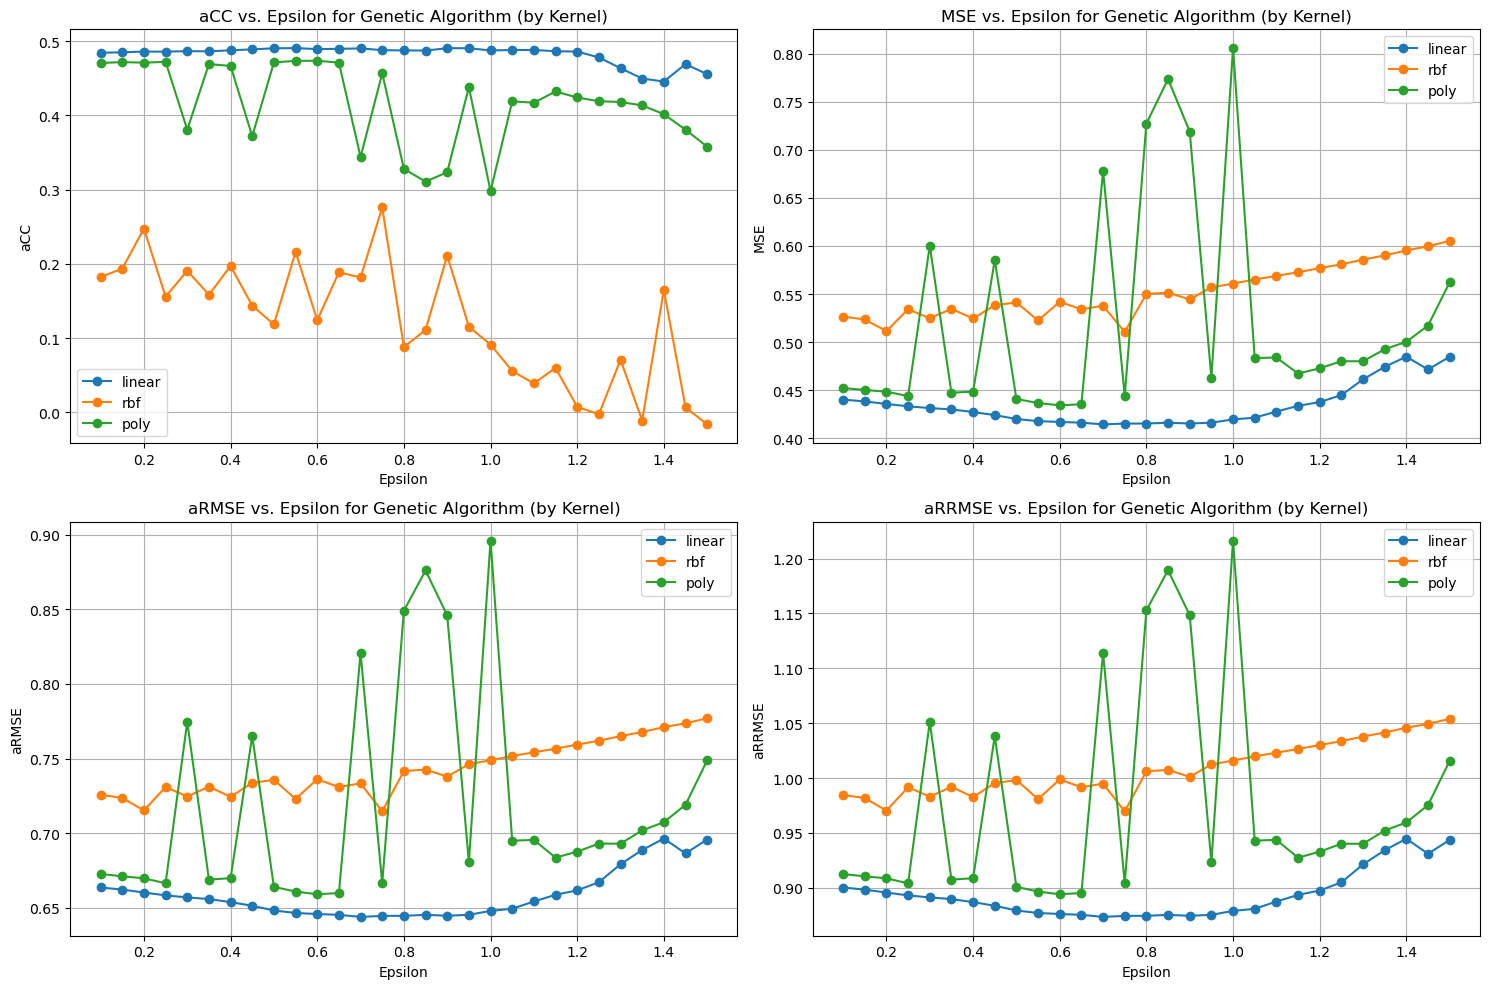

In [21]:
import matplotlib.pyplot as plt

# Create the line plots
plt.figure(figsize=(15, 10))

# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)  # 2x2 grid for subplots

    for kernel in final_results_df['Kernel'].unique():
        # Filter data for each kernel and Genetic tuning only
        subset = final_results_df[(final_results_df['Kernel'] == kernel) & (final_results_df['Tuning'] == 'Genetic')]

        if not subset.empty:
            # Plot results per kernel for Genetic tuning
            plt.plot(subset['epsilon'], subset[metric], label=f"{kernel}", marker='o')

    plt.xlabel("Epsilon")
    plt.ylabel(metric)
    plt.title(f"{metric} vs. Epsilon for Genetic Algorithm (by Kernel)")
    plt.legend()
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

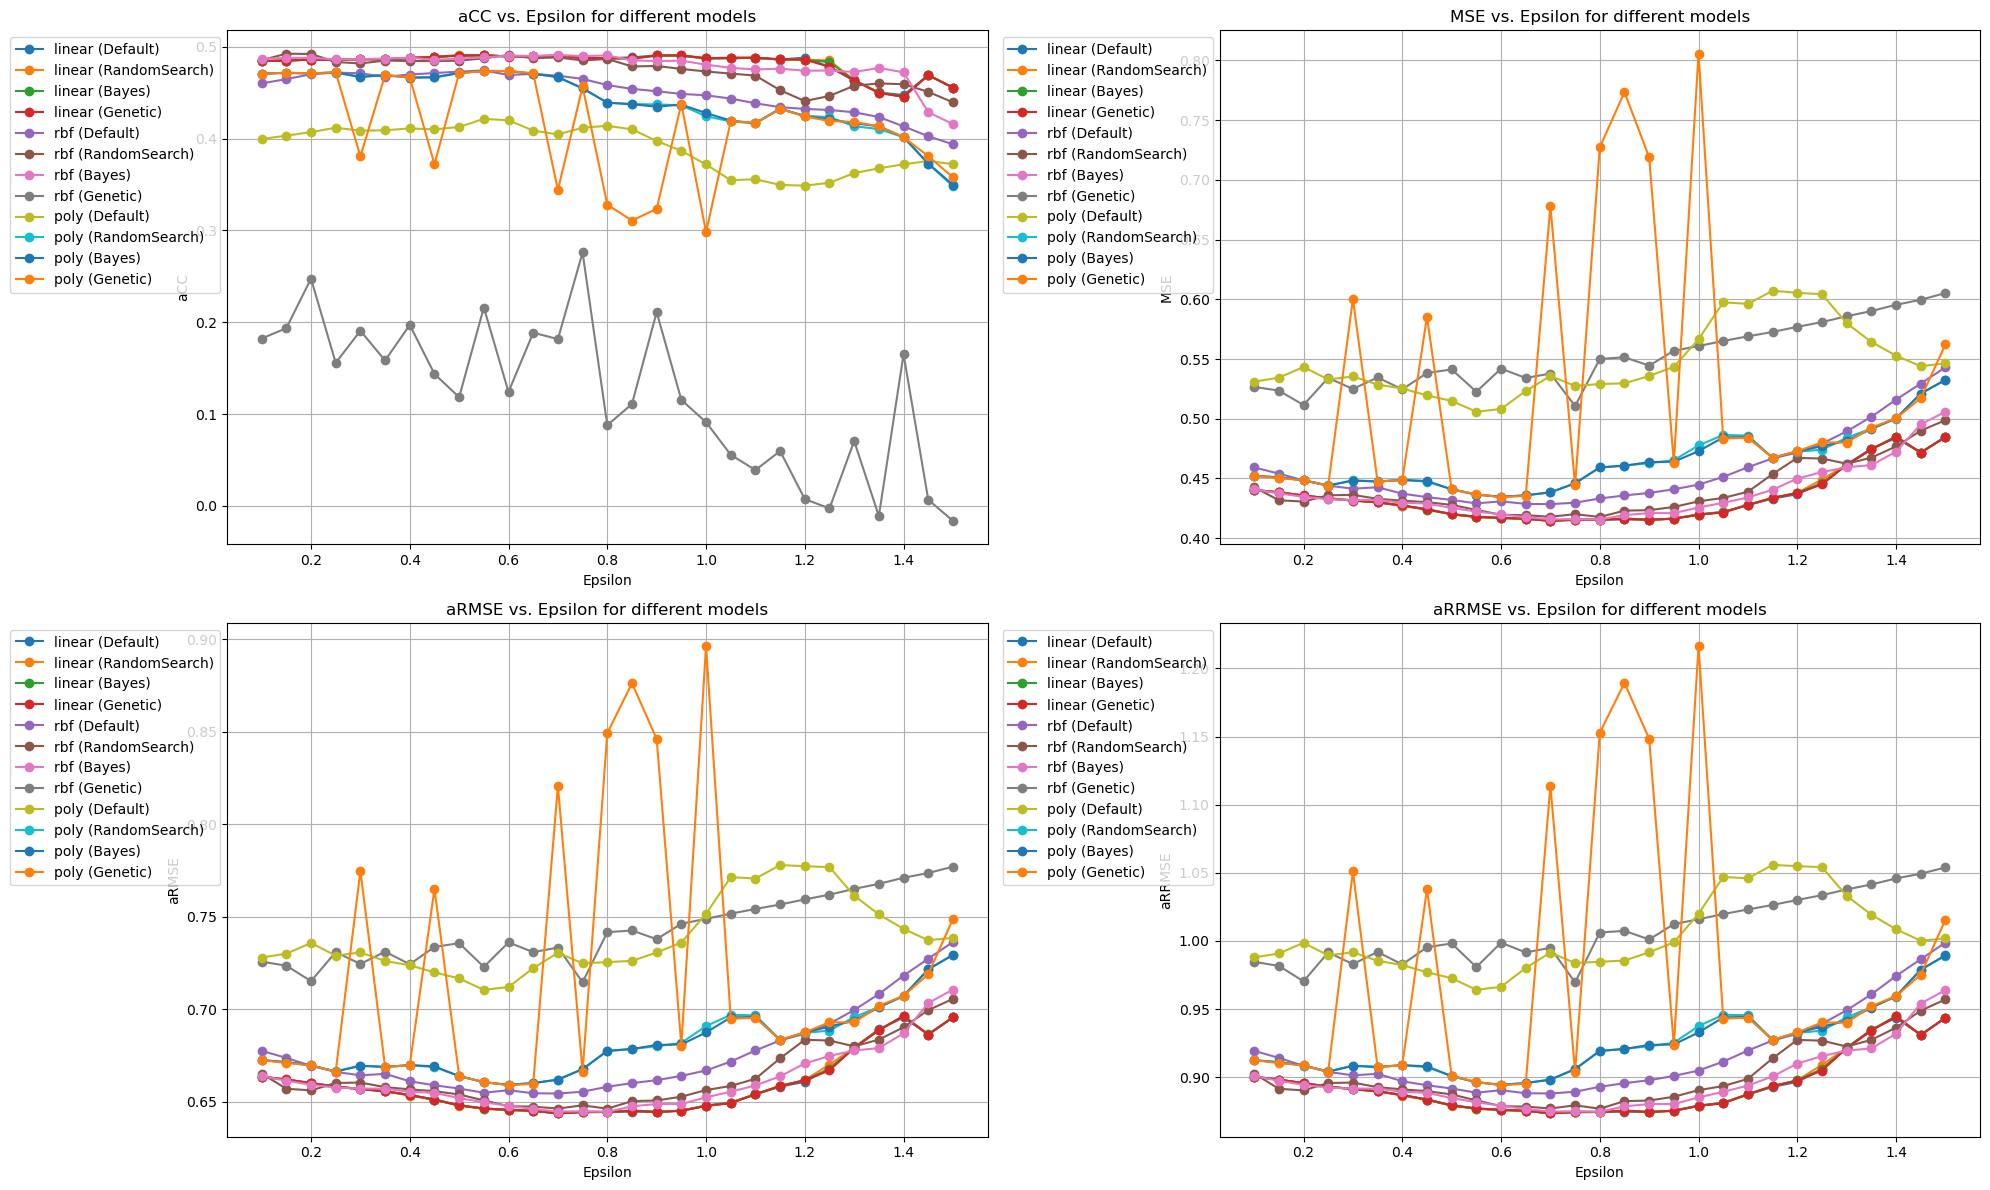

In [22]:
import matplotlib.pyplot as plt

# Create the line plots
plt.figure(figsize=(20, 12))

# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']

# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)  # Adjust number of rows and columns as needed

    for kernel in final_results_df['Kernel'].unique():
        for tuning in tuning_methods:
          # Filter data for the current metric, tuning, and kernel
          subset = final_results_df[(final_results_df['Kernel'] == kernel) & (final_results_df['Tuning'] == tuning)]

          if not subset.empty:
              plt.plot(subset['epsilon'], subset[metric], label=f"{kernel} ({tuning})", marker='o')

    plt.xlabel("Epsilon")
    plt.ylabel(metric)
    plt.title(f"{metric} vs. Epsilon for different models")
    plt.legend(bbox_to_anchor=(0, 1))
    plt.grid(True)
plt.tight_layout()
plt.show()

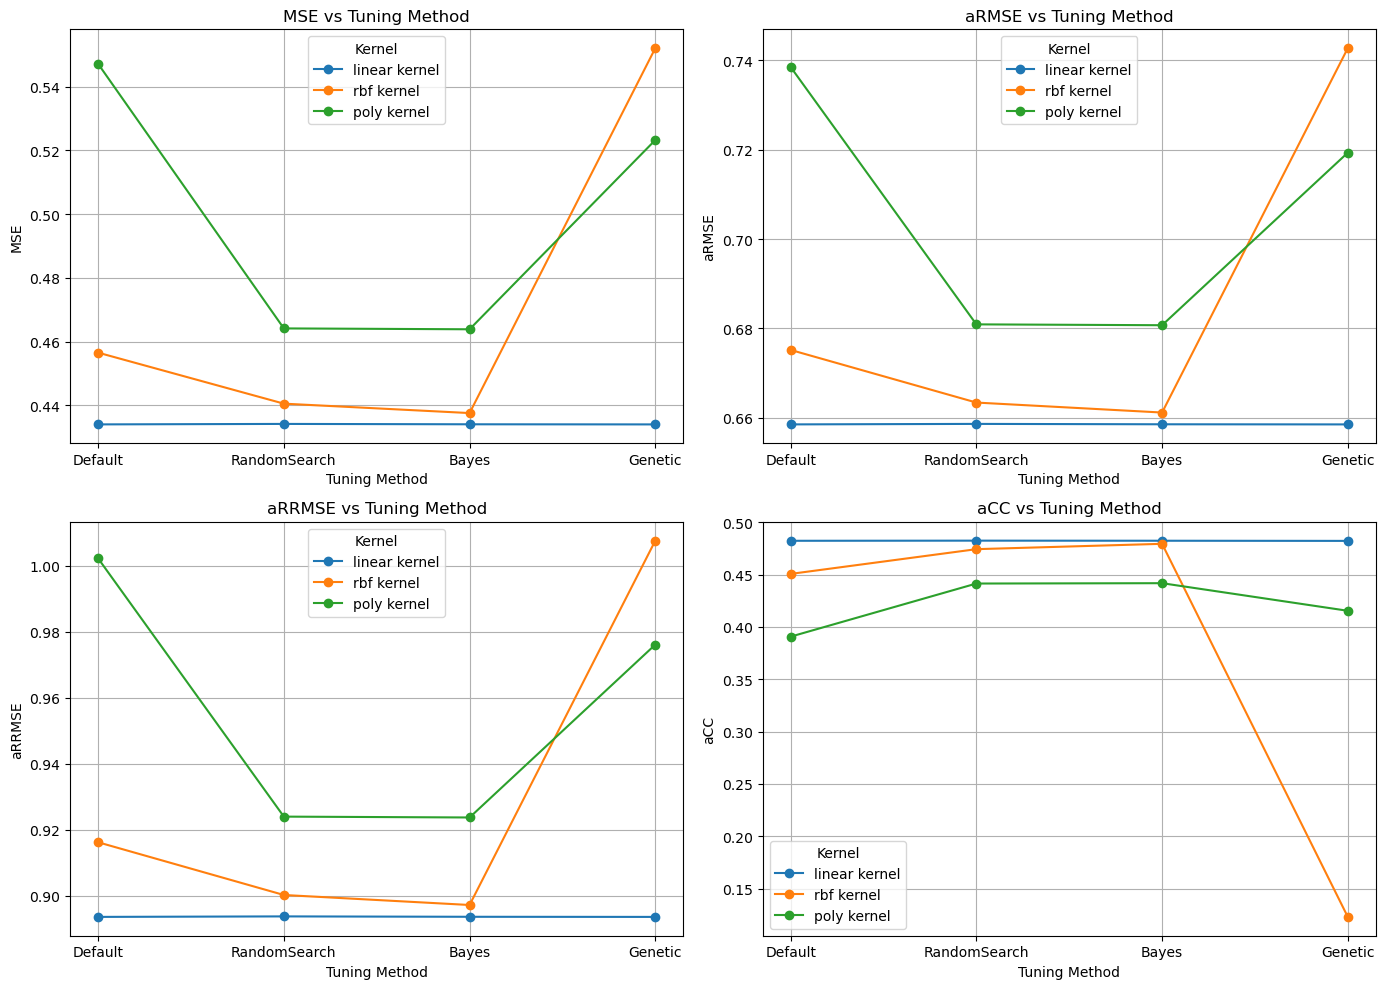

In [23]:
import matplotlib.pyplot as plt

# Metrics to plot
metrics = ['MSE', 'aRMSE', 'aRRMSE', 'aCC']

# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']

# Create the figure and subplots
plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)  # Create 2x2 grid for subplots

    # Loop through each kernel
    for kernel in final_results_df['Kernel'].unique():
        subset = final_results_df[final_results_df['Kernel'] == kernel]

        # Calculate mean value for the current metric and tuning method
        metric_means = [
            subset[subset['Tuning'] == method][metric].mean() if method in subset['Tuning'].values else None
            for method in tuning_methods
        ]

        # Plot the line for the current kernel
        plt.plot(
            tuning_methods, metric_means, label=f"{kernel} kernel", marker='o'
        )

    # Subplot customization
    plt.title(f"{metric} vs Tuning Method")
    plt.xlabel("Tuning Method")
    plt.ylabel(metric)
    plt.legend(title="Kernel")
    plt.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


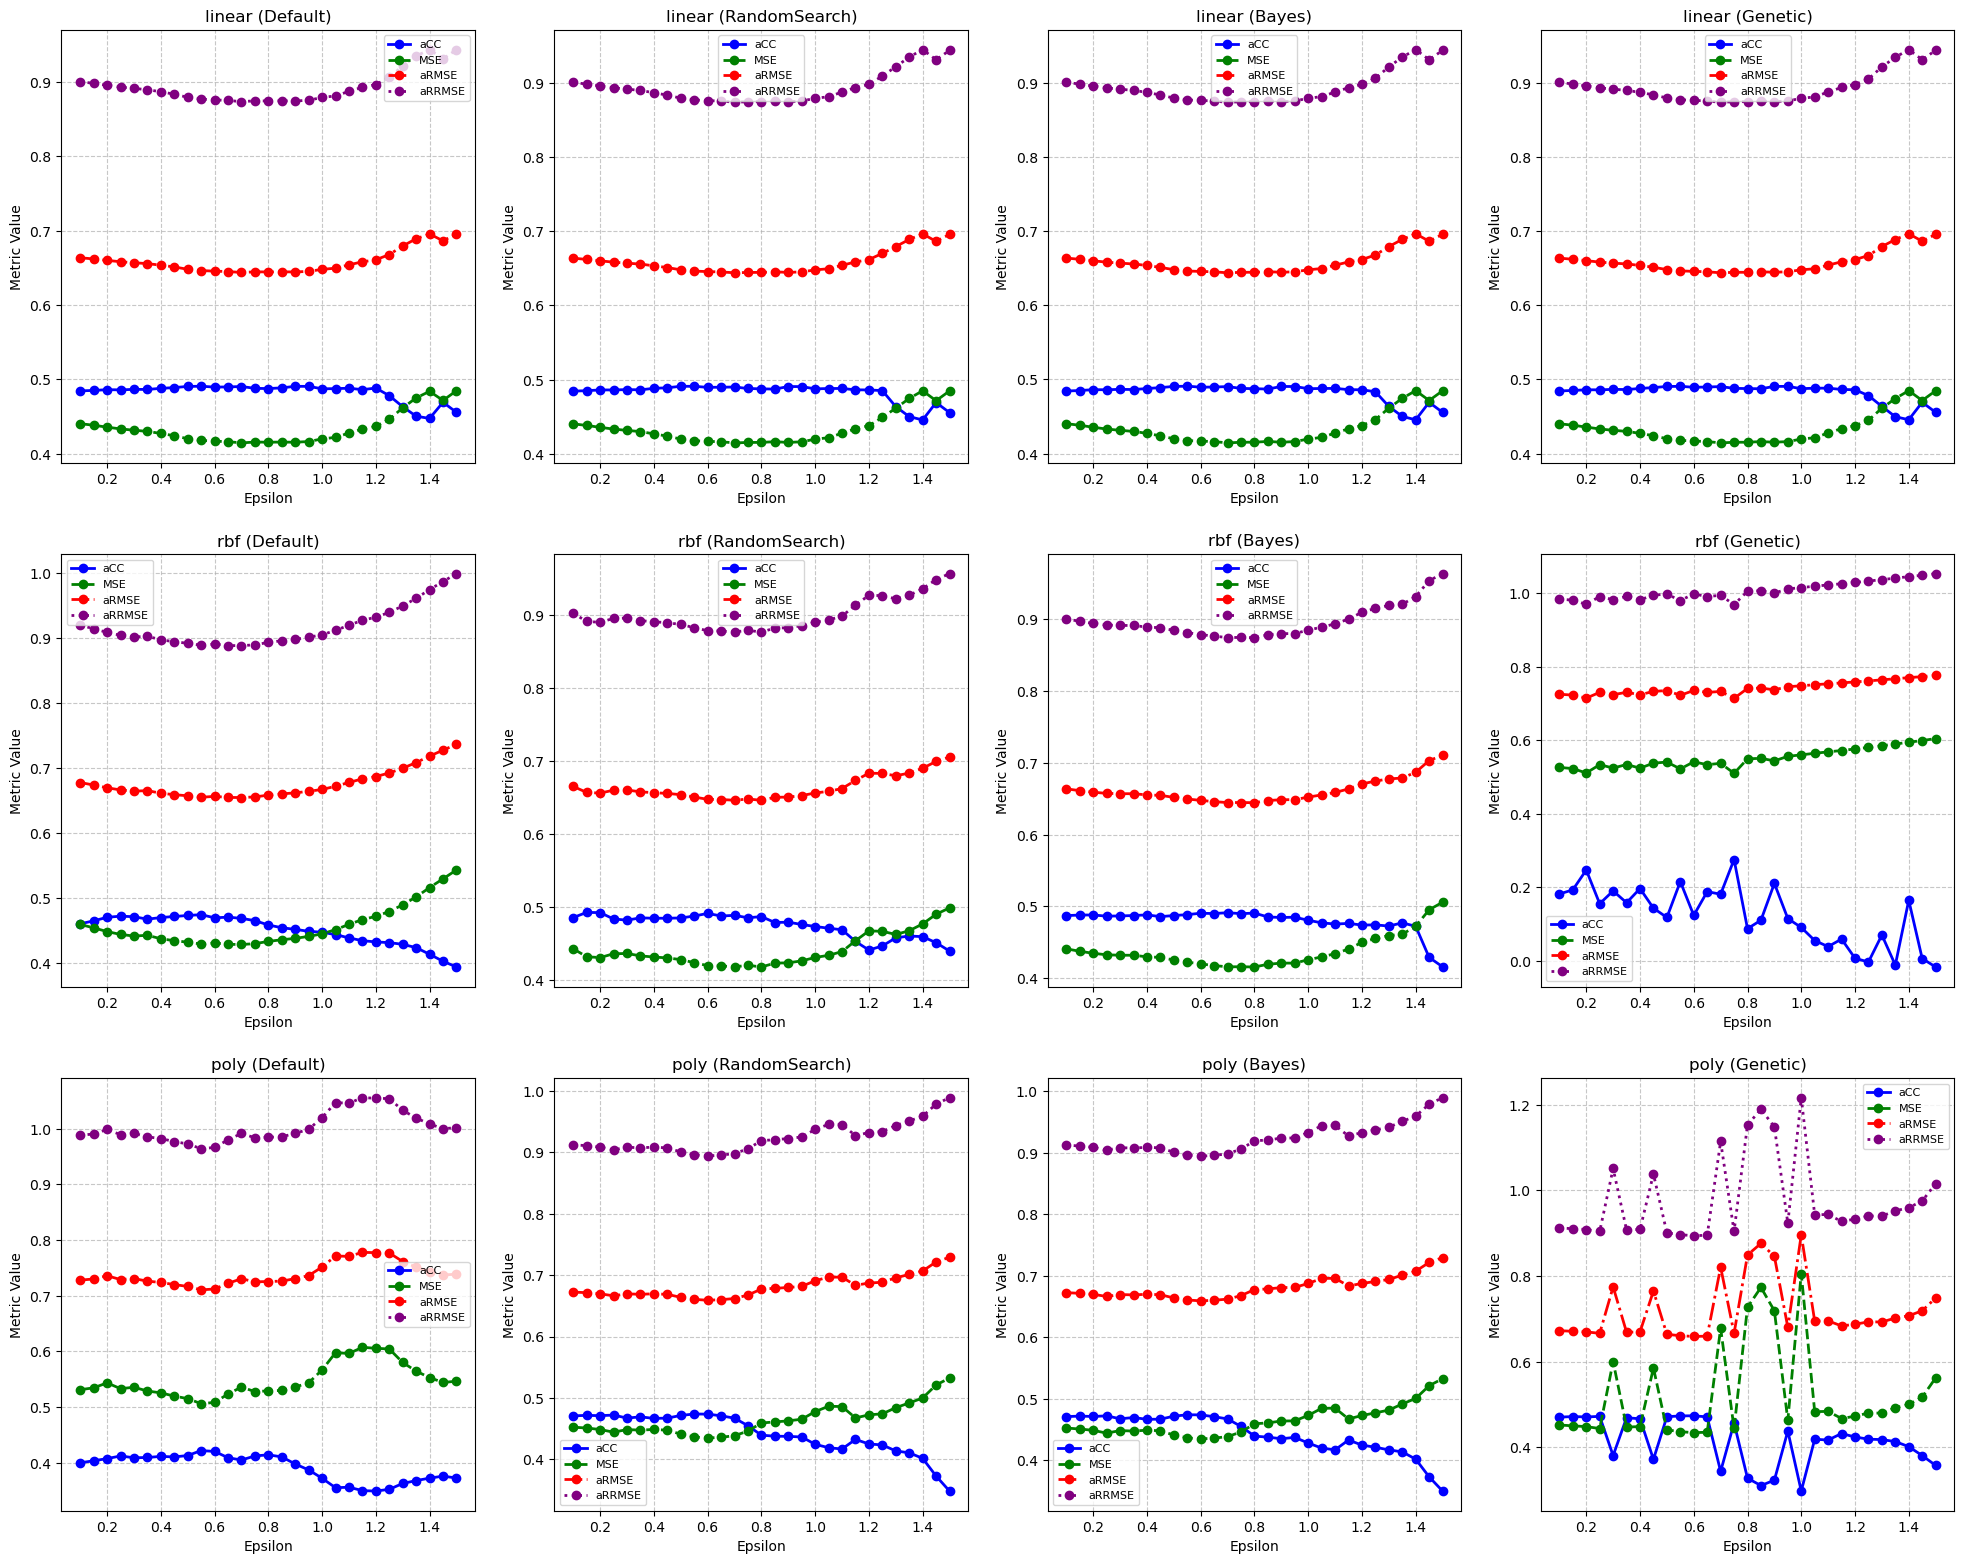

In [24]:
import matplotlib.pyplot as plt

# Create the line plots with increased figure size for 16 subplots
plt.figure(figsize=(20, 16))

# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']

# Tuning methods to compare with adjusted labels for legend
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']

# Define a color palette for better visual distinction
colors = ['blue', 'green', 'red', 'purple']

# Get unique kernels and tuning methods for subplot arrangement
kernels = final_results_df['Kernel'].unique()
num_kernels = len(kernels)
num_tuning_methods = len(tuning_methods)

# Loop through each kernel and tuning method to create subplots
for i, kernel in enumerate(kernels):
    for j, tuning in enumerate(tuning_methods):
        # Calculate subplot index
        subplot_index = i * num_tuning_methods + j + 1

        # Create subplot
        plt.subplot(num_kernels, num_tuning_methods, subplot_index)

        # Filter data for the current kernel and tuning method
        subset = final_results_df[(final_results_df['Kernel'] == kernel) & (final_results_df['Tuning'] == tuning.split()[0])]

        # Loop through each metric and plot on the current subplot
        for k, metric in enumerate(metrics):
            if not subset.empty:
                plt.plot(subset['epsilon'], subset[metric], label=metric,
                         marker='o', linestyle=['-', '--', '-.', ':'][k], color=colors[k], linewidth=2)

        # Customize subplot with clearer labels and formatting
        plt.xlabel("Epsilon", fontsize=10)
        plt.ylabel("Metric Value", fontsize=10)
        plt.title(f"{kernel} ({tuning})", fontsize=12)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)  # Lighter grid

# Adjust layout and display
plt.tight_layout(pad=2.0)
plt.show()

In [25]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [26]:
final_results_df.to_excel("DONE.xlsx", index=False)

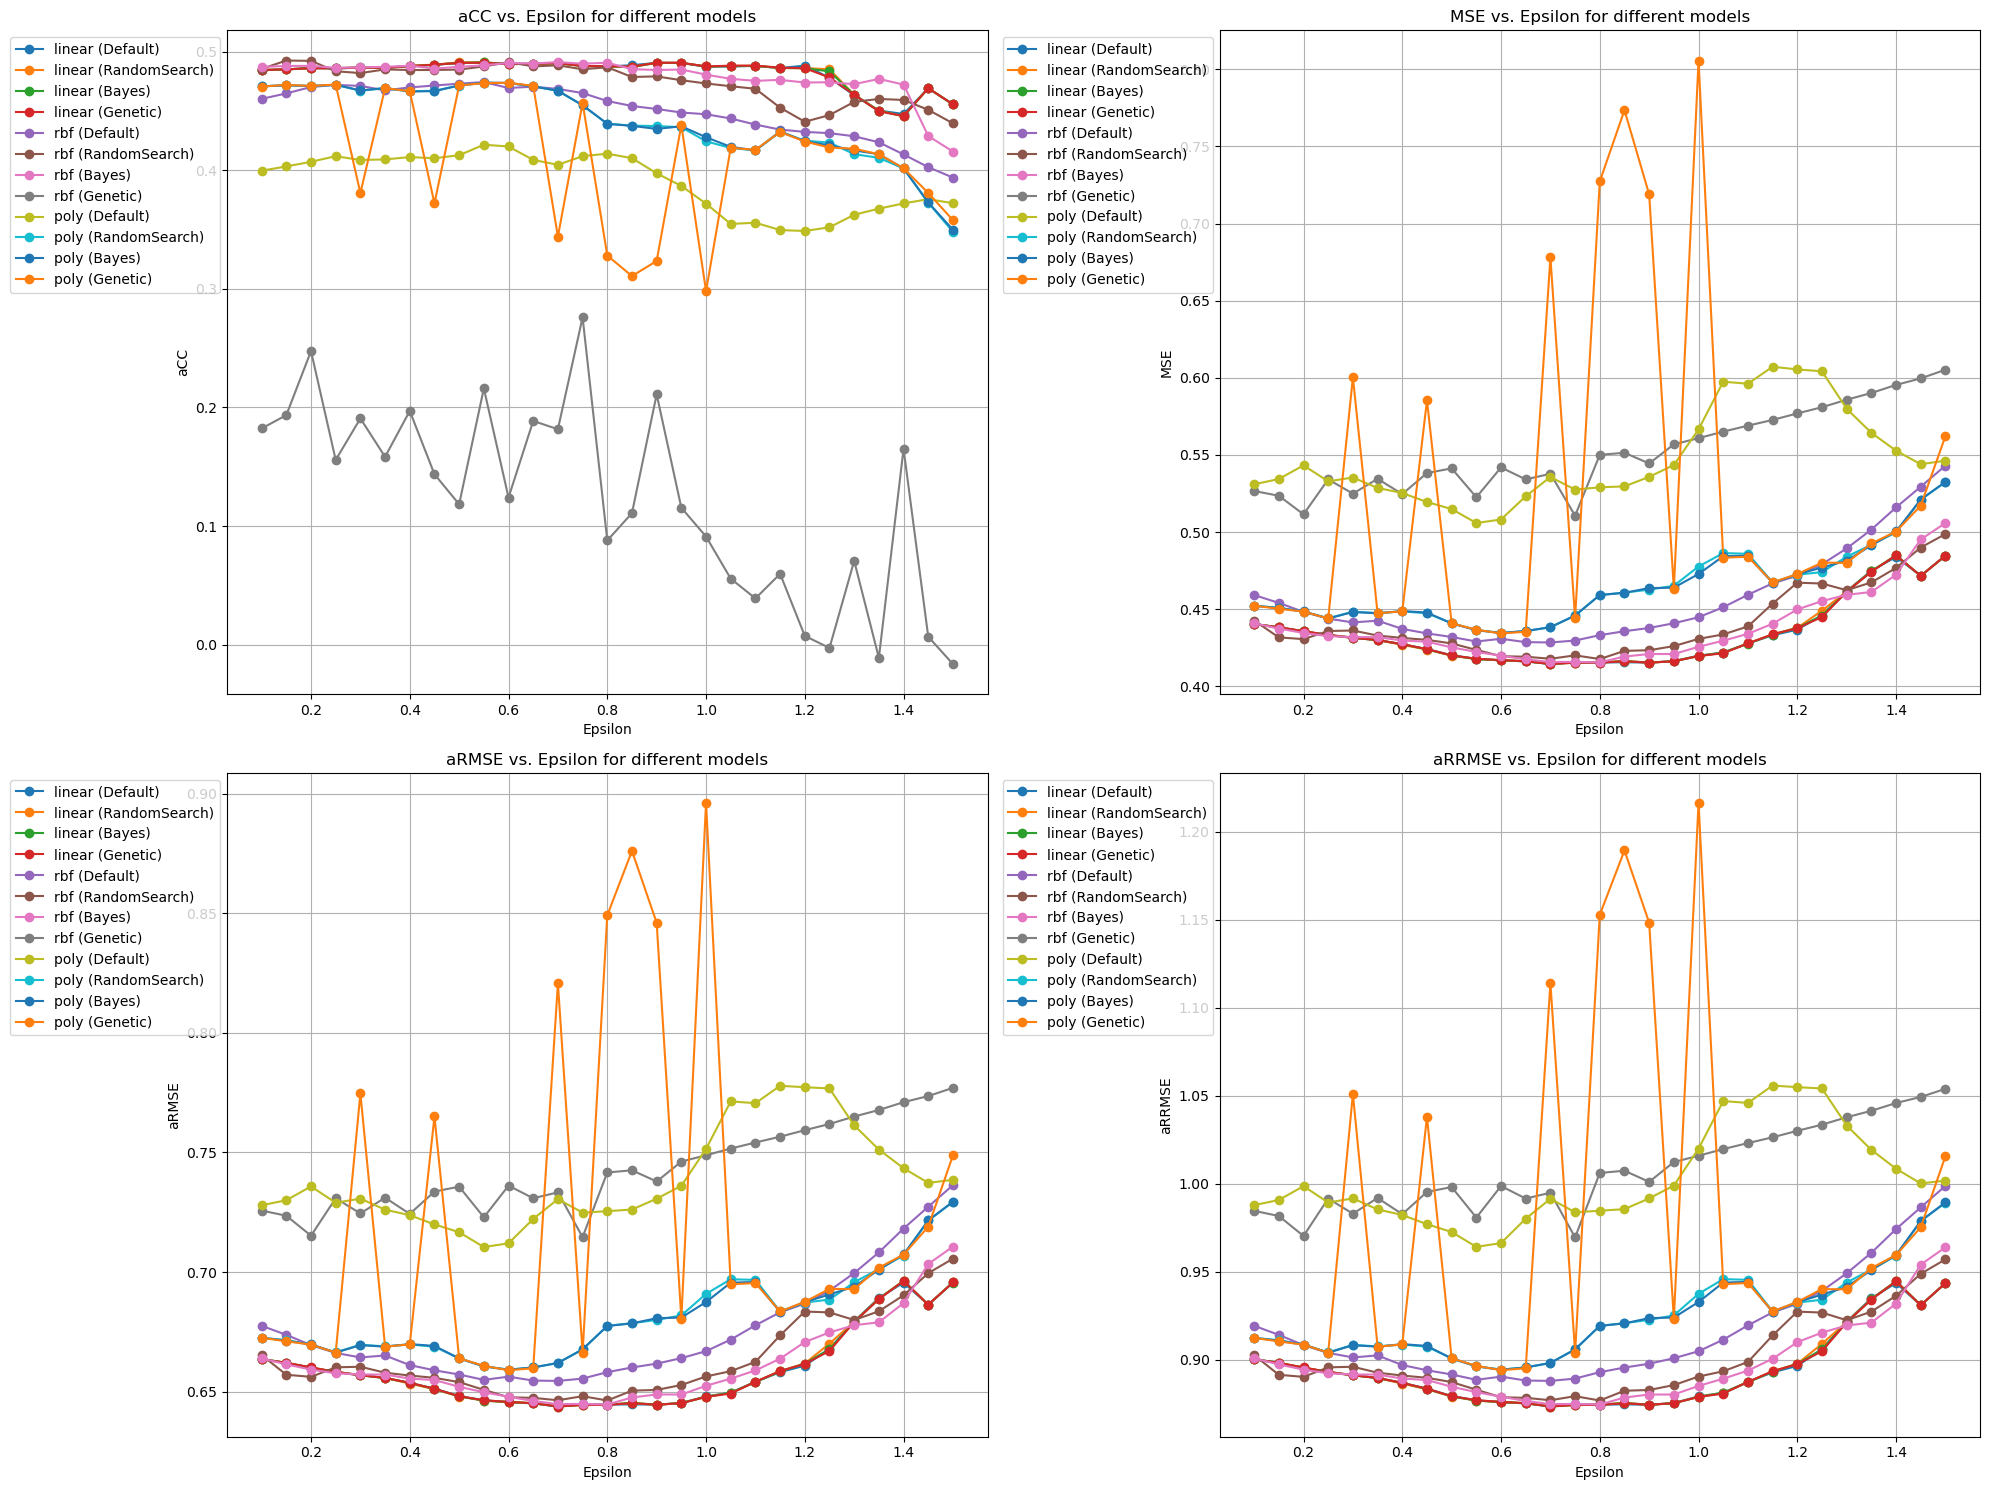

In [57]:
import matplotlib.pyplot as plt

# Create the line plots
plt.figure(figsize=(20, 15))
# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']
# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    for kernel in final_results_df['Kernel'].unique():
        for tuning in tuning_methods:
            # Filter data for the current metric, tuning, kernel, and epsilon <= 0.5
            subset = final_results_df[
                (final_results_df['Kernel'] == kernel) &
                (final_results_df['Tuning'] == tuning) &
                (final_results_df['epsilon'] <= 1.6)
            ]
            if not subset.empty:
                plt.plot(subset['epsilon'], subset[metric], label=f"{kernel} ({tuning})", marker='o')
    plt.xlabel("Epsilon")
    plt.ylabel(metric)
    plt.title(f"{metric} vs. Epsilon for different models")
    plt.legend(bbox_to_anchor=(0, 1))
    plt.grid(True)

plt.tight_layout()
plt.show()

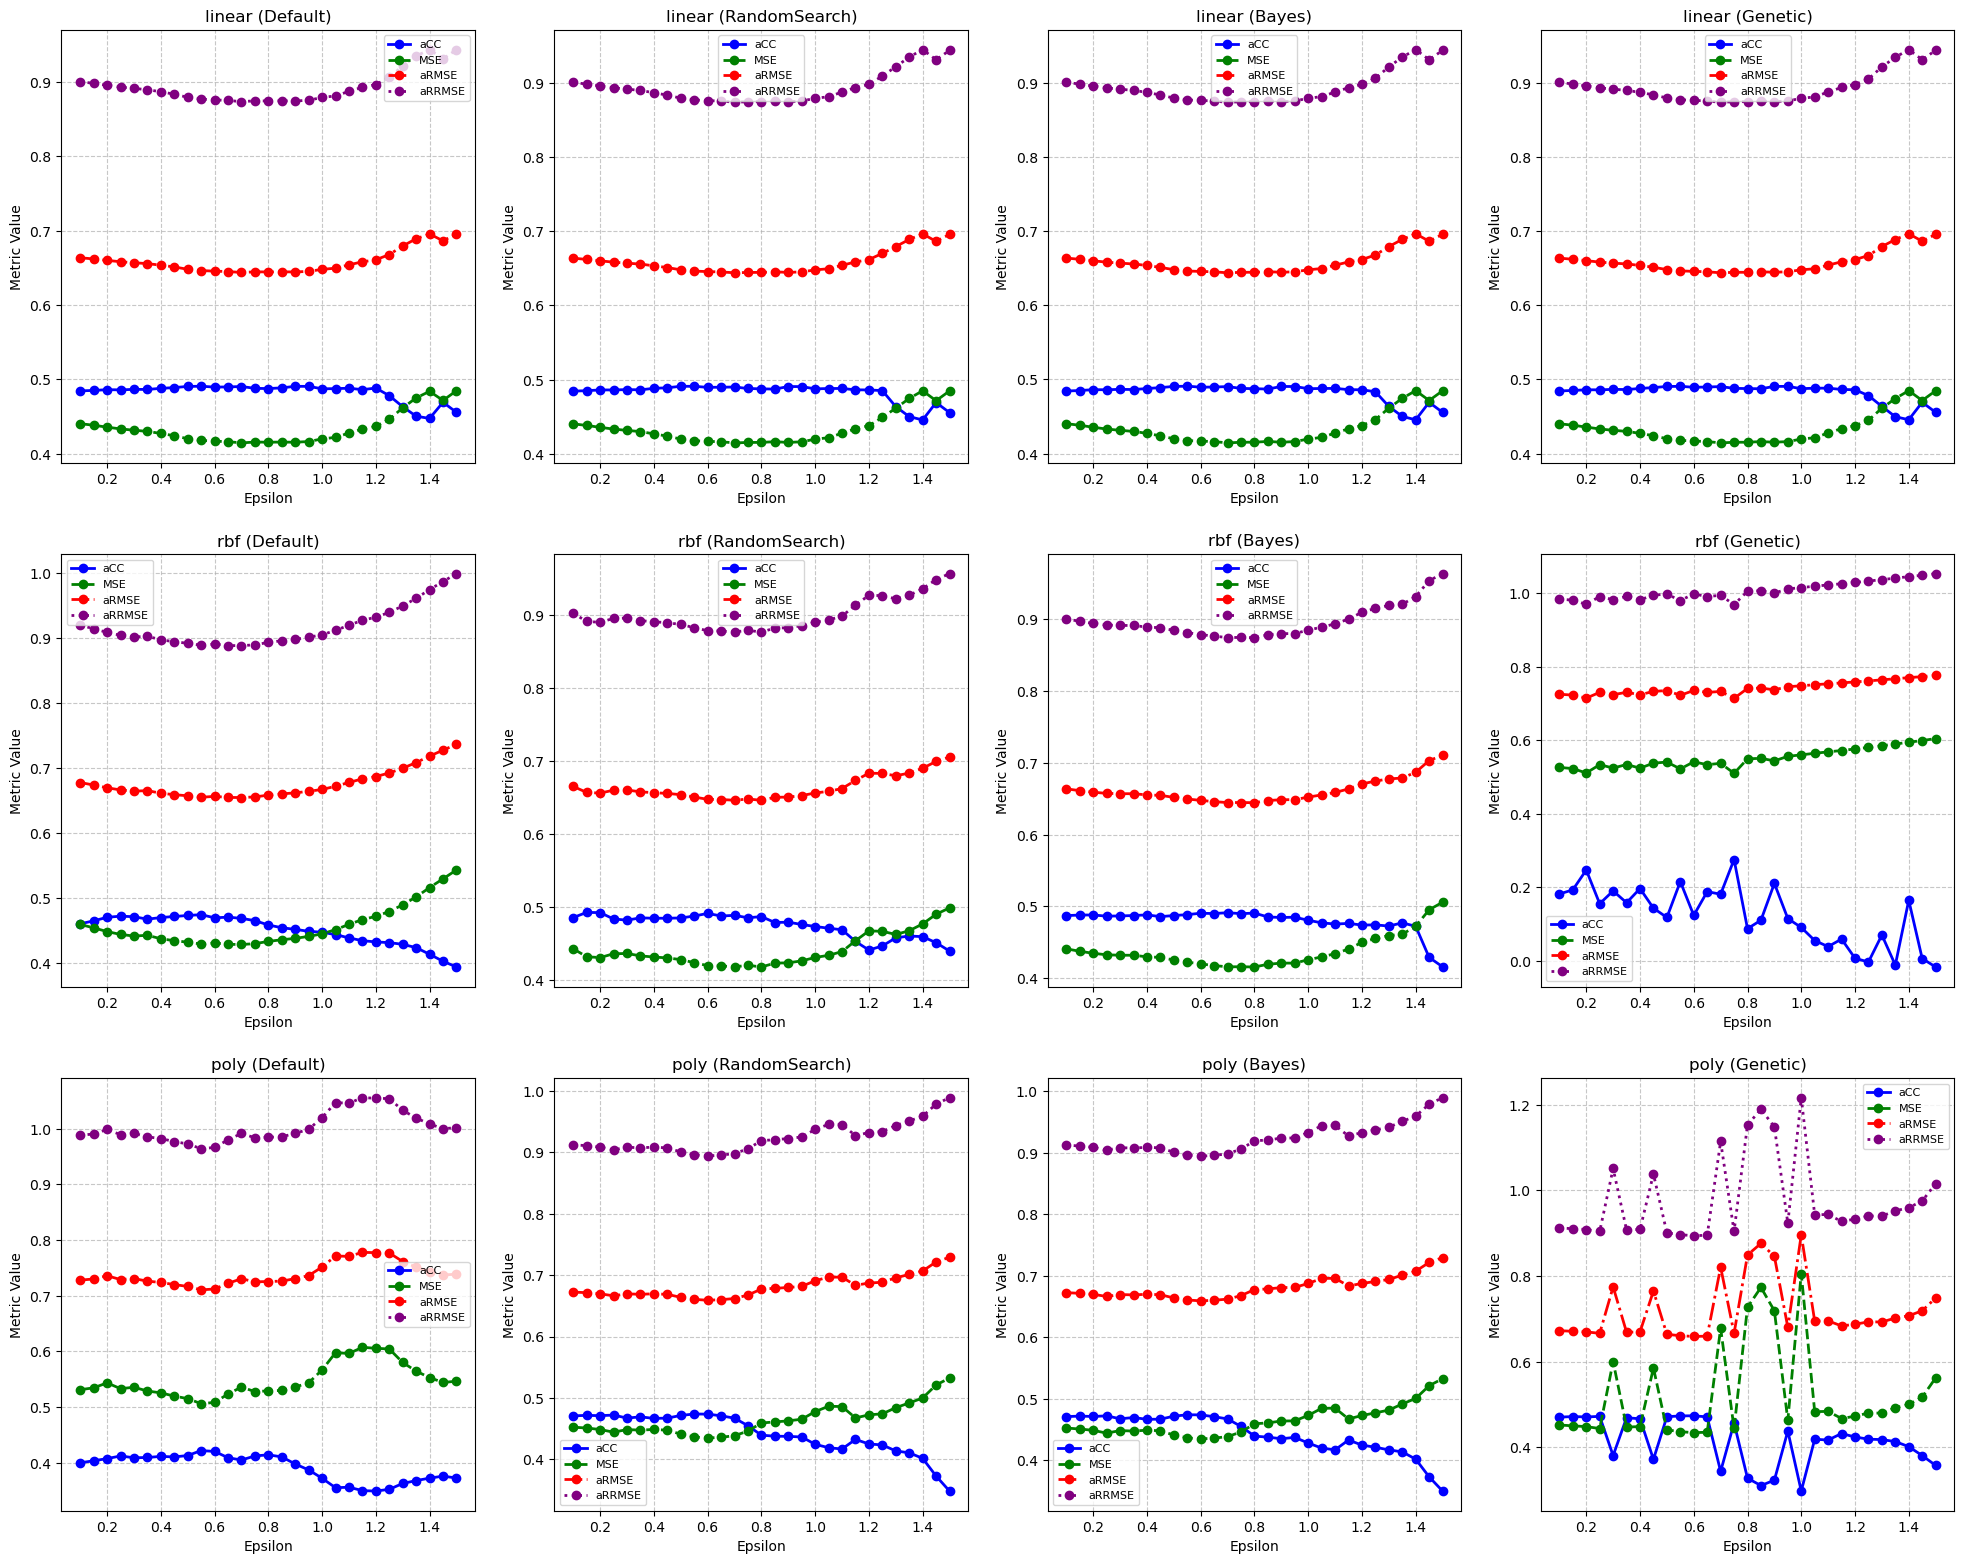

In [56]:
import matplotlib.pyplot as plt
# Create the line plots with increased figure size for 16 subplots
plt.figure(figsize=(20, 16))
# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']
# Tuning methods to compare with adjusted labels for legend
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']
# Define a color palette for better visual distinction
colors = ['blue', 'green', 'red', 'purple']
# Get unique kernels and tuning methods for subplot arrangement
kernels = final_results_df['Kernel'].unique()
num_kernels = len(kernels)
num_tuning_methods = len(tuning_methods)

# Loop through each kernel and tuning method to create subplots
for i, kernel in enumerate(kernels):
    for j, tuning in enumerate(tuning_methods):
        # Calculate subplot index
        subplot_index = i * num_tuning_methods + j + 1
        # Create subplot
        plt.subplot(num_kernels, num_tuning_methods, subplot_index)
        # Filter data for the current kernel, tuning method, and epsilon <= 0.5
        subset = final_results_df[
            (final_results_df['Kernel'] == kernel) &
            (final_results_df['Tuning'] == tuning.split()[0]) &
            (final_results_df['epsilon'] <= 1.6)
        ]
        # Loop through each metric and plot on the current subplot
        for k, metric in enumerate(metrics):
            if not subset.empty:
                plt.plot(subset['epsilon'], subset[metric], label=metric,
                         marker='o', linestyle=['-', '--', '-.', ':'][k], color=colors[k], linewidth=2)
        # Customize subplot with clearer labels and formatting
        plt.xlabel("Epsilon", fontsize=10)
        plt.ylabel("Metric Value", fontsize=10)
        plt.title(f"{kernel} ({tuning})", fontsize=12)
        plt.legend(fontsize=8)
        plt.grid(True, linestyle='--', alpha=0.7)  # Lighter grid

# Adjust layout and display
plt.tight_layout(pad=2.0)
plt.show()

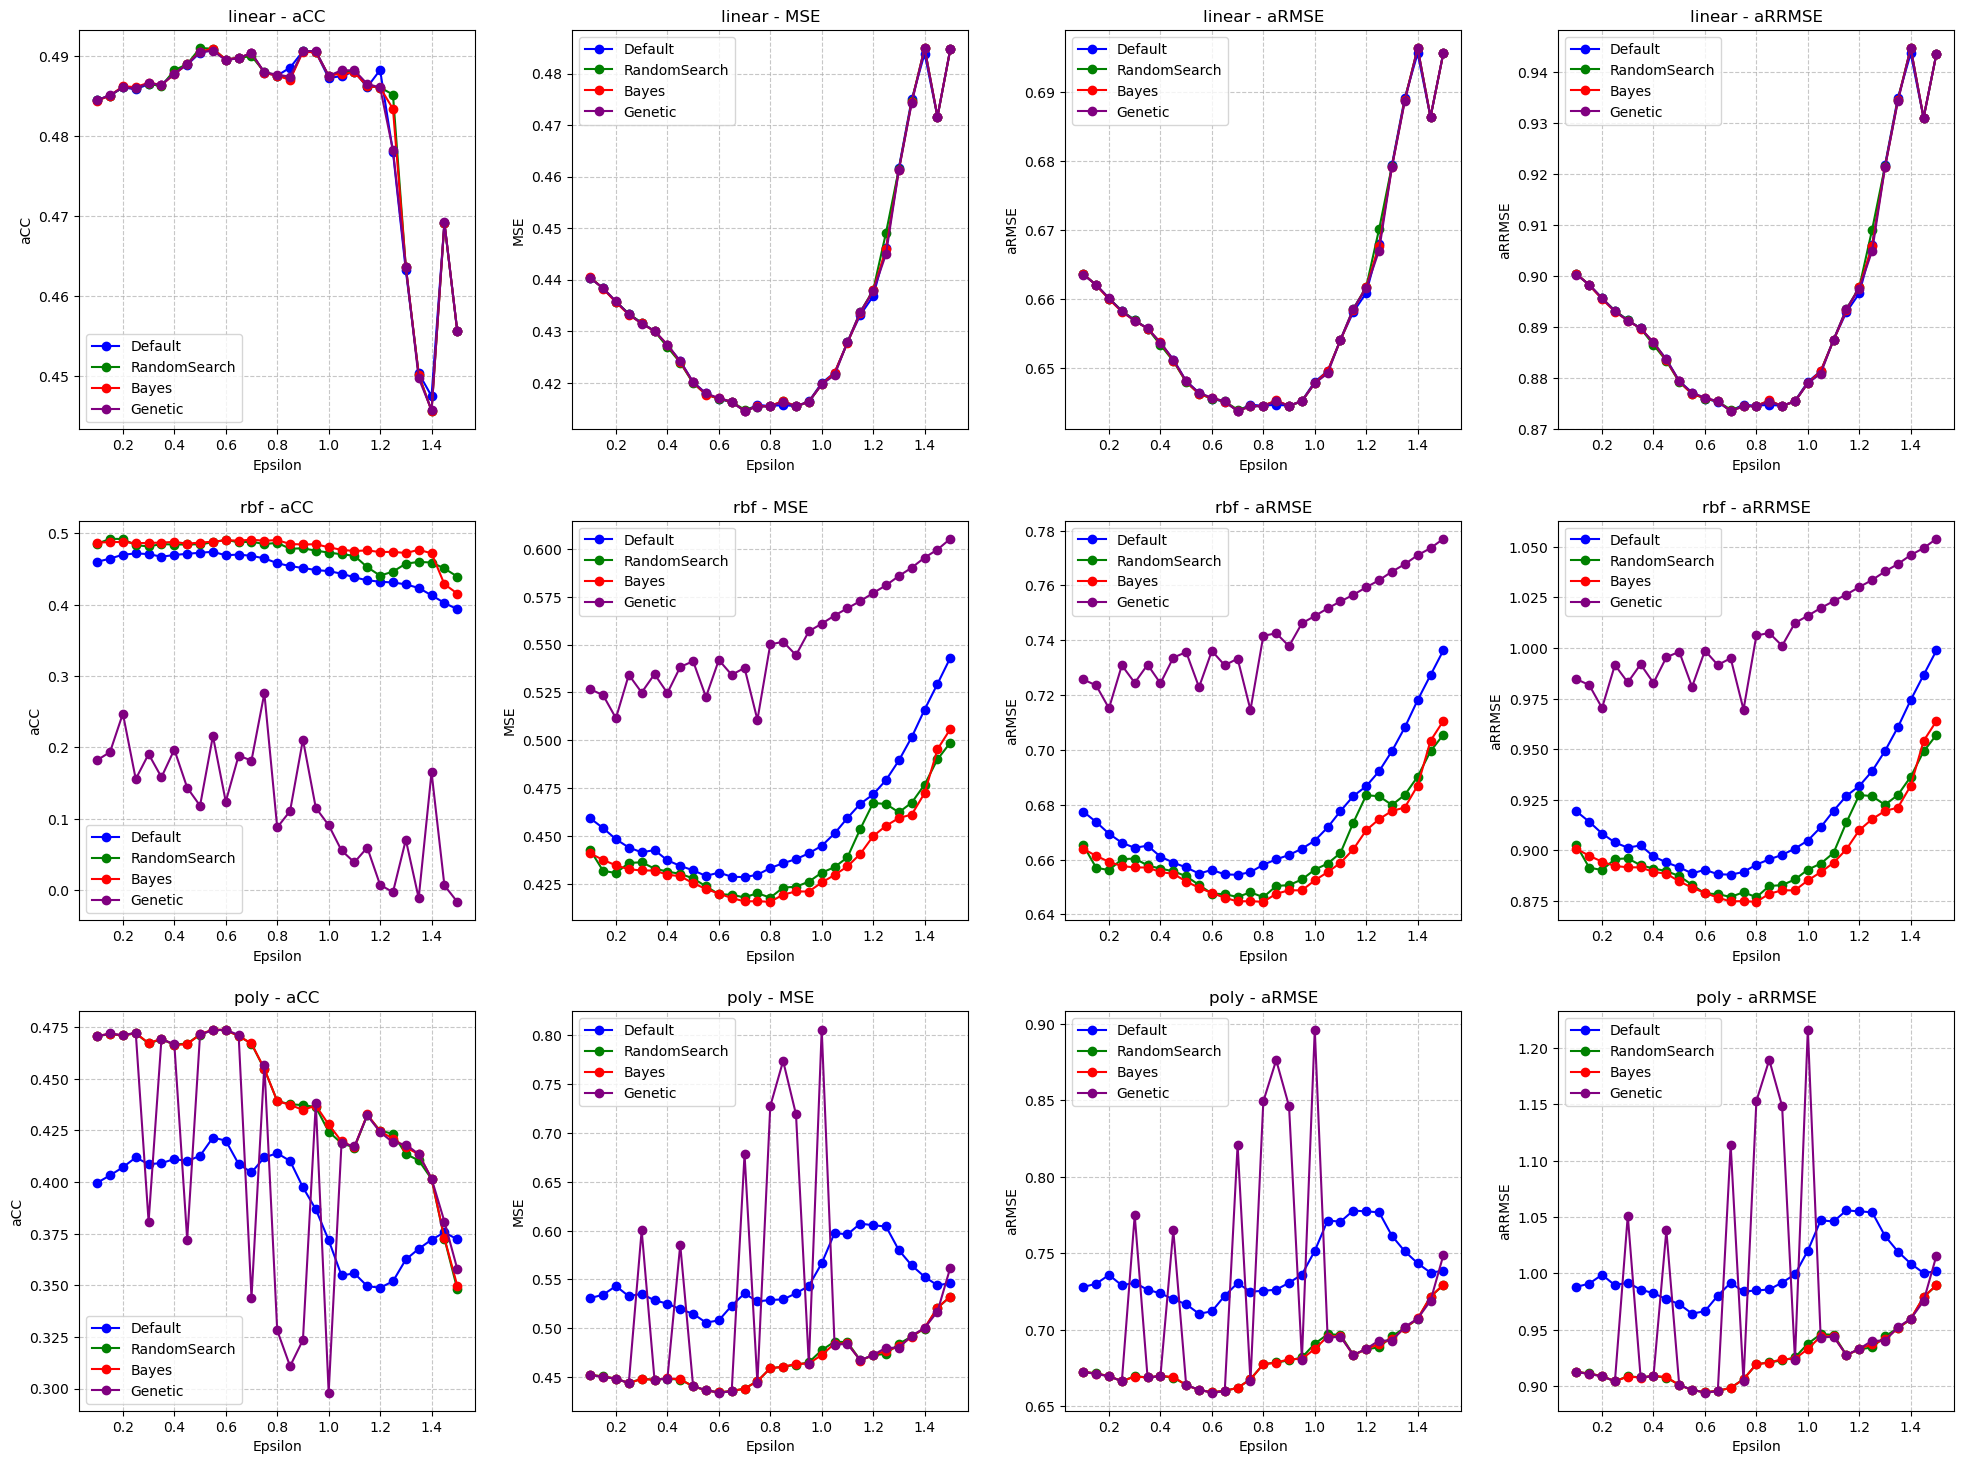

In [36]:
import matplotlib.pyplot as plt
# Create the line plots with adjusted figure size
plt.figure(figsize=(20, 15))
# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']
# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']
# Colors for different tuning methods
colors = ['blue', 'green', 'red', 'purple']

# Loop through each kernel and metric to create subplots
for i, kernel in enumerate(final_results_df['Kernel'].unique()):
    for j, metric in enumerate(metrics):
        # Calculate subplot index
        subplot_index = i * len(metrics) + j + 1
        plt.subplot(3, 4, subplot_index)

        # Plot each tuning method
        for k, tuning in enumerate(tuning_methods):
            subset = final_results_df[
                (final_results_df['Kernel'] == kernel) &
                (final_results_df['Tuning'] == tuning) &
                (final_results_df['epsilon'] <= 1.6)
            ]
            if not subset.empty:
                plt.plot(subset['epsilon'], subset[metric],
                        label=tuning, marker='o', color=colors[k])

        plt.xlabel("Epsilon")
        plt.ylabel(metric)
        plt.title(f"{kernel} - {metric}")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

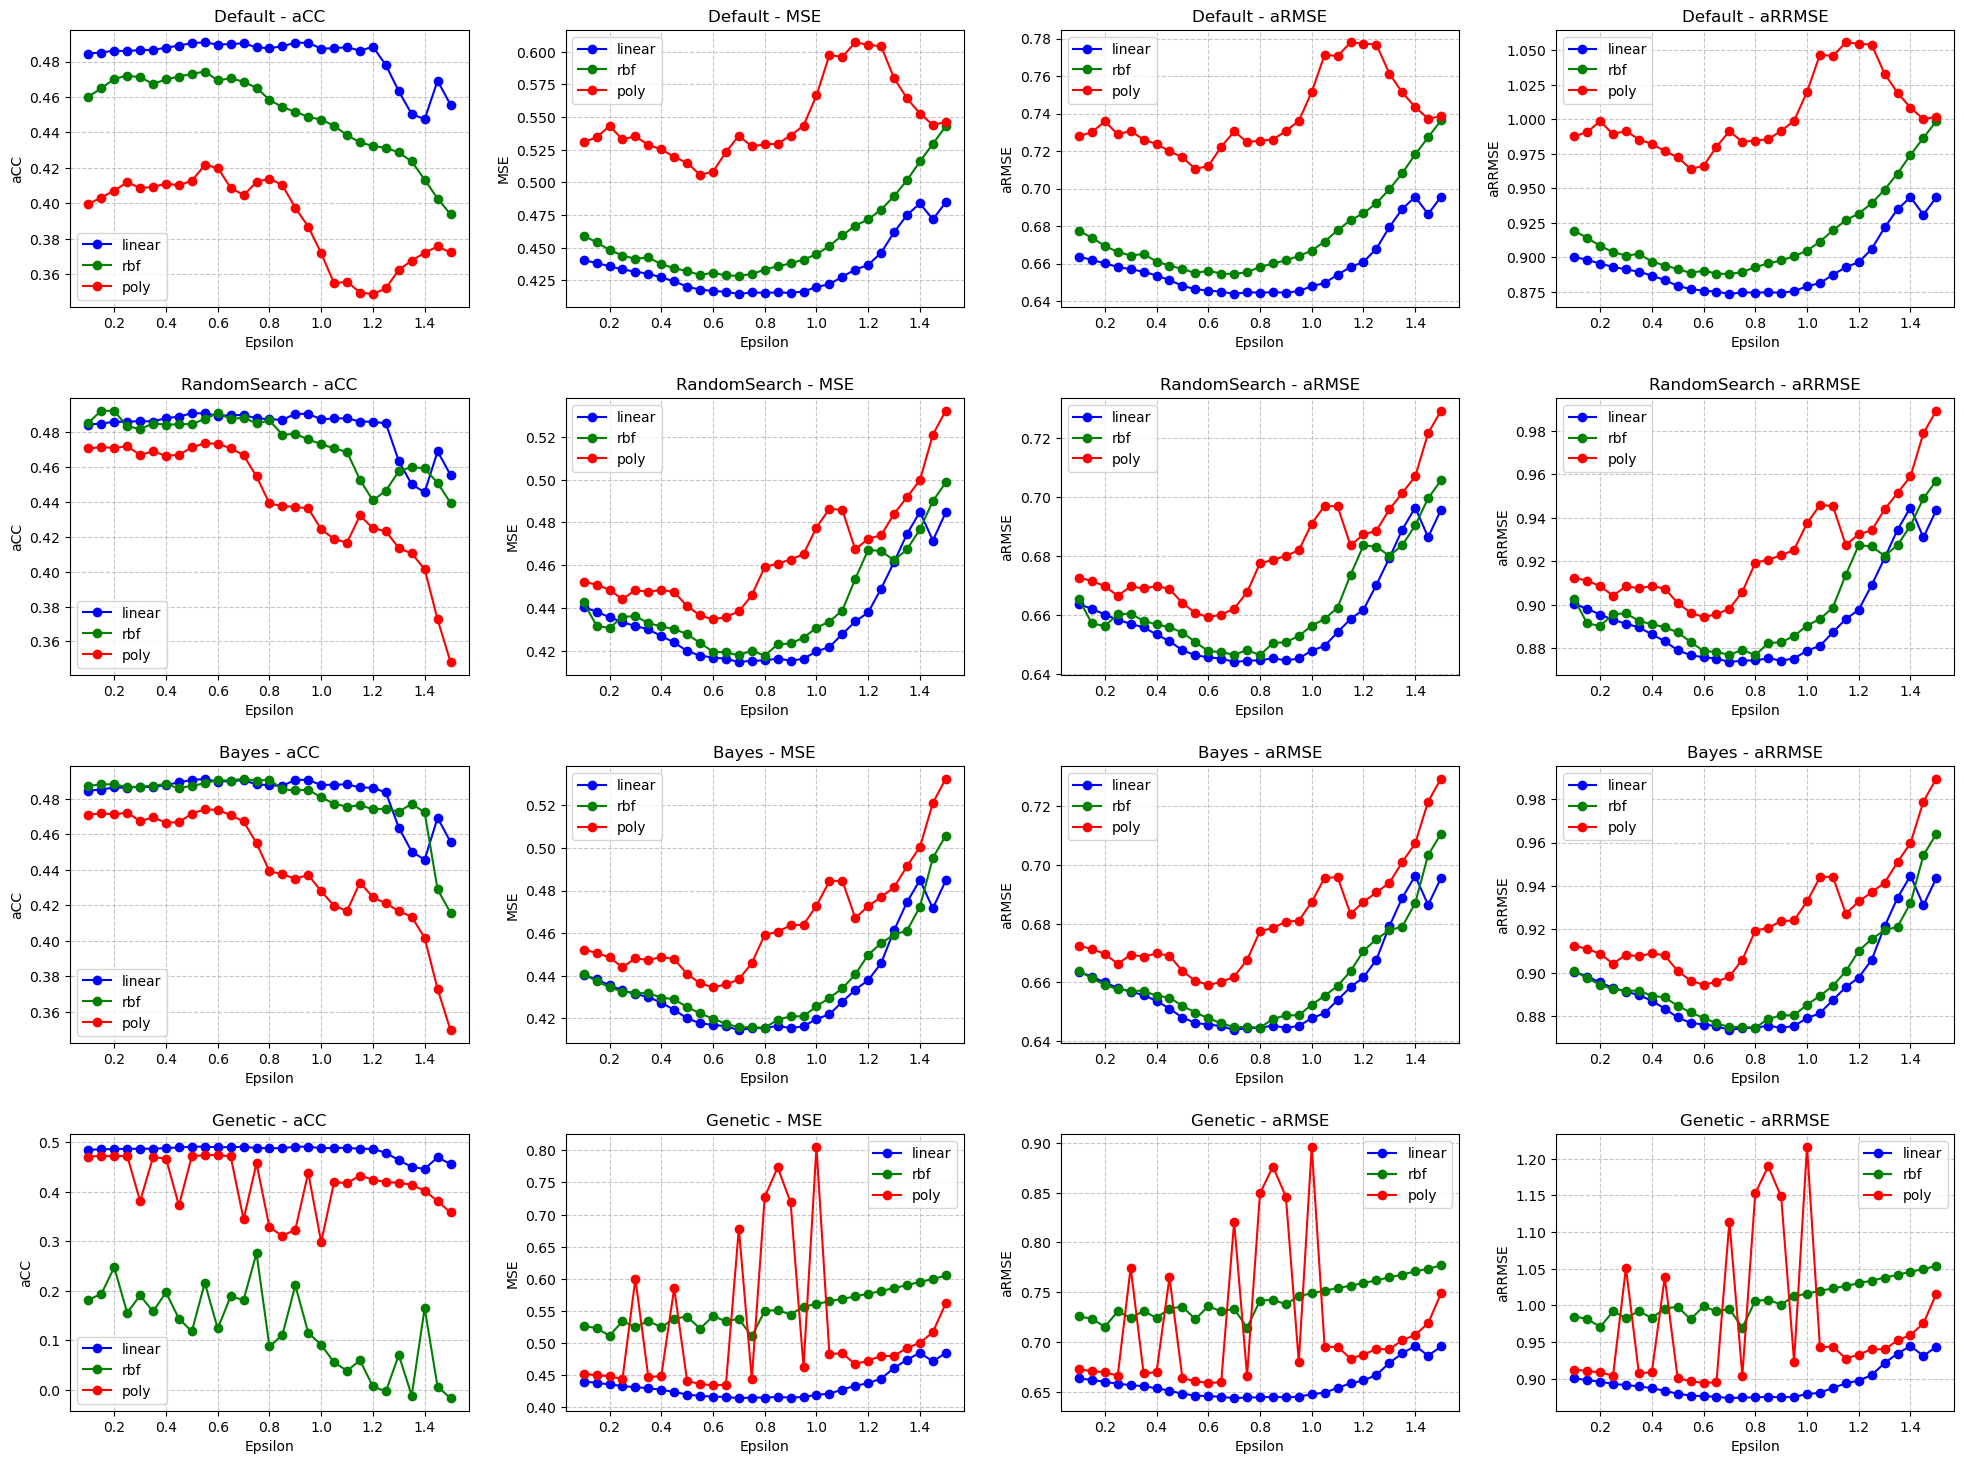

In [37]:
import matplotlib.pyplot as plt
# Create the line plots with adjusted figure size
plt.figure(figsize=(20, 15))
# Metrics to plot
metrics = ['aCC', 'MSE', 'aRMSE', 'aRRMSE']
# Tuning methods to compare
tuning_methods = ['Default', 'RandomSearch', 'Bayes', 'Genetic']
# Colors for different kernels
colors = ['blue', 'green', 'red']

# Loop through each tuning method and metric to create subplots
for i, tuning in enumerate(tuning_methods):
    for j, metric in enumerate(metrics):
        # Calculate subplot index
        subplot_index = i * len(metrics) + j + 1
        plt.subplot(4, 4, subplot_index)

        # Plot each kernel
        for k, kernel in enumerate(final_results_df['Kernel'].unique()):
            subset = final_results_df[
                (final_results_df['Kernel'] == kernel) &
                (final_results_df['Tuning'] == tuning) &
                (final_results_df['epsilon'] <= 1.6)
            ]
            if not subset.empty:
                plt.plot(subset['epsilon'], subset[metric],
                        label=kernel, marker='o', color=colors[k])

        plt.xlabel("Epsilon")
        plt.ylabel(metric)
        plt.title(f"{tuning} - {metric}")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(pad=2.0)
plt.show()

# Uji Asumsi Residual IIDN

In [31]:
# Training model dengan parameter terbaik
best_params = {'epsilon': 0.1, 'C': 105.7621, 'gamma': 0.016355}
model = RegressorChain(SVR(kernel='rbf', cache_size=1000, **best_params),
                       order=[Y_train.columns.get_loc(c) for c in Y_train.columns])

# Fit model ke data training
model.fit(X_train, Y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Buat dataframe untuk y_actual, y_pred, dan residuals
residu_df = pd.DataFrame({
    f"y_actual_{col}": Y_test.iloc[:, i] for i, col in enumerate(Y_test.columns)
})

# Tambahkan y_pred
for i, col in enumerate(Y_test.columns):
    residu_df[f"y_pred_{col}"] = y_pred[:, i]

# Tambahkan residuals (y_actual - y_pred)
for i, col in enumerate(Y_test.columns):
    residu_df[f"residual_{col}"] = residu_df[f"y_actual_{col}"] - residu_df[f"y_pred_{col}"]

# Output dataframe
residu_df.head()

y_actual_SGOT  y_actual_SGPT  y_pred_SGOT  y_pred_SGPT  residual_SGOT  \
3801      -0.149060      -0.594043    -0.071214    -0.256917      -0.077846   
2913      -1.009021      -0.983611    -0.736078    -0.419475      -0.272942   
1910       0.562897       0.173117    -0.028703    -0.244920       0.591600   
357       -0.566995      -0.308818    -0.447009    -0.282802      -0.119986   
3416       0.156536       0.435255    -0.211195    -0.147769       0.367730   

      residual_SGPT  
3801      -0.337126  
2913      -0.564136  
1910       0.418036  
357       -0.026016  
3416       0.583023

In [32]:
residu_df.describe()

y_actual_SGOT  y_actual_SGPT  y_pred_SGOT  y_pred_SGPT  residual_SGOT  \
count     601.000000     601.000000   601.000000   601.000000     601.000000   
mean        0.151345       0.127977     0.028497     0.019012       0.122848   
std         0.742067       0.733270     0.549779     0.499010       0.675193   
min        -1.617199      -1.385833    -1.183738    -1.729881      -1.510163   
25%        -0.396884      -0.462433    -0.364607    -0.294763      -0.358397   
50%         0.080938       0.052375    -0.024009    -0.011647      -0.001465   
75%         0.613101       0.630971     0.364474     0.332352       0.540757   
max         2.480451       2.041856     2.553226     2.754341       2.880795   

       residual_SGPT  
count     601.000000  
mean        0.108964  
std         0.709470  
min        -1.836863  
25%        -0.370291  
50%         0.033251  
75%         0.531505  
max         2.291164

In [33]:
# Fungsi mapping gender
def map_gender(row):
    if row['Gender_M'] == 1:
        return 'Male'
    elif row['Gender_F'] == 1:
        return 'Female'
    else:
        return 'Unknown'  # Kasus kombinasi gak valid

# Mapping ke Gender
residu_df['Gender'] = X_test.apply(map_gender, axis=1)

# Cek hasil mapping
print(residu_df[['Gender']].head(10))
print(residu_df['Gender'].value_counts())

      Gender
3801  Female
2913  Female
1910  Female
357     Male
3416  Female
2859  Female
1913  Female
2235  Female
575   Female
3256  Female
Female    393
Male      208
Name: Gender, dtype: int64


In [34]:
# Debug hasil merge
residu_df.head(10)


y_actual_SGOT  y_actual_SGPT  y_pred_SGOT  y_pred_SGPT  residual_SGOT  \
3801      -0.149060      -0.594043    -0.071214    -0.256917      -0.077846   
2913      -1.009021      -0.983611    -0.736078    -0.419475      -0.272942   
1910       0.562897       0.173117    -0.028703    -0.244920       0.591600   
357       -0.566995      -0.308818    -0.447009    -0.282802      -0.119986   
3416       0.156536       0.435255    -0.211195    -0.147769       0.367730   
2859       0.106695      -0.055062    -0.622498    -0.679059       0.729193   
1913      -0.028301      -0.308818     0.722619     0.786419      -0.750920   
2235      -0.613783      -0.799135    -0.457512    -0.560676      -0.156271   
575       -0.087091      -0.308818    -0.402056    -0.302026       0.314965   
3256      -0.613783      -0.594043    -0.366638    -0.432507      -0.247145   

      residual_SGPT  Gender  
3801      -0.337126  Female  
2913      -0.564136  Female  
1910       0.418036  Female  
357       -0.026016    Male  
3416       0.583023  Female  
2859       0.623997  Female  
1913      -1.095237  Female  
2235      -0.238458  Female  
575       -0.006792  Female  
3256      -0.161536  Female

In [49]:
import pandas as pd

# Nilai mean dan standar deviasi dari Age sebelum standardisasi
age_mean = 53.918755  # Contoh nilai mean Age
age_std = 15.567347   # Contoh nilai standar deviasi Age

# Balikkan Age ke bentuk aslinya
X_test['Age_original'] = np.round((X_test['Age'] * age_std) + age_mean)

# Gabungkan dengan residual_df berdasarkan index
residu_df['Age_original'] = X_test['Age_original']

# Contoh group data seperti sebelumnya (misal Gender)
# residual_df['Group'] = residual_df.apply(lambda row: f"{row['Gender']}_{row['Age_original']}", axis=1)

# Cek hasil merge
residu_df.head(10)


y_actual_SGOT  y_actual_SGPT  y_pred_SGOT  y_pred_SGPT  residual_SGOT  \
3801      -0.149060      -0.594043    -0.071214    -0.256917      -0.077846   
2913      -1.009021      -0.983611    -0.736078    -0.419475      -0.272942   
1910       0.562897       0.173117    -0.028703    -0.244920       0.591600   
357       -0.566995      -0.308818    -0.447009    -0.282802      -0.119986   
3416       0.156536       0.435255    -0.211195    -0.147769       0.367730   
2859       0.106695      -0.055062    -0.622498    -0.679059       0.729193   
1913      -0.028301      -0.308818     0.722619     0.786419      -0.750920   
2235      -0.613783      -0.799135    -0.457512    -0.560676      -0.156271   
575       -0.087091      -0.308818    -0.402056    -0.302026       0.314965   
3256      -0.613783      -0.594043    -0.366638    -0.432507      -0.247145   

      residual_SGPT  Gender  Age_original     Age_group  
3801      -0.337126  Female          69.0         66-75  
2913      -0.564136  Female          50.0         46-55  
1910       0.418036  Female          71.0         66-75  
357       -0.026016    Male          51.0         46-55  
3416       0.583023  Female          46.0  Out of range  
2859       0.623997  Female          47.0         46-55  
1913      -1.095237  Female          37.0         36-45  
2235      -0.238458  Female          66.0  Out of range  
575       -0.006792  Female          46.0  Out of range  
3256      -0.161536  Female          52.0         46-55

In [50]:
# Fungsi untuk mengelompokkan umur ke dalam rentang grup
def age_to_group(age):
    if 18 <= age <= 25:
        return "18-25"
    elif 26 <= age <= 35:
        return "26-35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    elif 56 <= age <= 65:
        return "56-65"
    elif 66 <= age <= 75:
        return "66-75"
    elif 76 <= age <= 91:
        return "76-91"
    else:
        return "Out of range"

# Contoh data
# Misalnya 'residu_df' adalah DataFrame asli
residu_df["Age_group"] = residu_df["Age_original"].apply(age_to_group)
residu_df

y_actual_SGOT  y_actual_SGPT  y_pred_SGOT  y_pred_SGPT  residual_SGOT  \
3801      -0.149060      -0.594043    -0.071214    -0.256917      -0.077846   
2913      -1.009021      -0.983611    -0.736078    -0.419475      -0.272942   
1910       0.562897       0.173117    -0.028703    -0.244920       0.591600   
357       -0.566995      -0.308818    -0.447009    -0.282802      -0.119986   
3416       0.156536       0.435255    -0.211195    -0.147769       0.367730   
...             ...            ...          ...          ...            ...   
1428       0.377632       0.281640    -0.082679    -0.312506       0.460311   
833       -0.320445      -0.799135     0.318117    -0.073425      -0.638562   
2449       0.474003       1.004868    -0.297726    -0.241152       0.771730   
2582       0.545661       1.004868    -0.301227    -0.113787       0.846888   
888        0.528162       0.195717     0.964388     0.833373      -0.436225   

      residual_SGPT  Gender  Age_original Age_group  
3801      -0.337126  Female          69.0     66-75  
2913      -0.564136  Female          50.0     46-55  
1910       0.418036  Female          71.0     66-75  
357       -0.026016    Male          51.0     46-55  
3416       0.583023  Female          46.0     46-55  
...             ...     ...           ...       ...  
1428       0.594146  Female          65.0     56-65  
833       -0.725710  Female          64.0     56-65  
2449       1.246020  Female          27.0     26-35  
2582       1.118656    Male          61.0     56-65  
888       -0.637656    Male          69.0     66-75  

[601 rows x 9 columns]

## Uji Asumsi Residual Identik

In [53]:
from scipy.stats import chi2
from numpy.linalg import slogdet
import numpy as np

def box_m_test(residuals, groups):
    # Pastikan input berbentuk array
    groups = np.array(groups)
    residuals = np.array(residuals)

    # Grup unik dan jumlah grup
    unique_groups = np.unique(groups)
    valid_group_covariances = []
    valid_group_sizes = []

    # Hitung covariance matrix untuk tiap grup
    for group in unique_groups:
        group_data = residuals[groups == group]

        # Pengecekan: Grup harus punya lebih dari 1 data
        if len(group_data) > 1:
            cov_matrix = np.cov(group_data, rowvar=False)

            # Pastikan covariance matrix valid (tidak scalar)
            if cov_matrix.ndim == 2 and cov_matrix.shape[0] == cov_matrix.shape[1]:
                valid_group_covariances.append(cov_matrix)
                valid_group_sizes.append(len(group_data))
        else:
            print(f"Grup {group} di-skip karena ukuran < 2 atau tidak cukup data.")

    # Update jumlah grup valid
    k = len(valid_group_covariances)
    if k < 2:
        raise ValueError("Jumlah grup valid kurang dari 2. Tidak bisa melanjutkan uji Box's M.")

    p = residuals.shape[1]  # Jumlah residual (variabel target)

    # Hitung pooled covariance matrix
    pooled_covariance = sum(
        valid_group_sizes[i] * valid_group_covariances[i] for i in range(k)
    ) / sum(valid_group_sizes)

    # Pastikan pooled_covariance valid
    if pooled_covariance.ndim != 2 or pooled_covariance.shape[0] != pooled_covariance.shape[1]:
        raise ValueError("Pooled covariance matrix tidak valid. Periksa data residual.")

    # Hitung statistik Box's M
    ln_m = sum(
        valid_group_sizes[i] * (slogdet(valid_group_covariances[i])[1] - slogdet(pooled_covariance)[1])
        for i in range(k)
    )
    c1 = (
        (2 * p**2 + 3 * p - 1) / (6 * (p + 1) * (k - 1))
        * (sum(1 / (valid_group_sizes[i] - 1) for i in range(k)) - 1 / sum(valid_group_sizes))
    )
    u = -2 * (1 - c1) * ln_m

    # Nilai kritis chi-square
    df = (k - 1) * p * (p + 1) / 2
    chi2_critical = chi2.ppf(0.95, df=df)

    return u, chi2_critical, u > chi2_critical, valid_group_sizes

# Contoh Penggunaan
# Pastikan residu_df punya kolom residual dan group Gender
residual_columns = [col for col in residu_df.columns if "residual" in col]
residual_data = residu_df[residual_columns].values
group_data = residu_df['Age_group'].values

# Lakukan uji Box's M
try:
    box_m_stat, chi2_crit, reject_h0, group_sizes = box_m_test(residual_data, group_data)
    print(f"Box's M Statistic: {box_m_stat}")
    print(f"Chi-Square Critical Value: {chi2_crit}")
    print(f"Hasil: {'Tolak H0 (variansi berbeda)' if reject_h0 else 'Gagal Tolak H0 (variansi identik)'}")
    print(f"Ukuran masing-masing grup valid: {group_sizes}")
except ValueError as e:
    print(f"Error: {e}")


Grup Out of range di-skip karena ukuran < 2 atau tidak cukup data.
Box's M Statistic: 48.741975467047816
Chi-Square Critical Value: 28.869299430392623
Hasil: Tolak H0 (variansi berbeda)
Ukuran masing-masing grup valid: [25, 66, 85, 133, 160, 90, 41]


## UJi Asumsi Residual Independen

In [54]:
import numpy as np
from scipy.stats import chi2

def bartlett_sphericity_test(residuals):
    # Step 1: Hitung parameter dasar
    N, p = residuals.shape  # Jumlah observasi dan jumlah variabel residual
    R = np.corrcoef(residuals, rowvar=False)  # Matriks korelasi
    det_R = np.linalg.det(R)  # Determinan matriks korelasi

    if det_R <= 0:
        raise ValueError("Determinant of correlation matrix is non-positive, cannot compute log.")

    # Step 2: Hitung nilai statistik uji (lambda^2_hitung)
    lambda_squared = -((N - 1) - (2 * p + 5) / 6) * np.log(det_R)

    # Step 3: Hitung nilai kritis dari chi-square
    df = (p * (p - 1)) // 2  # Derajat bebas
    chi2_critical = chi2.ppf(0.95, df=df)  # Nilai kritis pada alpha=0.05

    # Step 4: Hasil uji
    reject_h0 = lambda_squared > chi2_critical  # Tolak H0 jika lambda^2_hitung > chi2_critical

    return lambda_squared, chi2_critical, reject_h0

# Contoh Penggunaan
# Residual dataframe (misalnya residu_df dengan beberapa kolom residual)
residual_columns = [col for col in residu_df.columns if "residual" in col]
residual_data = residu_df[residual_columns].values

# Lakukan uji Bartlett Sphericity
lambda_sq, chi2_crit, reject_h0 = bartlett_sphericity_test(residual_data)

# Output hasil
print(f"Lambda^2 Hitung: {lambda_sq}")
print(f"Chi-Square Critical Value: {chi2_crit}")
print(f"Hasil: {'Tolak H0 (residual bersifat dependen)' if reject_h0 else 'Terima H0 (residual bersifat independen)'}")


Lambda^2 Hitung: 471.4866707174327
Chi-Square Critical Value: 3.841458820694124
Hasil: Tolak H0 (residual bersifat dependen)


## Uji Asumsi Residual Normal Multivariat

In [55]:
import numpy as np
from scipy.stats import chi2

def mahalanobis_test(residuals):
    # Step 1: Hitung parameter dasar
    n, q = residuals.shape  # Jumlah observasi dan jumlah variabel residual
    mean_residual = np.mean(residuals, axis=0)  # Rata-rata residual
    cov_matrix = np.cov(residuals, rowvar=False)  # Matriks varian-kovarian
    inv_cov_matrix = np.linalg.inv(cov_matrix)  # Invers matriks varian-kovarian

    # Step 2: Hitung jarak Mahalanobis untuk setiap observasi
    mahalanobis_distances = []
    for i in range(n):
        diff = residuals[i] - mean_residual
        d_squared = np.dot(np.dot(diff.T, inv_cov_matrix), diff)
        mahalanobis_distances.append(d_squared)

    # Step 3: Evaluasi hipotesis
    mahalanobis_distances = np.array(mahalanobis_distances)
    chi2_critical = chi2.ppf(0.95, df=q)  # Nilai kritis pada alpha=0.05

    # Hitung proporsi observasi dengan d_i^2 > chi2_critical
    outliers = mahalanobis_distances > chi2_critical
    proportion_outliers = np.sum(outliers) / n

    # Ambil keputusan
    reject_h0 = proportion_outliers > 0.5  # Jika lebih dari 1/2n pengamatan melampaui batas, tolak H0

    return mahalanobis_distances, chi2_critical, proportion_outliers, reject_h0

# Contoh Penggunaan
# Residual dataframe (misalnya residu_df dengan beberapa kolom residual)
residual_columns = [col for col in residu_df.columns if "residual" in col]
residual_data = residu_df[residual_columns].values

# Lakukan uji normal multivariat
mahalanobis_distances, chi2_crit, proportion, reject_h0 = mahalanobis_test(residual_data)

# Output hasil
print(f"Chi-Square Critical Value: {chi2_crit}")
print(f"Proportion Outliers: {proportion}")
print(f"Hasil: {'Tolak H0 (distribusi residual tidak normal)' if reject_h0 else 'Terima H0 (residual berdistribusi normal)'}")

Chi-Square Critical Value: 5.991464547107979
Proportion Outliers: 0.06156405990016639
Hasil: Terima H0 (residual berdistribusi normal)
